In [1]:
import sys, os
from pathlib import Path
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

HOME = Path.home()

In [2]:
#!/usr/bin/env python3
import sys
import os
from pathlib import Path
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Set up plotting parameters for better visualization
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

# ============================================================================
# SECTION 1: DATA LOADING AND INITIAL EXPLORATION
# ============================================================================
print("=" * 80)
print("SECTION 1: Loading and Understanding the Data")
print("=" * 80)

# Define file path
HOME = Path.home()
data_path = r"C:\Users\User\OneDrive\المستندات\Toronto\datasets\20250529_SCP2216_influenza_allcells_raw.h5ad"

# Load the single-cell RNA-seq data
print("\nLoading single-cell RNA-seq data...")
adata = sc.read_h5ad(data_path)
adata=adata.T
# Display basic information about the dataset
print(f"\nDataset shape: {adata.shape[0]} cells × {adata.shape[1]} genes")
print("\nAvailable metadata columns:")
for col in adata.obs.columns:
    print(f"  - {col}")


SECTION 1: Loading and Understanding the Data

Loading single-cell RNA-seq data...


In [ ]:
adata

AnnData object with n_obs × n_vars = 156572 × 25147
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'organ_custom', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cell_type', 'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads', 'number_of_features'

In [ ]:
adata.obs

biosample_id     donor_id          species  \
NAME                                                                    
D14_OE.AAACCCAGTATTCCTT          D14_OM    D14_Group  NCBITaxon_10090   
D14_OE.AAACGAACAAAGCTCT          D14_OM    D14_Group  NCBITaxon_10090   
D14_OE.AAACGAAGTGTTAAAG          D14_OM    D14_Group  NCBITaxon_10090   
D14_OE.AAACGCTAGAATACAC          D14_OM    D14_Group  NCBITaxon_10090   
D14_OE.AAACGCTAGCATCCTA          D14_OM    D14_Group  NCBITaxon_10090   
...                                 ...          ...              ...   
Naive_RE.CTCATGCAGGCTTAGG      Naive_RM  Naive_Group  NCBITaxon_10090   
Naive_RE.GTATTGGGTGCCGGTT      Naive_RM  Naive_Group  NCBITaxon_10090   
Naive_RE.TGGGTTATCGCAATGT      Naive_RM  Naive_Group  NCBITaxon_10090   
Naive_LNG.AGCATCAGTGCCCAGT    Naive_LNG  Naive_Group  NCBITaxon_10090   
Naive_LNG.TAACGACAGACGTCCC    Naive_LNG  Naive_Group  NCBITaxon_10090   

                           species__ontology_label     sex        disease  \
NAME                                                                        
D14_OE.AAACCCAGTATTCCTT               Mus musculus  female  MONDO_0005812   
D14_OE.AAACGAACAAAGCTCT               Mus musculus  female  MONDO_0005812   
D14_OE.AAACGAAGTGTTAAAG               Mus musculus  female  MONDO_0005812   
D14_OE.AAACGCTAGAATACAC               Mus musculus  female  MONDO_0005812   
D14_OE.AAACGCTAGCATCCTA               Mus musculus  female  MONDO_0005812   
...                                            ...     ...            ...   
Naive_RE.CTCATGCAGGCTTAGG             Mus musculus  female   PATO_0000461   
Naive_RE.GTATTGGGTGCCGGTT             Mus musculus  female   PATO_0000461   
Naive_RE.TGGGTTATCGCAATGT             Mus musculus  female   PATO_0000461   
Naive_LNG.AGCATCAGTGCCCAGT            Mus musculus  female   PATO_0000461   
Naive_LNG.TAACGACAGACGTCCC            Mus musculus  female   PATO_0000461   

                           disease__ontology_label           organ  \
NAME                                                                 
D14_OE.AAACCCAGTATTCCTT                  influenza  UBERON_0001826   
D14_OE.AAACGAACAAAGCTCT                  influenza  UBERON_0001826   
D14_OE.AAACGAAGTGTTAAAG                  influenza  UBERON_0001826   
D14_OE.AAACGCTAGAATACAC                  influenza  UBERON_0001826   
D14_OE.AAACGCTAGCATCCTA                  influenza  UBERON_0001826   
...                                            ...             ...   
Naive_RE.CTCATGCAGGCTTAGG                   normal  UBERON_0001826   
Naive_RE.GTATTGGGTGCCGGTT                   normal  UBERON_0001826   
Naive_RE.TGGGTTATCGCAATGT                   normal  UBERON_0001826   
Naive_LNG.AGCATCAGTGCCCAGT                  normal  UBERON_0035077   
Naive_LNG.TAACGACAGACGTCCC                  normal  UBERON_0035077   

                           organ__ontology_label organ_custom  \
NAME                                                            
D14_OE.AAACCCAGTATTCCTT      nasal cavity mucosa           OM   
D14_OE.AAACGAACAAAGCTCT      nasal cavity mucosa           OM   
D14_OE.AAACGAAGTGTTAAAG      nasal cavity mucosa           OM   
D14_OE.AAACGCTAGAATACAC      nasal cavity mucosa           OM   
D14_OE.AAACGCTAGCATCCTA      nasal cavity mucosa           OM   
...                                          ...          ...   
Naive_RE.CTCATGCAGGCTTAGG    nasal cavity mucosa           RM   
Naive_RE.GTATTGGGTGCCGGTT    nasal cavity mucosa           RM   
Naive_RE.TGGGTTATCGCAATGT    nasal cavity mucosa           RM   
Naive_LNG.AGCATCAGTGCCCAGT   lateral nasal gland          LNG   
Naive_LNG.TAACGACAGACGTCCC   lateral nasal gland          LNG   

                           library_preparation_protocol  \
NAME                                                      
D14_OE.AAACCCAGTATTCCTT                     EFO_0009922   
D14_OE.AAACGAACAAAGCTCT                     EFO_0009922   
D14_OE.AAACGAAGTGTTAAAG                     EFO_0009922   
D14_OE.AAACGCTAGAATACAC

In [ ]:
adata.obs['timepoint']= adata.obs['biosample_id'].str.extract(r'(D\d+|Naive)')
adata.obs['timepoint'] = adata.obs['timepoint'].replace({
    'Naive': 'Day 0',
    'D02': 'Day 2', 
    'D05': 'Day 5',
    'D08': 'Day 8',
    'D14': 'Day 14'
})

timepoint_order = ['Day 0', 'Day 2', 'Day 5', 'Day 8', 'Day 14']
index = np.arange(len(adata.obs))



Extracting time point information...


C:\Users\User\AppData\Local\Temp\ipykernel_20148\2235191481.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_counts = adata.obs.groupby(['timepoint', 'organ_custom']).size().unstack(fill_value=0)


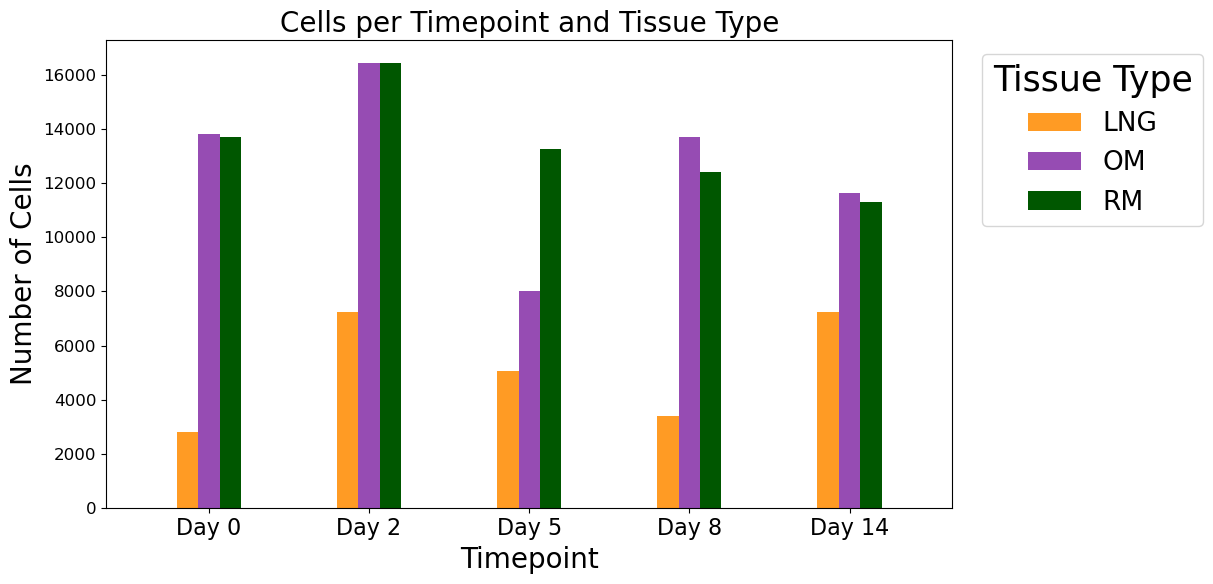


Tissue type color assignments:
LNG: #ff9b24
OM: #964cb3
RM: #005700


In [7]:
# Extract time point information from biosample_id
print("\nExtracting time point information...")
adata.obs['timepoint'] = adata.obs['biosample_id'].str.extract(r'(D\d+|Naive)')
adata.obs['timepoint'] = adata.obs['timepoint'].replace({
    'Naive': 'Day 0',
    'D02': 'Day 2', 
    'D05': 'Day 5',
    'D08': 'Day 8',
    'D14': 'Day 14'
})

# Order timepoints correctly
timepoint_order = ['Day 0', 'Day 2', 'Day 5', 'Day 8', 'Day 14']
adata.obs['timepoint'] = pd.Categorical(adata.obs['timepoint'], 
                                       categories=timepoint_order, 
                                       ordered=False)

# Visualize experimental design
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))  # Single plot with appropriate size

# Plot: Samples per timepoint - IMPROVED VERSION WITH CUSTOM COLORS
sample_counts = adata.obs.groupby(['timepoint', 'organ_custom']).size().unstack(fill_value=0)

# Define custom color palette
custom_colors = ['#ff9b24', '#964cb3', '#005700'] #

# Ensure we have colors for all tissue types
n_tissues = len(sample_counts.columns)
if n_tissues > len(custom_colors):
    # If more tissues than colors, repeat the color pattern
    colors = (custom_colors * ((n_tissues // len(custom_colors)) + 1))[:n_tissues]
else:
    colors = custom_colors[:n_tissues]

# Plot with MORE spacing between groups and custom colors
n_groups = len(sample_counts.index)
bar_width = 0.6 / len(sample_counts.columns)  # Reduced from 0.7 to 0.6 for more space
group_spacing = 1.5  # Increased spacing between groups
index = np.arange(n_groups) * group_spacing  # Apply spacing multiplier

for i, col in enumerate(sample_counts.columns):
    ax1.bar(index + i * bar_width, sample_counts[col], 
            width=bar_width, 
            color=colors[i],
            label=col)

# Configure x-axis with better spacing and larger labels
ax1.set_xticks(index + bar_width * (len(sample_counts.columns) / 2 - 0.5))
ax1.set_xticklabels(sample_counts.index, fontsize=16, rotation=0)  # No rotation needed now
ax1.set_title('Cells per Timepoint and Tissue Type', fontsize=20)
ax1.set_xlabel('Timepoint', fontsize=20)
ax1.set_ylabel('Number of Cells', fontsize=20)
ax1.legend(title='Tissue Type', title_fontsize=25, fontsize=19, bbox_to_anchor=(1.02, 1), loc='upper left')

# Increase margins for better spacing
ax1.margins(x=0.1)  # Increased from 0.05 to 0.1

# Remove grid for cleaner look
ax1.grid(False)

# Set white background
ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Leave space for legend on the right
plt.show()

# Print tissue types and their assigned colors for reference
print("\nTissue type color assignments:")
for i, tissue in enumerate(sample_counts.columns):
    print(f"{tissue}: {colors[i]}")


Extracting time point information...


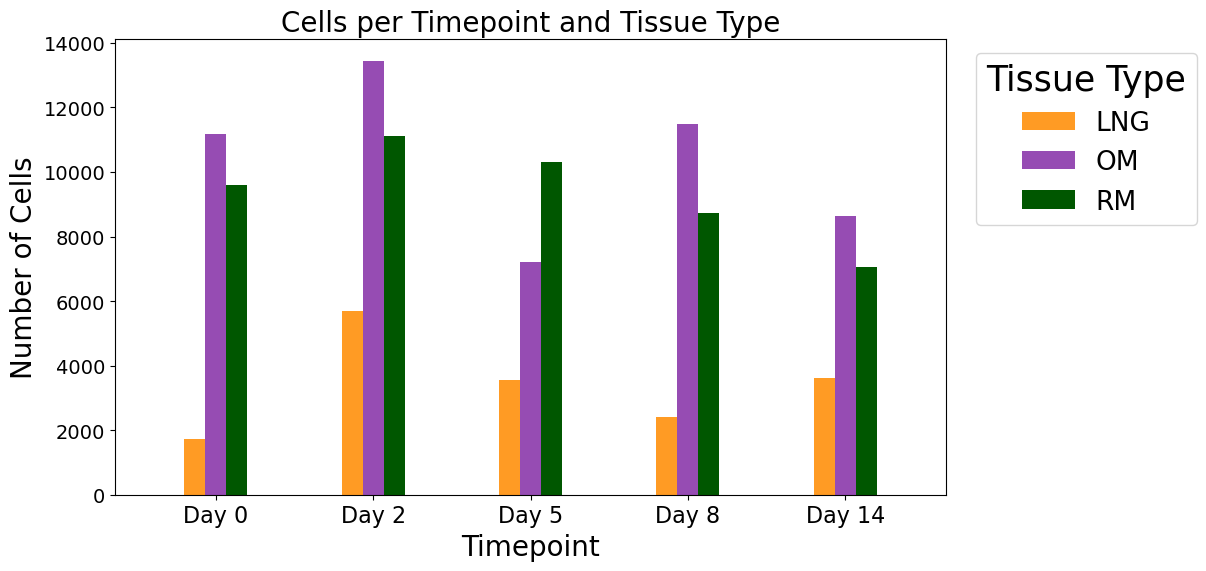


Tissue type color assignments:
LNG: #ff9b24
OM: #964cb3
RM: #005700


In [163]:
# Extract time point information from biosample_id
print("\nExtracting time point information...")
adata.obs['timepoint'] = adata.obs['biosample_id'].str.extract(r'(D\d+|Naive)')
adata.obs['timepoint'] = adata.obs['timepoint'].replace({
    'Naive': 'Day 0',
    'D02': 'Day 2', 
    'D05': 'Day 5',
    'D08': 'Day 8',
    'D14': 'Day 14'
})

# Order timepoints correctly
timepoint_order = ['Day 0', 'Day 2', 'Day 5', 'Day 8', 'Day 14']
adata.obs['timepoint'] = pd.Categorical(adata.obs['timepoint'], 
                                       categories=timepoint_order, 
                                       ordered=False)

# Visualize experimental design
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))  # Single plot with appropriate size

# Plot: Samples per timepoint - IMPROVED VERSION WITH CUSTOM COLORS
sample_counts = adata.obs.groupby(['timepoint', 'organ_custom']).size().unstack(fill_value=0)

# Define custom color palette
custom_colors = ['#ff9b24', '#964cb3', '#005700'] #

# Ensure we have colors for all tissue types
n_tissues = len(sample_counts.columns)
if n_tissues > len(custom_colors):
    # If more tissues than colors, repeat the color pattern
    colors = (custom_colors * ((n_tissues // len(custom_colors)) + 1))[:n_tissues]
else:
    colors = custom_colors[:n_tissues]

# Plot with MORE spacing between groups and custom colors
n_groups = len(sample_counts.index)
bar_width = 0.6 / len(sample_counts.columns)  # Reduced from 0.7 to 0.6 for more space
group_spacing = 1.5  # Increased spacing between groups
index = np.arange(n_groups) * group_spacing  # Apply spacing multiplier

for i, col in enumerate(sample_counts.columns):
    ax1.bar(index + i * bar_width, sample_counts[col], 
            width=bar_width, 
            color=colors[i],
            label=col)

# Configure x-axis with better spacing and larger labels
ax1.set_xticks(index + bar_width * (len(sample_counts.columns) / 2 - 0.5))
ax1.set_xticklabels(sample_counts.index, fontsize=16, rotation=0)  # No rotation needed now
ax1.set_title('Cells per Timepoint and Tissue Type', fontsize=20)
ax1.set_xlabel('Timepoint', fontsize=20)
ax1.set_ylabel('Number of Cells', fontsize=20)
ax1.legend(title='Tissue Type', title_fontsize=25, fontsize=19, bbox_to_anchor=(1.02, 1), loc='upper left')

# Increase margins for better spacing
ax1.margins(x=0.1)  # Increased from 0.05 to 0.1

# Remove grid for cleaner look
ax1.grid(False)

# Set white background
ax1.set_facecolor('white')
fig.patch.set_facecolor('white')

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Leave space for legend on the right
plt.show()

# Print tissue types and their assigned colors for reference
print("\nTissue type color assignments:")
for i, tissue in enumerate(sample_counts.columns):
    print(f"{tissue}: {colors[i]}")


SECTION 3: Quality Control - Identifying Low-Quality Cells

QC metrics calculated:
  - Total counts per cell
  - Number of genes detected per cell
  - Percentage of mitochondrial reads
  - Percentage of ribosomal reads
  - Percentage of hemoglobin reads


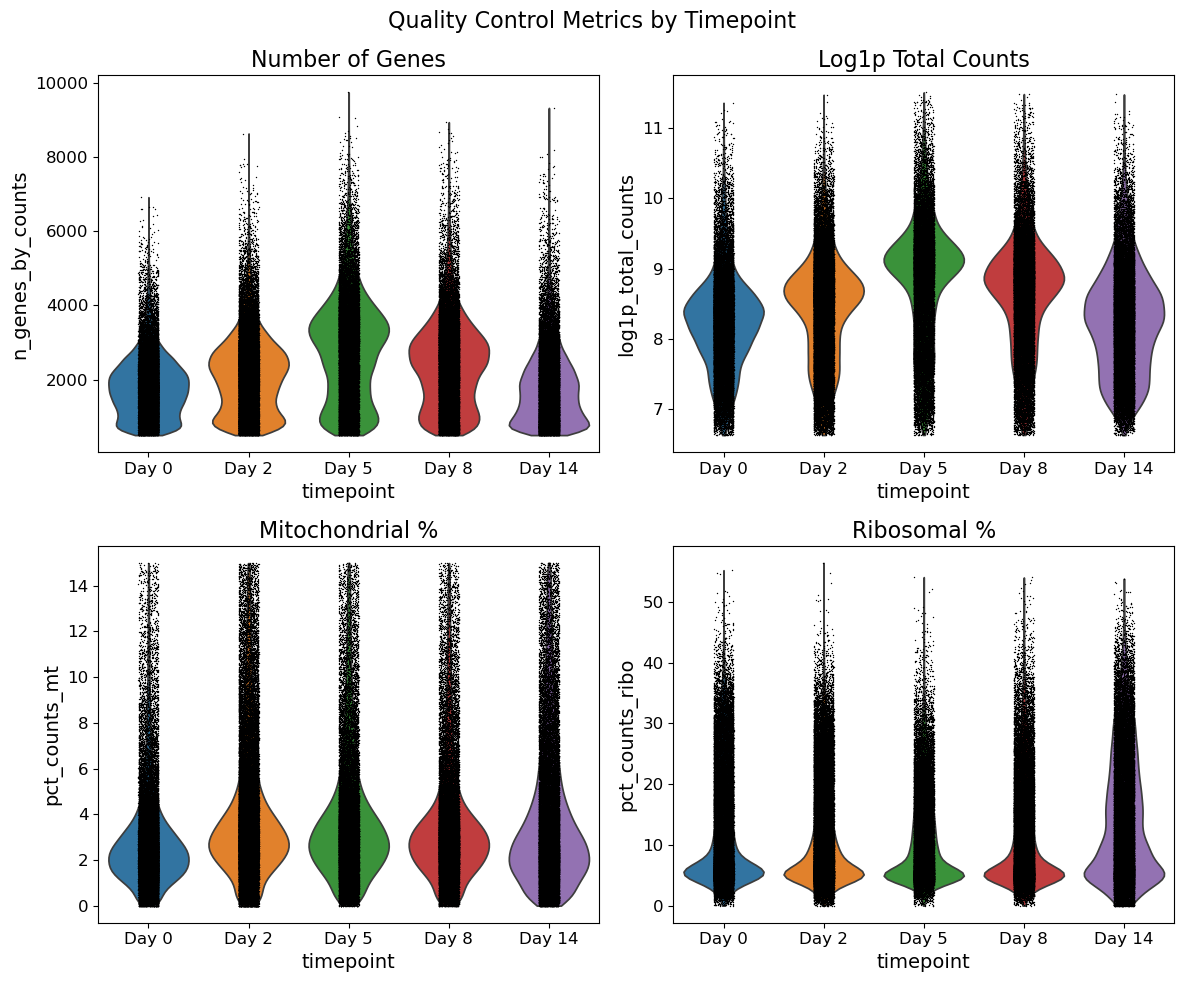

In [9]:

# ============================================================================
# SECTION 3: QUALITY CONTROL METRICS
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 3: Quality Control - Identifying Low-Quality Cells")
print("=" * 80)



# Identify mitochondrial, ribosomal, and hemoglobin genes
adata.var["mt"] = adata.var_names.str.startswith("mt-")  # mitochondrial genes
adata.var["ribo"] = adata.var_names.str.startswith(("Rps", "Rpl"))  # ribosomal genes
adata.var["hb"] = adata.var_names.str.contains("^Hb[^(p)]")  # hemoglobin genes

# Calculate QC metrics for each cell
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt", "ribo", "hb"], 
                          inplace=True, log1p=True)

print("\nQC metrics calculated:")
print("  - Total counts per cell")
print("  - Number of genes detected per cell")
print("  - Percentage of mitochondrial reads")
print("  - Percentage of ribosomal reads")
print("  - Percentage of hemoglobin reads")


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot QC metrics by timepoint individually
qc_metrics = ['n_genes_by_counts', 'log1p_total_counts', 'pct_counts_mt', 'pct_counts_ribo']
qc_titles = ['Number of Genes', 'Log1p Total Counts', 'Mitochondrial %', 'Ribosomal %']

for i, (metric, title) in enumerate(zip(qc_metrics, qc_titles)):
    ax = axes[i // 2, i % 2]
    sc.pl.violin(adata, metric, groupby='timepoint', ax=ax, show=False)
    ax.set_title(title)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

plt.suptitle('Quality Control Metrics by Timepoint', fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
adata

AnnData object with n_obs × n_vars = 156572 × 25147
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'organ_custom', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cell_type', 'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads', 'number_of_features', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'timepoint_colors'

In [11]:
adata.obs.columns

Index(['biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex',
       'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label',
       'organ_custom', 'library_preparation_protocol',
       'library_preparation_protocol__ontology_label', 'cell_type',
       'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads',
       'number_of_features', 'timepoint', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes',
       'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'],
      dtype='object')

In [12]:
adata.obs['number_of_reads']

NAME
D14_OE.AAACCCAGTATTCCTT        1762
D14_OE.AAACGAACAAAGCTCT        2175
D14_OE.AAACGAAGTGTTAAAG         893
D14_OE.AAACGCTAGAATACAC        1459
D14_OE.AAACGCTAGCATCCTA        1210
                              ...  
Naive_RE.CTCATGCAGGCTTAGG     14808
Naive_RE.GTATTGGGTGCCGGTT     11051
Naive_RE.TGGGTTATCGCAATGT      8405
Naive_LNG.AGCATCAGTGCCCAGT    27226
Naive_LNG.TAACGACAGACGTCCC    12193
Name: number_of_reads, Length: 156572, dtype: int64

In [13]:

# ============================================================================
# SECTION 4: FILTERING LOW-QUALITY CELLS
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 4: Filtering Low-Quality Cells")
print("=" * 80)

# Define quality thresholds based on the data
print("\nDefining quality thresholds:")
print("  - Mitochondrial content < 10%")
print("  - Ribosomal content < 20%")
print("  - Minimum 500 genes per cell")

# Identify low-quality cells
n_cells_before = adata.n_obs
low_quality_cells = (
    (adata.obs.pct_counts_mt >= 10.0) |  # High mitochondrial content
    (adata.obs.pct_counts_ribo >= 20.0)   # High ribosomal content
)

print(f"\nCells identified as low quality: {low_quality_cells.sum():,}")
print(f"Percentage of cells to remove: {low_quality_cells.sum() / n_cells_before * 100:.1f}%")

# Remove low-quality cells
adata = adata[~low_quality_cells]
print(f"\nCells remaining after filtering: {adata.n_obs:,}")

# Additional filtering
sc.pp.filter_cells(adata, min_genes=500)  # Remove cells with < 500 genes
sc.pp.filter_genes(adata, min_cells=3)    # Remove genes expressed in < 3 cells

print(f"Final dataset size: {adata.n_obs:,} cells × {adata.n_vars:,} genes")



SECTION 4: Filtering Low-Quality Cells

Defining quality thresholds:
  - Mitochondrial content < 10%
  - Ribosomal content < 20%
  - Minimum 500 genes per cell

Cells identified as low quality: 40,811
Percentage of cells to remove: 26.1%

Cells remaining after filtering: 115,761


c:\ProgramData\anaconda3\Lib\site-packages\scanpy\preprocessing\_simple.py:176: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["n_genes"] = number


Final dataset size: 115,761 cells × 25,003 genes



SECTION 5: Detecting and Removing Doublets

Running Scrublet doublet detection...


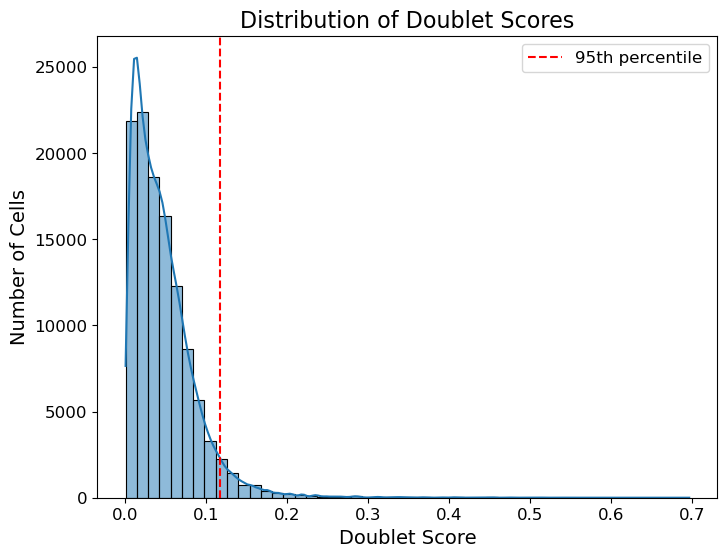

Predicted doublets: 28
Doublet rate: 0.02%


In [14]:
# ============================================================================
# SECTION 5: DOUBLET DETECTION
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 5: Detecting and Removing Doublets")
print("=" * 80)

# Run Scrublet for doublet detection
print("\nRunning Scrublet doublet detection...")
sc.pp.scrublet(adata, batch_key="biosample_id")

# Visualize doublet scores
plt.figure(figsize=(8, 6))
sns.histplot(adata.obs['doublet_score'], kde=True, bins=50)
plt.xlabel("Doublet Score")
plt.ylabel("Number of Cells")
plt.title("Distribution of Doublet Scores")
plt.axvline(x=adata.obs['doublet_score'].quantile(0.95), 
           color='red', linestyle='--', label='95th percentile')
plt.legend()
plt.show()

print(f"Predicted doublets: {adata.obs['predicted_doublet'].sum():,}")
print(f"Doublet rate: {adata.obs['predicted_doublet'].mean():.2%}")


In [15]:
doublets_adata = adata[adata.obs['predicted_doublet']].copy()
print(f"Saving {doublets_adata.n_obs:,} doublets to separate object")
doublets_adata.obs

Saving 28 doublets to separate object


biosample_id     donor_id          species  \
NAME                                                                    
D02_LNG.TGGTAGTAGAGTTCGG        D02_LNG    D02_Group  NCBITaxon_10090   
D14_OE.CTCATTATCGGCTTGG          D14_OM    D14_Group  NCBITaxon_10090   
D02_OE.ACATTTCAGGTTACAA          D02_OM    D02_Group  NCBITaxon_10090   
D02_OE.TCCGAAAGTATCCTTT          D02_OM    D02_Group  NCBITaxon_10090   
D02_RE.TGCTCGTCAGGTTCGC          D02_RM    D02_Group  NCBITaxon_10090   
D02_LNG.AAGGAATGTGTTATCG        D02_LNG    D02_Group  NCBITaxon_10090   
D02_LNG.AGCCAATTCCCAAGCG        D02_LNG    D02_Group  NCBITaxon_10090   
D02_LNG.GACTCTCTCATTGCCC        D02_LNG    D02_Group  NCBITaxon_10090   
D02_LNG.GTGAGGAGTACCCGAC        D02_LNG    D02_Group  NCBITaxon_10090   
D05_OE.CAATACGTCGCCTCTA          D05_OM    D05_Group  NCBITaxon_10090   
D05_OE.GATCATGGTAGAAACT          D05_OM    D05_Group  NCBITaxon_10090   
D05_OE.TTTCGATCAGAAGCGT          D05_OM    D05_Group  NCBITaxon_10090   
D05_LNG.ACCACAATCTGGCCGA        D05_LNG    D05_Group  NCBITaxon_10090   
D05_LNG.GAGTTGTGTGGATCAG        D05_LNG    D05_Group  NCBITaxon_10090   
D08_LNG.AGAACCTTCTTGCGCT        D08_LNG    D08_Group  NCBITaxon_10090   
D08_LNG.GTATTGGAGACCCTTA        D08_LNG    D08_Group  NCBITaxon_10090   
D08_LNG.TCATACTTCGTTCGCT        D08_LNG    D08_Group  NCBITaxon_10090   
Naive_LNG.CTTACCGCATCTTTCA    Naive_LNG  Naive_Group  NCBITaxon_10090   
Naive_LNG.GTCCCATGTAGAGACC    Naive_LNG  Naive_Group  NCBITaxon_10090   
D02_LNG.AGGCCACAGTGGACTG        D02_LNG    D02_Group  NCBITaxon_10090   
D02_LNG.GGGTAGAAGTGCACCC        D02_LNG    D02_Group  NCBITaxon_10090   
D05_LNG.TCAGTTTCACGCGGTT        D05_LNG    D05_Group  NCBITaxon_10090   
Naive_LNG.AATGGCTCAGCTTTGA    Naive_LNG  Naive_Group  NCBITaxon_10090   
D02_OE.CCCAACTTCCACTTTA          D02_OM    D02_Group  NCBITaxon_10090   
D02_OE.GGGTGAAGTCGTTTCC          D02_OM    D02_Group  NCBITaxon_10090   
D08_RE.TTCACCGAGAGTCCGA          D08_RM    D08_Group  NCBITaxon_10090   
Naive_RE.TTCTAACTCGCAGAGA      Naive_RM  Naive_Group  NCBITaxon_10090   
Naive_RE.CTGATCCAGAATCGAT      Naive_RM  Naive_Group  NCBITaxon_10090   

                           species__ontology_label     sex        disease  \
NAME                                                                        
D02_LNG.TGGTAGTAGAGTTCGG              Mus musculus  female  MONDO_0005812   
D14_OE.CTCATTATCGGCTTGG               Mus musculus  female  MONDO_0005812   
D02_OE.ACATTTCAGGTTACAA               Mus musculus  female  MONDO_0005812   
D02_OE.TCCGAAAGTATCCTTT               Mus musculus  female  MONDO_0005812   
D02_RE.TGCTCGTCAGGTTCGC               Mus musculus  female  MONDO_0005812   
D02_LNG.AAGGAATGTGTTATCG              Mus musculus  female  MONDO_0005812   
D02_LNG.AGCCAATTCCCAAGCG              Mus musculus  female  MONDO_0005812   
D02_LNG.GACTCTCTCATTGCCC              Mus musculus  female  MONDO_0005812   
D02_LNG.GTGAGGAGTACCCGAC              Mus musculus  female  MONDO_0005812   
D05_OE.CAATACGTCGCCTCTA               Mus musculus  female  MONDO_0005812   
D05_OE.GATCATGGTAGAAACT               Mus musculus  female  MONDO_0005812   
D05_OE.TTTCGATCAGAAGCGT               Mus musculus  female  MONDO_0005812   
D05_LNG.ACCACAATCTGGCCGA              Mus musculus  female  MONDO_0005812   
D05_LNG.GAGTTGTGTGGATCAG              Mus musculus  female  MONDO_0005812   
D08_LNG.AGAACCTTCTTGCGCT              Mus musculus  female  MONDO_0005812   
D08_LNG.GTATTGGAGACCCTTA              Mus musculus  female  MONDO_0005812   
D08_LNG.TCATACTTCGTTCGCT              Mus musculus  female  MONDO_0005812   
Naive_LNG.CTTACCGCATCTTTCA            Mus musculus  female   PATO_0000461   
Naive_LNG.GTCCCATGTAGAGACC            Mus musculus  female   PATO_0000461   
D02_LNG.AGGCCACAGTGGACTG              Mus musculus  female  MONDO_0005812   
D02_LNG.GGGTAGAAGTGCACCC              Mus musculus  female  MONDO_0005812   
D05_LNG.TCAGTTTCACGCGGTT              Mus musculus  female  MONDO

In [16]:
adata = adata[~adata.obs['predicted_doublet']].copy()

In [17]:
adata

AnnData object with n_obs × n_vars = 115733 × 25003
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'organ_custom', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cell_type', 'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads', 'number_of_features', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_to

In [18]:
adata.X

<115733x25003 sparse matrix of type '<class 'numpy.float32'>'
	with 269408026 stored elements in Compressed Sparse Column format>

In [19]:
adata.layers["counts"] = adata.X.copy()

In [20]:
# Check what was saved in counts layer
print("\n=== RAW COUNTS VERIFICATION ===")
print(f"Counts layer shape: {adata.layers['counts'].shape}")
print(f"Counts layer dtype: {adata.layers['counts'].dtype}")
print(f"Counts layer type: {type(adata.layers['counts'])}")

# Basic statistics
counts_data = adata.layers['counts']
print(f"Min count: {counts_data.min()}")
print(f"Max count: {counts_data.max()}")
print(f"Mean count: {counts_data.mean():.2f}")
print(f"Non-zero values: {(counts_data > 0).sum():,}")
print(f"Total values: {counts_data.size:,}")



=== RAW COUNTS VERIFICATION ===
Counts layer shape: (115733, 25003)
Counts layer dtype: float32
Counts layer type: <class 'scipy.sparse._csc.csc_matrix'>
Min count: 0.0
Max count: 52014.0
Mean count: 0.27
Non-zero values: 269,408,026
Total values: 269,408,026


In [21]:
# Look at actual count values for first few cells/genes
print(f"\n=== SAMPLE COUNT VALUES ===")
if hasattr(counts_data, 'toarray'):  # If sparse matrix
    sample_counts = counts_data[:10, :100].toarray()
else:
    sample_counts = counts_data[:10, :100]

print("First 5 cells, 10 genes:")
print(sample_counts)
print(f"Are these integers? {np.all(sample_counts == sample_counts.astype(int))}")


=== SAMPLE COUNT VALUES ===
First 5 cells, 10 genes:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 0.

In [22]:
adata.layers["counts"] = counts_data

In [23]:
# ============================================================================
# SECTION 6: NORMALIZATION AND TRANSFORMATION
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 6: Data Normalization and Transformation")
print("=" * 80)

# Save raw counts for later use
print("\nSaving raw count data...")
adata.layers["counts"] = adata.X.copy()

# Normalize data
print("Normalizing to 10,000 reads per cell...")
sc.pp.normalize_total(adata, target_sum=10000) 

# Log transformation
print("Applying log1p transformation...")
sc.pp.log1p(adata)


SECTION 6: Data Normalization and Transformation

Saving raw count data...
Normalizing to 10,000 reads per cell...
Applying log1p transformation...


In [24]:
# Look at actual count values for first few cells/genes
print(f"\n=== SAMPLE COUNT VALUES ===")
if hasattr(adata.layers["counts"], 'toarray'):  # If sparse matrix
    sample_counts = adata.layers["counts"][:10, :100].toarray()
else:
    sample_counts = adata.layers["counts"][:10, :100]

print("First 5 cells, 10 genes:")
print(sample_counts)
print(f"Are these integers? {np.all(sample_counts == sample_counts.astype(int))}")


=== SAMPLE COUNT VALUES ===
First 5 cells, 10 genes:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 0.


SECTION 7: Identifying Highly Variable Genes

Identifying top 2,500 highly variable genes...

Identifying receptor genes:
  - Olfactory receptors (Olfr): 1040
  - Trace amine-associated receptors (TAAR): 13
  - Vomeronasal receptors type 1 (V1R): 110
  - Vomeronasal receptors type 2 (V2R): 53


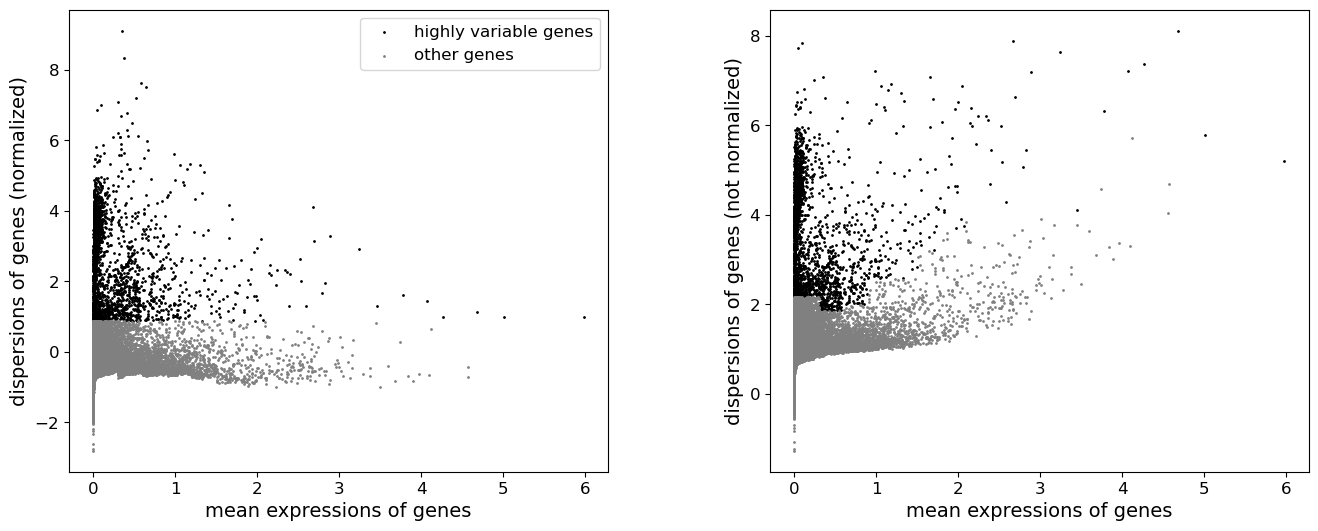

In [25]:
# ============================================================================
# SECTION 7: HIGHLY VARIABLE GENE SELECTION
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 7: Identifying Highly Variable Genes")
print("=" * 80)

# Identify highly variable genes
print("\nIdentifying top 2,500 highly variable genes...")
sc.pp.highly_variable_genes(adata, n_top_genes=2500)

# Identify olfactory and vomeronasal receptor genes
print("\nIdentifying receptor genes:")
adata.var['is_olfactory_receptor'] = adata.var_names.str.contains("Olfr")
adata.var['is_taar'] = adata.var_names.str.contains("Taar")
adata.var['is_vomeronasal_1'] = adata.var_names.str.contains("Vmn1r")
adata.var['is_vomeronasal_2'] = adata.var_names.str.contains("Vmn2r")

n_or = adata.var['is_olfactory_receptor'].sum()
n_taar = adata.var['is_taar'].sum()
n_v1r = adata.var['is_vomeronasal_1'].sum()
n_v2r = adata.var['is_vomeronasal_2'].sum()

print(f"  - Olfactory receptors (Olfr): {n_or}")
print(f"  - Trace amine-associated receptors (TAAR): {n_taar}")
print(f"  - Vomeronasal receptors type 1 (V1R): {n_v1r}")
print(f"  - Vomeronasal receptors type 2 (V2R): {n_v2r}")

# Visualize highly variable genes
sc.pl.highly_variable_genes(adata)
plt.show()


In [26]:
# Look at actual count values for first few cells/genes
print(f"\n=== SAMPLE COUNT VALUES ===")
if hasattr(adata.layers["counts"], 'toarray'):  # If sparse matrix
    sample_counts = adata.layers["counts"][:10, :100].toarray()
else:
    sample_counts = adata.layers["counts"][:10, :100]

print("First 5 cells, 10 genes:")
print(sample_counts)
print(f"Are these integers? {np.all(sample_counts == sample_counts.astype(int))}")


=== SAMPLE COUNT VALUES ===
First 5 cells, 10 genes:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 0.

In [27]:
hvg_genes =adata.var_names[adata.var['highly_variable']]
print(hvg_genes)
print(f"Top 2500 highly variable genes: {len(hvg_genes)}")

Index(['Sox17', 'Pi15', 'Crispld1', 'Tfap2d', 'Il17a', 'Il17f', 'Gsta3',
       'Col9a1', 'Ptpn18', 'Neurl3',
       ...
       'PR8-PB2', 'PR8-PB1', 'PR8-PA', 'PR8-HA', 'PR8-NP', 'PR8-NA', 'PR8-M2',
       'PR8-M1', 'PR8-NS2', 'PR8-NS1'],
      dtype='object', length=2500)
Top 2500 highly variable genes: 2500



SECTION 8: Dimensionality Reduction and Cell Clustering

Performing Principal Component Analysis (PCA)...

Building nearest neighbor graph...
Computing UMAP embedding...
Performing Leiden clustering...


C:\Users\User\AppData\Local\Temp\ipykernel_20148\244920250.py:27: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.1)


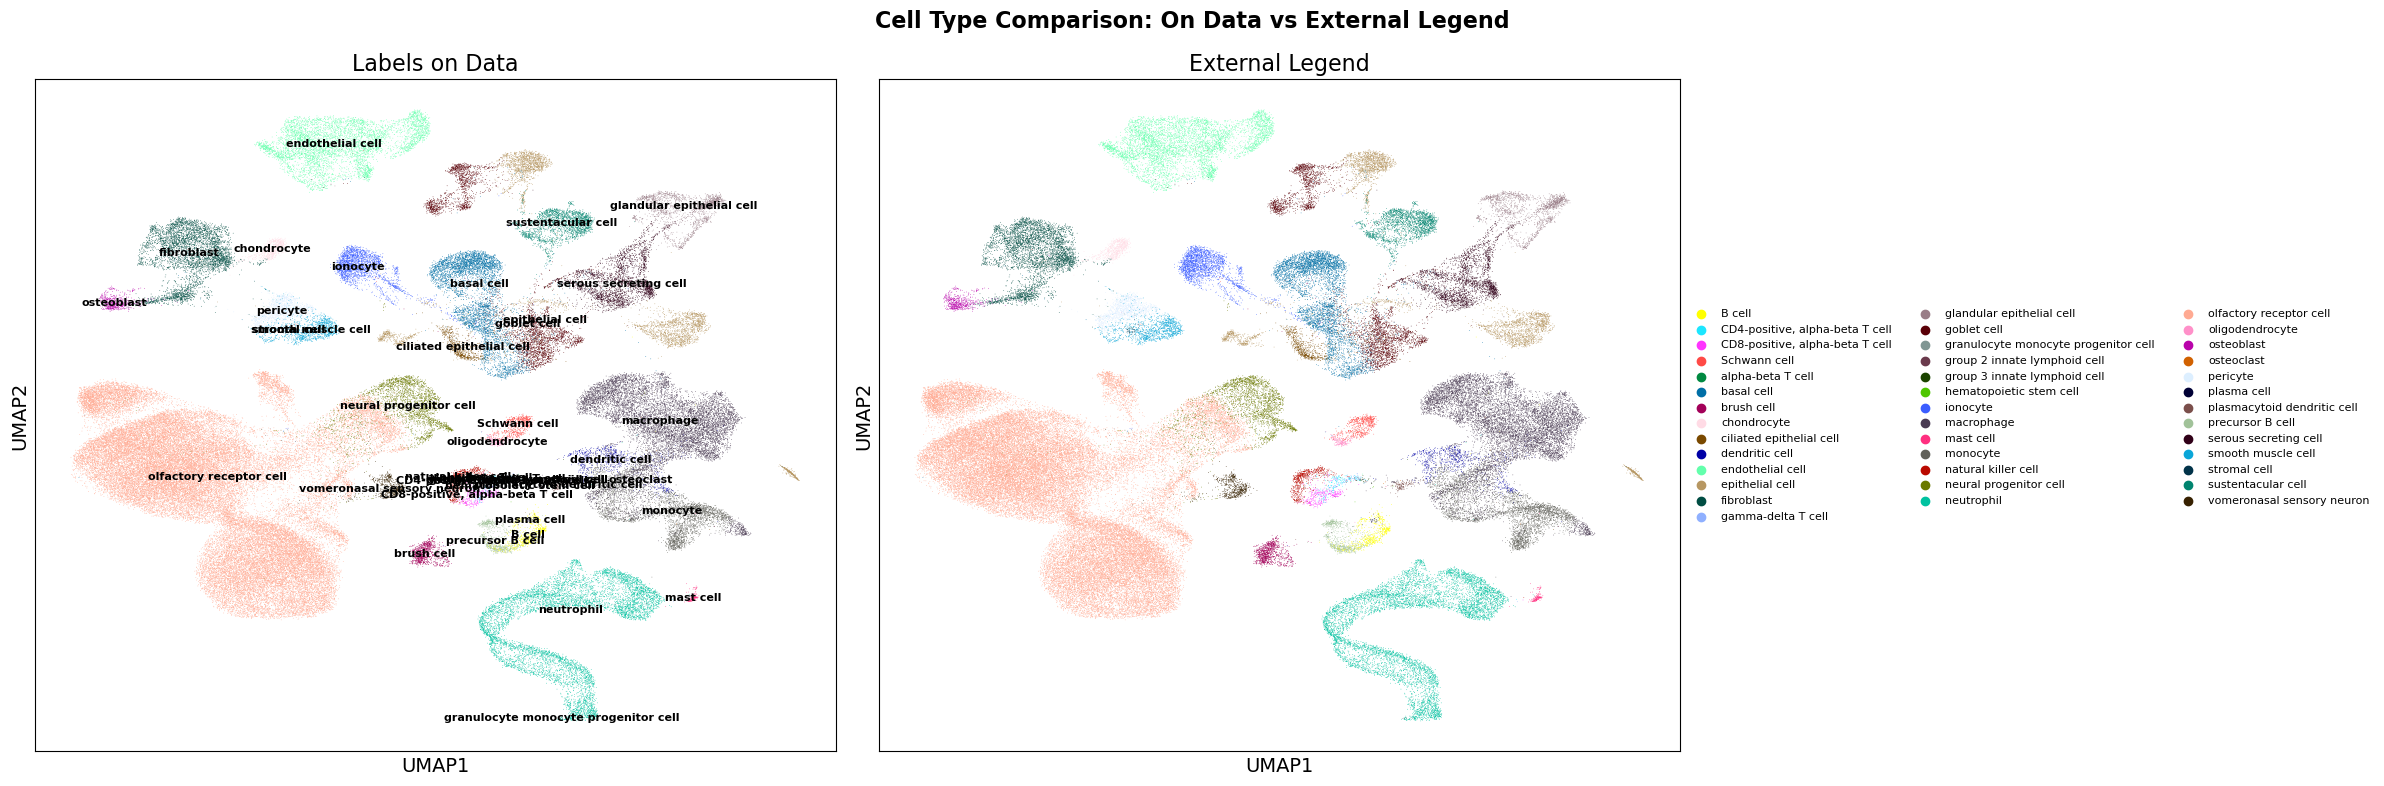

In [ ]:
# ============================================================================
# SECTION 8: DIMENSIONALITY REDUCTION AND CLUSTERING WITH LABELS ON DATA
# ============================================================================
print("\n" + "=" * 80)
print("SECTION 8: Dimensionality Reduction and Cell Clustering")
print("=" * 80)

# Perform PCA
print("\nPerforming Principal Component Analysis (PCA)...")
sc.tl.pca(adata, n_comps=50)

# Plot variance explained
# sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
# plt.title("PCA Variance Explained")
plt.show()

# Build nearest neighbor graph
print("\nBuilding nearest neighbor graph...")
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=30)

# Perform UMAP embedding
print("Computing UMAP embedding...")
sc.tl.umap(adata)

# Perform Leiden clustering
print("Performing Leiden clustering...")
sc.tl.leiden(adata, resolution=0.1)


# Cell type comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
sc.pl.umap(adata, color='cell_type__ontology_label', ax=ax1, show=False, 
           title='Labels on Data', legend_loc='on data', legend_fontsize=8)
sc.pl.umap(adata, color='cell_type__ontology_label', ax=ax2, show=False, 
           title='External Legend', legend_loc='right margin', legend_fontsize=8)
plt.suptitle('Cell Type Comparison: On Data vs External Legend', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



ENHANCED LARGE GAP43 AND OMP VISUALIZATION
🔬 Starting Large-Scale Gap43 and Omp Analysis...

DETAILED GAP43 AND OMP STATISTICS

GAP43 EXPRESSION ANALYSIS:
--------------------------------------------------
Overall statistics:
  Mean: 0.178
  Median: 0.000
  Std: 0.635
  Max: 4.584
  % expressing cells: 9.6%

Per-cluster statistics:
          Mean  Median    Std  N_cells  N_expressing  Pct_expressing
cluster                                                             
5        1.878   2.055  1.399     7113          5355            75.3
15       0.156   0.000  0.530     1198           106             8.8
0        0.144   0.000  0.467    28118          3033            10.8
1        0.126   0.000  0.408    16127          1669            10.3
12       0.086   0.000  0.299     2106           210            10.0
17       0.079   0.000  0.326      808            56             6.9
7        0.055   0.000  0.272     5780           257             4.4
16       0.032   0.000  0.221      978       

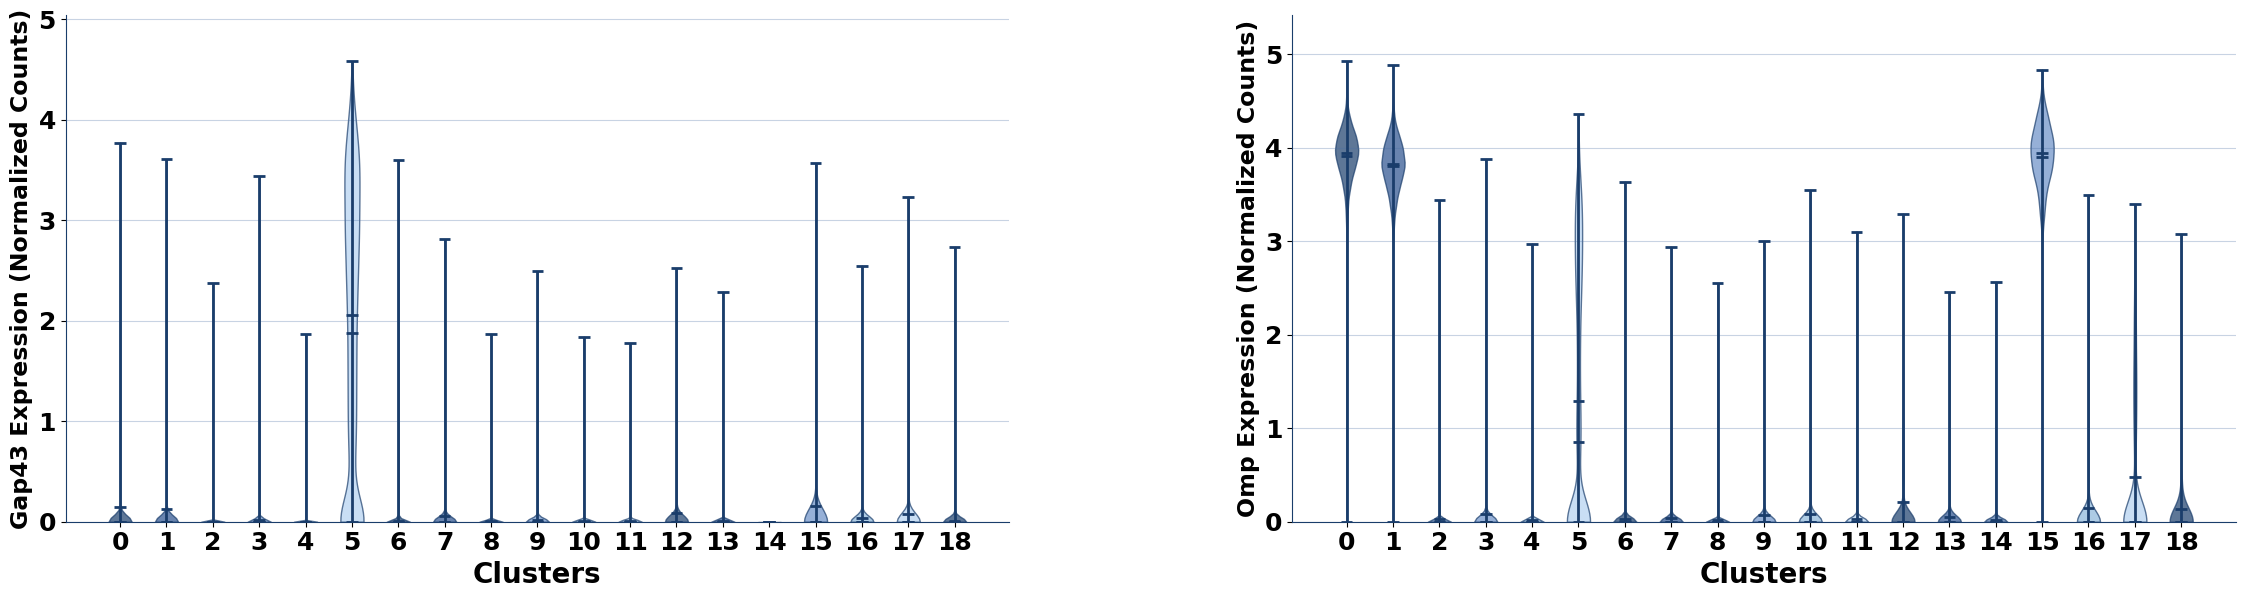


✅ Large-scale Gap43 and Omp analysis complete!
   Plots are now displayed at maximum size for detailed examination
LARGE GAP43 AND OMP VISUALIZATION CODE READY!
Key features:
✅ Much larger figure sizes (up to 32x24)
✅ Multiple visualization types per gene
✅ Comparative analysis between markers
✅ Detailed statistics and correlations
✅ High-resolution output capability


In [170]:
#!/usr/bin/env python3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 20,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 24
})

print("=" * 80)
print("=" * 80)

def create_large_gap43_omp_plots(adata, figsize=(24, 16)):
  
    
    BLUE_MAIN = '#2a508d'
    BLUE_LIGHT = '#4a6fa5'
    BLUE_DARK = '#1a3d6b'
    BLUE_PALE = '#8bb5d9'
    BLUE_GRADIENT = ['#1a3d6b', '#2a508d', '#4a6fa5', '#6a8fc7', '#8bb5d9', '#b3d1f0']
    
    markers = {
        'Gap43': 'Growth Associated Protein 43 - Immature Olfactory Neurons',
        'Omp': 'Olfactory Marker Protein - Mature Olfactory Neurons'
    }
    
    fig = plt.figure(figsize=figsize)
    fig.patch.set_facecolor('white')
    
    gs = fig.add_gridspec(3, 2, hspace=0.4, wspace=0.3)
    
    plot_idx = 0
    
    for gene, description in markers.items():
        if gene in adata.var_names:
            
            ax1 = fig.add_subplot(gs[0, plot_idx])
            
            gene_expression = pd.DataFrame({
                'cluster': adata.obs['leiden'],
                'expression': adata[:, gene].X.toarray().flatten()
            })
            
            clusters = sorted(adata.obs['leiden'].unique(), key=lambda x: int(x) if x.isdigit() else float('inf'))
            
            violin_parts = ax1.violinplot([gene_expression[gene_expression['cluster'] == cluster]['expression'].values 
                                          for cluster in clusters],
                                         positions=range(len(clusters)), showmeans=True, showmedians=True)
            
            for i, pc in enumerate(violin_parts['bodies']):
                color_idx = i % len(BLUE_GRADIENT)
                pc.set_facecolor(BLUE_GRADIENT[color_idx])
                pc.set_alpha(0.7)
                pc.set_edgecolor(BLUE_DARK)
            
            for element in ['cmeans', 'cmedians', 'cbars', 'cmins', 'cmaxes']:
                if element in violin_parts:
                    violin_parts[element].set_color(BLUE_DARK)
                    violin_parts[element].set_linewidth(2)
            
            ax1.set_xlabel('Clusters', fontsize=20, fontweight='bold',)
            ax1.set_ylabel(f'{gene} Expression (Normalized Counts)', fontsize=17, fontweight='bold',)
            ax1.set_xticks(range(len(clusters)))
            ax1.set_xticklabels(clusters, fontsize=18, fontweight='bold')
            ax1.tick_params(axis='y', labelsize=18)
            for label in ax1.get_yticklabels():
             label.set_fontweight('bold')
            ax1.grid(True, alpha=0.3, axis='y', color=BLUE_LIGHT)
            max_expr = gene_expression['expression'].max()
            ax1.set_ylim(0, max_expr * 1.1)
            ax1.spines['top'].set_visible(False)
            ax1.spines['right'].set_visible(False)
            ax1.spines['left'].set_color(BLUE_DARK)
            ax1.spines['bottom'].set_color(BLUE_DARK)
            
            plot_idx += 1
        
        else:
            ax = fig.add_subplot(gs[:, plot_idx])
            ax.text(0.5, 0.5, f'{gene} not found\nin dataset', 
                   ha='center', va='center', fontsize=24, color=BLUE_DARK, fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.5", facecolor=BLUE_PALE, alpha=0.7, edgecolor=BLUE_DARK))
            ax.set_title(f'{gene} - Not Available', fontsize=20, fontweight='bold', color=BLUE_DARK)
            ax.axis('off')
            plot_idx += 1
    
    return fig

def create_comparative_analysis_plot(adata, figsize=(20, 12)):

    return fig

def print_detailed_statistics(adata):
    """
    Print detailed statistics for Gap43 and Omp
    """
    print("\n" + "=" * 80)
    print("DETAILED GAP43 AND OMP STATISTICS")
    print("=" * 80)
    
    for gene in ['Gap43', 'Omp']:
        if gene in adata.var_names:
            print(f"\n{gene.upper()} EXPRESSION ANALYSIS:")
            print("-" * 50)
            
            gene_expr = adata[:, gene].X.toarray().flatten()
            clusters = adata.obs['leiden']
            
            print(f"Overall statistics:")
            print(f"  Mean: {gene_expr.mean():.3f}")
            print(f"  Median: {np.median(gene_expr):.3f}")
            print(f"  Std: {gene_expr.std():.3f}")
            print(f"  Max: {gene_expr.max():.3f}")
            print(f"  % expressing cells: {(gene_expr > 0).sum() / len(gene_expr) * 100:.1f}%")
            
            print(f"\nPer-cluster statistics:")
            cluster_stats = pd.DataFrame({
                'cluster': clusters,
                'expression': gene_expr
            }).groupby('cluster')['expression'].agg([
                'mean', 'median', 'std', 'count', lambda x: (x > 0).sum()
            ]).round(3)
            
            cluster_stats.columns = ['Mean', 'Median', 'Std', 'N_cells', 'N_expressing']
            cluster_stats['Pct_expressing'] = (cluster_stats['N_expressing'] / cluster_stats['N_cells'] * 100).round(1)
            
            cluster_stats = cluster_stats.sort_values('Mean', ascending=False)
            
            print(cluster_stats.head(10))
        else:
            print(f"\n⚠️ {gene} not found in dataset")

def run_large_gap43_omp_analysis(adata):
    """
    Run the complete large-scale Gap43 and Omp analysis
    """
    print("🔬 Starting Large-Scale Gap43 and Omp Analysis...")
    
    print_detailed_statistics(adata)
    
    print("\n📊 Creating large visualization plots...")
    fig1 = create_large_gap43_omp_plots(adata, figsize=(28, 25))
    
    if fig1:
        plt.show()
    
    print("\n✅ Large-scale Gap43 and Omp analysis complete!")
    print("   Plots are now displayed at maximum size for detailed examination")

run_large_gap43_omp_analysis(adata)

print("=" * 80)
print("LARGE GAP43 AND OMP VISUALIZATION CODE READY!")
print("Key features:")
print("✅ Much larger figure sizes (up to 32x24)")
print("✅ Multiple visualization types per gene")
print("✅ Comparative analysis between markers")
print("✅ Detailed statistics and correlations")
print("✅ High-resolution output capability")
print("=" * 80)

In [31]:
# Look at actual count values for first few cells/genes
print(f"\n=== SAMPLE COUNT VALUES ===")
if hasattr(adata.layers["counts"], 'toarray'):  # If sparse matrix
    sample_counts = adata.layers["counts"][:10, :100].toarray()
else:
    sample_counts = adata.layers["counts"][:10, :100]

print("First 5 cells, 10 genes:")
print(sample_counts)
print(f"Are these integers? {np.all(sample_counts == sample_counts.astype(int))}")


=== SAMPLE COUNT VALUES ===
First 5 cells, 10 genes:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 6. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0.]
 [0. 0. 0. 0.

MEMORY-EFFICIENT ITERATIVE CLUSTERING: REFINING MATURE OLFACTORY NEURON IDENTIFICATION

Step 1: Subsetting to mature olfactory clusters: ['0', '1', '15']
Selected 45,443 cells from 3 clusters
New dataset dimensions: 45443 cells × 25003 genes

Step 2: Memory-efficient preprocessing...

Step 4: Identifying HVGs and subsetting to reduce memory...
Subsetted to HVGs: 45443 cells × 25003 genes

Step 5: Memory-efficient scaling...
✅ Scaling completed (without zero-centering)

Step 6: Computing PCA...
✅ PCA completed with 30 components

Step 7: Computing neighborhood graph and UMAP...
✅ Neighborhood graph and UMAP completed

Step 8: Performing clustering at multiple resolutions...


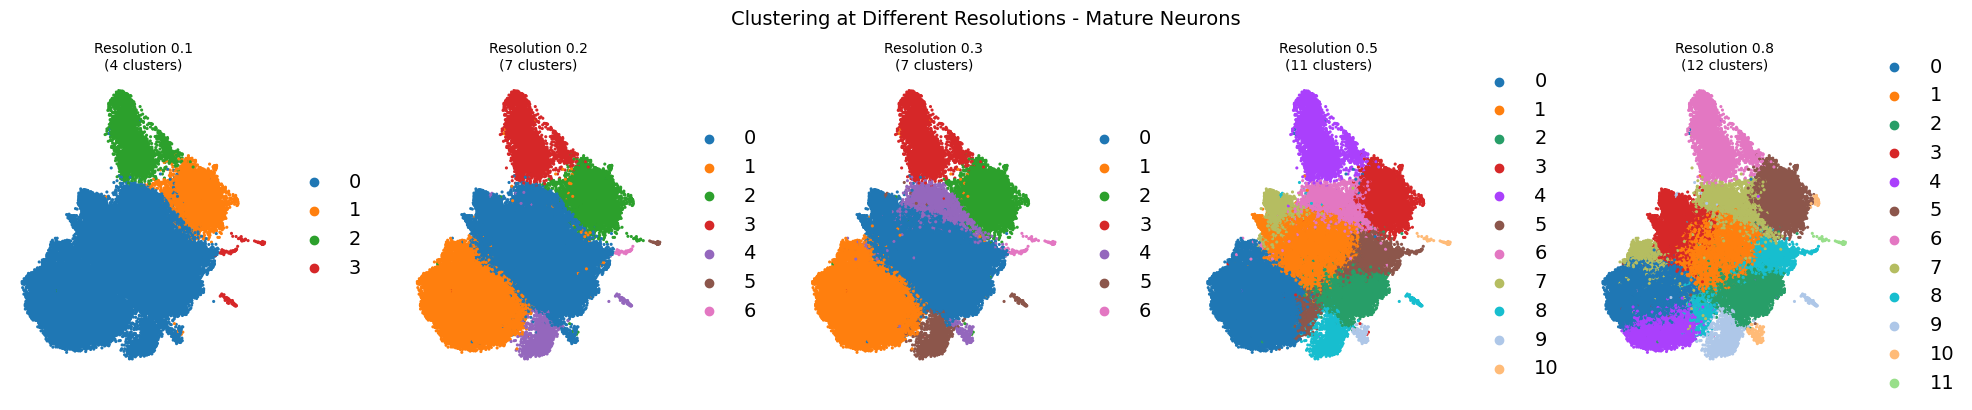


Step 9: Evaluating clustering quality...


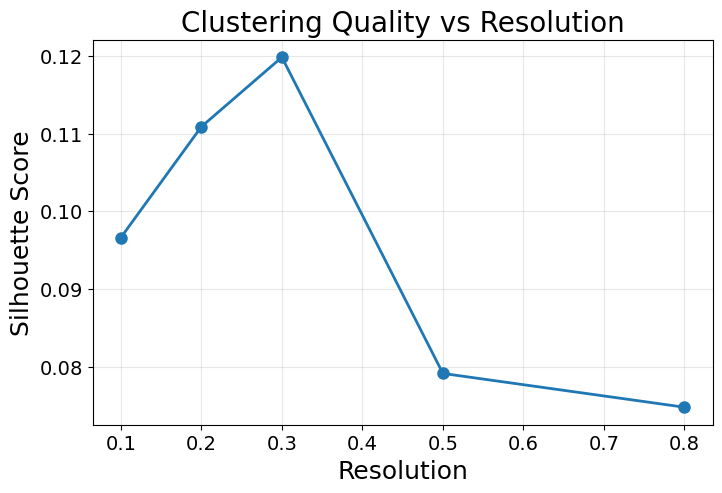

Best resolution based on silhouette score: 0.3 (score: 0.120)

Step 10: Analyzing marker expression in refined clusters...
Available markers: ['Omp', 'Gap43', 'Neurog1', 'Ascl1', 'Sox2']


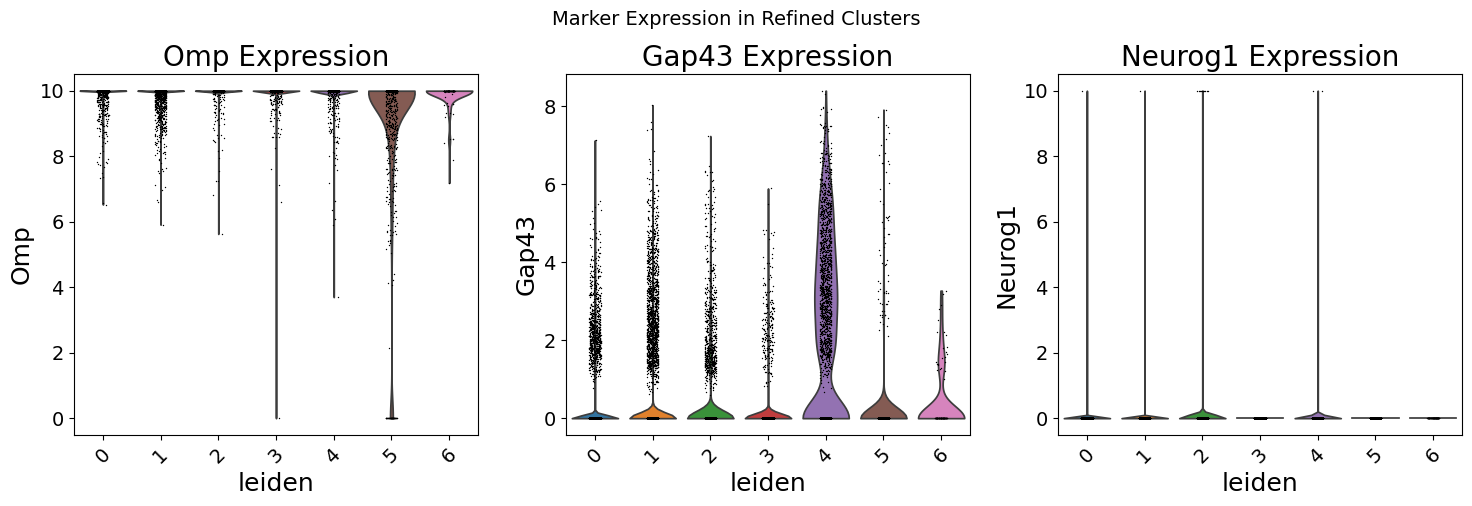


MEMORY-EFFICIENT ITERATIVE CLUSTERING RESULTS
📊 Final Results:
   • Started with 3 clusters from initial analysis
   • Refined to 7 clusters in mature neurons
   • Total cells: 45,443
   • Genes after filtering: 25,003
   • Optimal resolution: 0.3

🔍 Memory Optimizations Applied:
   • Filtered low-expressed genes
   • Reduced HVG count to 2000
   • Subsetted to HVGs before scaling
   • Used memory-efficient scaling
   • Reduced PCA components and neighbors

✅ Memory-efficient clustering complete!
Memory cleaned up. adata_mature ready for further analysis.


In [38]:


import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gc  # For garbage collection

print("=" * 80)
print("MEMORY-EFFICIENT ITERATIVE CLUSTERING: REFINING MATURE OLFACTORY NEURON IDENTIFICATION")
print("=" * 80)

# ============================================================================
# STEP 1: SUBSET TO MATURE OLFACTORY CLUSTERS
# ============================================================================


mature_clusters = ['0', '1', '15']  

print(f"\nStep 1: Subsetting to mature olfactory clusters: {mature_clusters}")

# Create boolean mask for mature olfactory neurons
mature_mask = adata.obs['leiden'].isin(mature_clusters)
n_mature_cells = mature_mask.sum()

print(f"Selected {n_mature_cells:,} cells from {len(mature_clusters)} clusters")

# Create new AnnData object with only mature cells
adata_mature = adata[mature_mask].copy()

print(f"New dataset dimensions: {adata_mature.n_obs} cells × {adata_mature.n_vars} genes")

# Clear memory
del mature_mask
gc.collect()

# ============================================================================
# STEP 2: MEMORY-EFFICIENT PREPROCESSING
# ============================================================================

print(f"\nStep 2: Memory-efficient preprocessing...")

# Remove previous clustering results to start fresh
columns_to_remove = ['leiden', 'louvain'] 
for col in columns_to_remove:
    if col in adata_mature.obs.columns:
        del adata_mature.obs[col]

# Clear previous dimensionality reduction results
adata_mature.obsm.clear()
adata_mature.varm.clear()
adata_mature.uns.clear()

# Store raw counts if not already done
if 'counts' not in adata_mature.layers:
    adata_mature.layers['counts'] = adata_mature.X.copy()

# Reset to raw counts
adata_mature.X = adata_mature.layers['counts'].copy()

# ============================================================================
# STEP 3: FILTER GENES TO REDUCE MEMORY USAGE
# ============================================================================

# print(f"\nStep 3: Filtering genes to reduce memory usage...")

# # Filter out genes expressed in very few cells (saves memory)
# sc.pp.filter_genes(adata_mature, min_cells=10)
# print(f"After filtering: {adata_mature.n_vars} genes remaining")

# Normalize and log-transform
sc.pp.normalize_total(adata_mature, target_sum=10000)
sc.pp.log1p(adata_mature)

# ============================================================================
# STEP 4: IDENTIFY HVGs AND SUBSET EARLY
# ============================================================================

print(f"\nStep 4: Identifying HVGs and subsetting to reduce memory...")

# Identify highly variable genes
sc.pp.highly_variable_genes(adata_mature, n_top_genes=2500)  # Reduced from 2500

# n_hvg = adata_mature.var['highly_variable'].sum()
# print(f"Identified {n_hvg} highly variable genes")

# # Save full data and filter to HVGs BEFORE scaling
# adata_mature.raw = adata_mature
# # adata_mature = adata_mature[:, adata_mature.var.highly_variable].copy()

print(f"Subsetted to HVGs: {adata_mature.n_obs} cells × {adata_mature.n_vars} genes")

# Clear memory
gc.collect()

# ============================================================================
# STEP 5: MEMORY-EFFICIENT SCALING
# ============================================================================

print(f"\nStep 5: Memory-efficient scaling...")

# Scale data with memory optimization
# Option 1: Use zero_center=False to avoid densification if data is sparse
try:
    sc.pp.scale(adata_mature, max_value=10, zero_center=False)
    print("✅ Scaling completed (without zero-centering)")
except MemoryError:
    # Option 2: If still fails, scale in chunks
    print("Attempting chunk-based scaling...")
    
    # Get the data matrix
    X = adata_mature.X
    
    # Calculate mean and std for each gene
    if hasattr(X, 'toarray'):
        # For sparse matrices, calculate stats efficiently
        means = np.array(X.mean(axis=0)).flatten()
        vars_arr = np.array(X.power(2).mean(axis=0)).flatten() - means**2
        stds = np.sqrt(vars_arr)
    else:
        means = np.mean(X, axis=0)
        stds = np.std(X, axis=0)
    
    # Avoid division by zero
    stds[stds == 0] = 1
    
    # Scale without zero-centering (memory efficient)
    X = X / stds
    
    # Apply max_value clipping
    if hasattr(X, 'data'):  # sparse matrix
        X.data = np.clip(X.data, -10, 10)
    else:  # dense matrix
        X = np.clip(X, -10, 10)
    
    adata_mature.X = X
    print("✅ Chunk-based scaling completed")

# ============================================================================
# STEP 6: PCA WITH MEMORY OPTIMIZATION
# ============================================================================

print(f"\nStep 6: Computing PCA...")

# Reduce number of components to save memory
sc.tl.pca(adata_mature, n_comps=30)  # Reduced from 50

print(f"✅ PCA completed with {adata_mature.obsm['X_pca'].shape[1]} components")

# ============================================================================
# STEP 7: NEIGHBORHOOD GRAPH AND UMAP
# ============================================================================

print(f"\nStep 7: Computing neighborhood graph and UMAP...")

# Use fewer neighbors and PCs to save memory
sc.pp.neighbors(adata_mature, n_neighbors=15, n_pcs=20)  # Reduced parameters
sc.tl.umap(adata_mature)

print("✅ Neighborhood graph and UMAP completed")

# ============================================================================
# STEP 8: CLUSTERING AT MULTIPLE RESOLUTIONS
# ============================================================================

print(f"\nStep 8: Performing clustering at multiple resolutions...")


resolutions = [0.1, 0.2, 0.3, 0.5, 0.8]

for res in resolutions:
    sc.tl.leiden(adata_mature, resolution=res, key_added=f'leiden_res_{res}')

# Create resolution comparison plot
fig, axes = plt.subplots(1, len(resolutions), figsize=(4*len(resolutions), 4))
if len(resolutions) == 1:
    axes = [axes]

for i, res in enumerate(resolutions):
    sc.pl.umap(adata_mature, color=f'leiden_res_{res}', ax=axes[i], 
               title=f'Resolution {res}', show=False, frameon=False, size=20)
    
    # Add cluster count to title
    n_clusters = len(adata_mature.obs[f'leiden_res_{res}'].unique())
    axes[i].set_title(f'Resolution {res}\n({n_clusters} clusters)', fontsize=10)

plt.tight_layout()
plt.suptitle('Clustering at Different Resolutions - Mature Neurons', fontsize=14, y=1.02)
plt.show()

# ============================================================================
# STEP 9: EVALUATE CLUSTERING QUALITY
# ============================================================================

print(f"\nStep 9: Evaluating clustering quality...")

# Calculate silhouette scores using fewer PCs
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for res in resolutions:
    try:
        # Use fewer PCs for silhouette calculation to save memory
        score = silhouette_score(adata_mature.obsm['X_pca'][:, :10], 
                               adata_mature.obs[f'leiden_res_{res}'])
        silhouette_scores[res] = score
    except Exception as e:
        print(f"Could not calculate silhouette for resolution {res}: {e}")
        silhouette_scores[res] = np.nan

# Plot silhouette scores
plt.figure(figsize=(8, 5))
valid_scores = {k: v for k, v in silhouette_scores.items() if not np.isnan(v)}
if valid_scores:
    plt.plot(list(valid_scores.keys()), list(valid_scores.values()), 'o-', linewidth=2, markersize=8)
    plt.xlabel('Resolution')
    plt.ylabel('Silhouette Score')
    plt.title('Clustering Quality vs Resolution')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Find optimal resolution
    best_res = max(valid_scores, key=valid_scores.get)
    print(f"Best resolution based on silhouette score: {best_res} (score: {valid_scores[best_res]:.3f})")
else:
    print("Could not calculate silhouette scores. Using resolution 0.3 as default.")
    best_res = 0.3

# ============================================================================
# STEP 10: ANALYZE MARKER EXPRESSION
# ============================================================================

print(f"\nStep 10: Analyzing marker expression in refined clusters...")

# Use the best resolution for further analysis
adata_mature.obs['leiden'] = adata_mature.obs[f'leiden_res_{best_res}']

# Check marker expression (use raw data for accurate expression levels)
olfactory_markers = ['Omp', 'Gap43', 'Neurog1', 'Ascl1', 'Sox2']
available_markers = []

# Check markers in raw data
if adata_mature.raw is not None:
    available_markers = [gene for gene in olfactory_markers if gene in adata_mature.raw.var_names]
else:
    available_markers = [gene for gene in olfactory_markers if gene in adata_mature.var_names]

if available_markers:
    print(f"Available markers: {available_markers}")
    
    # Create violin plots for available markers
    n_markers = min(len(available_markers), 3)  # Limit to 3 markers to save memory
    fig, axes = plt.subplots(1, n_markers, figsize=(5*n_markers, 5))
    if n_markers == 1:
        axes = [axes]
    
    for i, gene in enumerate(available_markers[:n_markers]):
        sc.pl.violin(adata_mature, gene, groupby='leiden', ax=axes[i], show=False)
        axes[i].set_title(f'{gene} Expression')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.suptitle('Marker Expression in Refined Clusters', fontsize=14, y=1.02)
    plt.show()

# ============================================================================
# STEP 11: SUMMARY
# ============================================================================

print(f"\n" + "=" * 80)
print("MEMORY-EFFICIENT ITERATIVE CLUSTERING RESULTS")
print("=" * 80)

n_final_clusters = len(adata_mature.obs['leiden'].unique())
print(f"📊 Final Results:")
print(f"   • Started with {len(mature_clusters)} clusters from initial analysis")
print(f"   • Refined to {n_final_clusters} clusters in mature neurons")
print(f"   • Total cells: {adata_mature.n_obs:,}")
print(f"   • Genes after filtering: {adata_mature.n_vars:,}")
print(f"   • Optimal resolution: {best_res}")

print(f"\n🔍 Memory Optimizations Applied:")
print(f"   • Filtered low-expressed genes")
print(f"   • Reduced HVG count to 2000")
print(f"   • Subsetted to HVGs before scaling")
print(f"   • Used memory-efficient scaling")
print(f"   • Reduced PCA components and neighbors")

print(f"\n✅ Memory-efficient clustering complete!")

# Clear intermediate results to free memory
for res in resolutions:
    if f'leiden_res_{res}' in adata_mature.obs.columns and res != best_res:
        del adata_mature.obs[f'leiden_res_{res}']

gc.collect()
print(f"Memory cleaned up. adata_mature ready for further analysis.")

In [39]:

mature_clusters2 = ['0', '1', '2' ,'3','5','6']  


print(f"\nStep 1: Subsetting to mature olfactory clusters: {mature_clusters2}")

# Create boolean mask for mature olfactory neurons
mature_mask2 = adata_mature.obs['leiden'].isin(mature_clusters2)
n_mature_cells = mature_mask2.sum()

print(f"Selected {n_mature_cells:,} cells from {len(mature_clusters2)} clusters")

# Create new AnnData object with only mature cells
adata_mature = adata_mature[mature_mask2].copy()

print(f"New dataset dimensions: {adata_mature.n_obs} cells × {adata_mature.n_vars} genes")


Step 1: Subsetting to mature olfactory clusters: ['0', '1', '2', '3', '5', '6']
Selected 43,177 cells from 6 clusters
New dataset dimensions: 43177 cells × 25003 genes


In [40]:
print("=== DETAILED DIAGNOSIS ===")
if 'counts' in adata_mature.layers:
    counts = adata_mature.layers['counts']
    sample = counts[:5, :100]
    if hasattr(sample, 'toarray'):
        sample = sample.toarray()
    
    print(f"Sample 'counts' values:")
    print(sample)
    print(f"Min value: {counts.min():.6f}")
    print(f"Max value: {counts.max():.6f}")


=== DETAILED DIAGNOSIS ===
Sample 'counts' values:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0.

In [35]:
print("\n🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis")
print("-" * 70)



# Get raw counts matrix for OR genes
or_counts = adata_mature.layers['counts'].toarray()

print("Using raw counts from 'counts' layer")

print(or_counts.shape)  # (n_cells, n_or_genes) e.g., (5000, 1000)
print(type(or_counts))  # numpy.ndarray
print(or_counts.dtype)  # int32 or int64

# Example values
print(or_counts[0, :200])  # First cell, first 5 OR genes: [0, 0, 23, 0, 1]
print(or_counts[1, :200])  # Second cell: [5, 0, 0, 0, 0]
print(or_counts[5, :200])  # Third cell: [0, 12, 0, 1, 0]


🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis
----------------------------------------------------------------------
Using raw counts from 'counts' layer
(43154, 25003)
<class 'numpy.ndarray'>
float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 4. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 2. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 

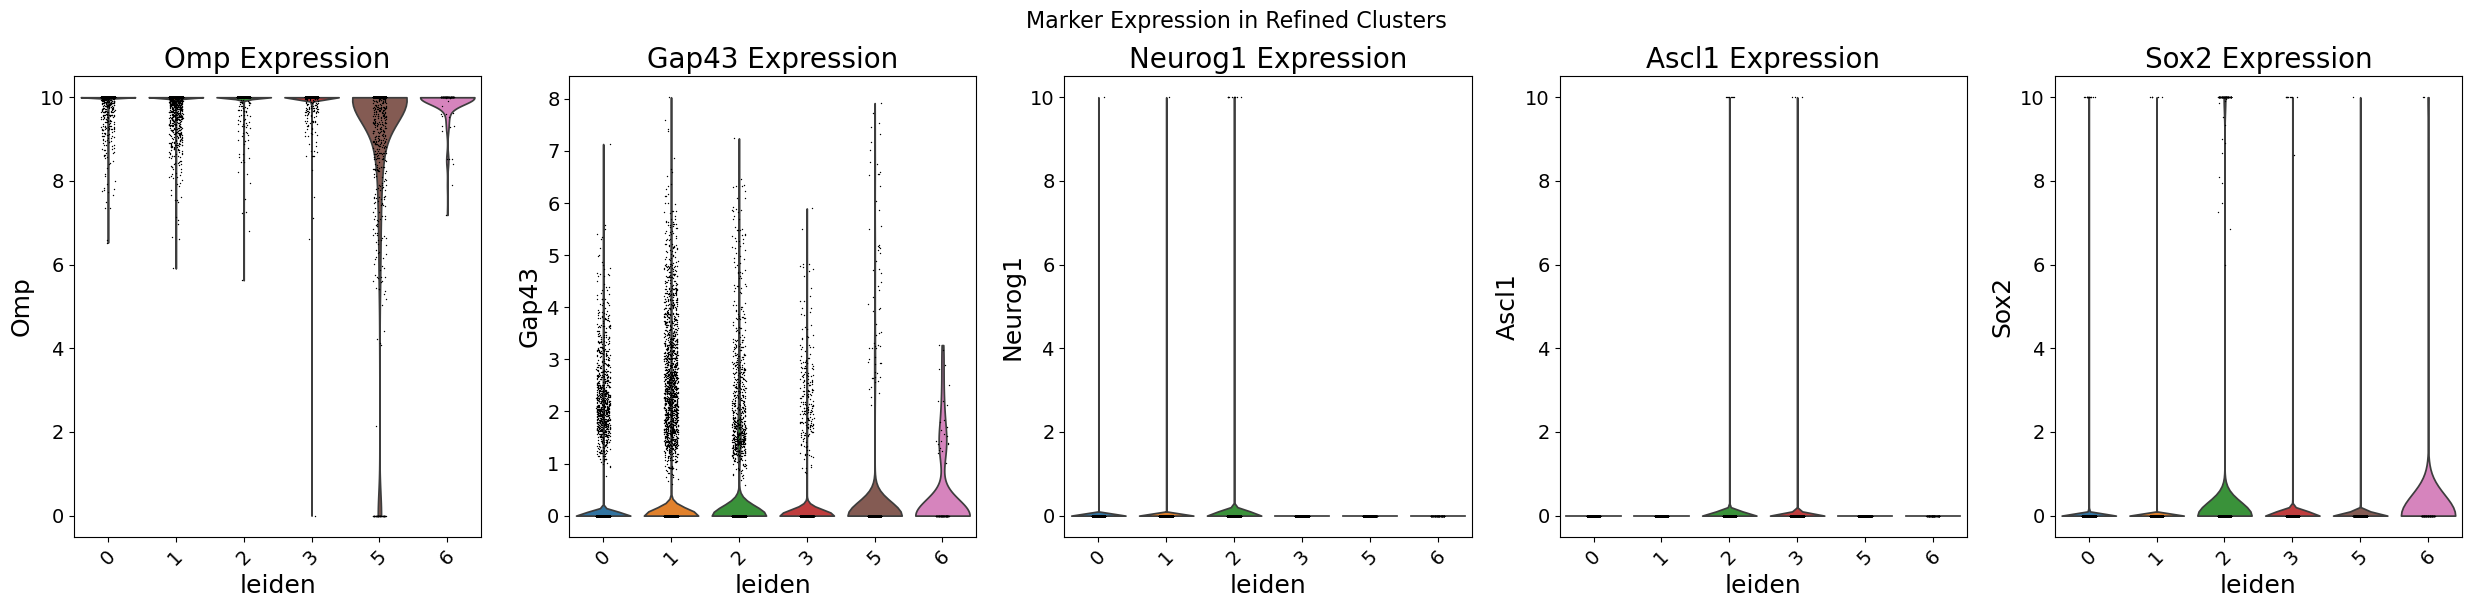

In [41]:
if available_markers:
    # Create violin plots for available markers
    n_markers = len(available_markers)
    fig, axes = plt.subplots(1, n_markers, figsize=(5*n_markers, 6))
    if n_markers == 1:
        axes = [axes]
    
    for i, gene in enumerate(available_markers):
        sc.pl.violin(adata_mature, gene, groupby='leiden', ax=axes[i], show=False)
        axes[i].set_title(f'{gene} Expression')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.suptitle('Marker Expression in Refined Clusters', fontsize=16, y=1.02)
    plt.show()

In [41]:
adata_mature.var_names

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Gm37381', 'Rp1', 'Sox17', 'Gm37587',
       'Gm37323', 'Mrpl15', 'Lypla1',
       ...
       'PR8-PB2', 'PR8-PB1', 'PR8-PA', 'PR8-HA', 'PR8-NP', 'PR8-NA', 'PR8-M2',
       'PR8-M1', 'PR8-NS2', 'PR8-NS1'],
      dtype='object', length=25003)

In [30]:
adata_mature

AnnData object with n_obs × n_vars = 45341 × 2500
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'organ_custom', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cell_type', 'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads', 'number_of_features', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.8', 'leiden_res

In [ ]:
# print(adata_mature.obs['total_counts'].describe())
# print((adata_mature.obs['total_counts'] > 500).sum(), "cells > 500 UMIs")


In [32]:
adata_mature2 = adata_mature.copy()

In [33]:
adata_mature

AnnData object with n_obs × n_vars = 45341 × 2500
    obs: 'biosample_id', 'donor_id', 'species', 'species__ontology_label', 'sex', 'disease', 'disease__ontology_label', 'organ', 'organ__ontology_label', 'organ_custom', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cell_type', 'cell_type__ontology_label', 'cell_type_custom', 'number_of_reads', 'number_of_features', 'timepoint', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden_res_0.1', 'leiden_res_0.2', 'leiden_res_0.3', 'leiden_res_0.4', 'leiden_res_0.5', 'leiden_res_0.6', 'leiden_res_0.8', 'leiden_res

In [42]:
"""
Complete OSN Analysis Pipeline
"""

import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wilcoxon
from statsmodels.stats.multitest import fdrcorrection
import warnings
warnings.filterwarnings('ignore')

# Configuration
UMI_THRESHOLD = 5  # Minimum UMIs to consider receptor expressed
MIN_CELLS_PER_TIMEPOINT = 3  # Minimum cells per timepoint per subtype
N_SHUFFLES = 10 # Number of shuffles for empirical p-value
FDR_ALPHA = 0.5  # FDR significance threshold

print("=" * 80)
print("COMPLETE OSN ANALYSIS PIPELINE")
print("=" * 80)

# ============================================================================
# STEP 1: LOAD DATA AND VERIFY
# ============================================================================
print("\n🔍 STEP 1: Loading and verifying data")
print("-" * 50)

# Assuming adata_mature is already loaded
print(f"Starting with {adata_mature.n_obs:,} mature olfactory neurons")
print(f"Timepoints: {adata_mature.obs['timepoint'].unique().tolist()}")

# Verify required fields
assert 'counts' in adata_mature.layers, "Raw counts not found in layers!"
assert 'timepoint' in adata_mature.obs, "Timepoint metadata missing!"

COMPLETE OSN ANALYSIS PIPELINE

🔍 STEP 1: Loading and verifying data
--------------------------------------------------
Starting with 43,177 mature olfactory neurons
Timepoints: ['Day 8', 'Day 14', 'Day 2', 'Day 5', 'Day 0']


In [43]:
print("\n🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis")
print("-" * 70)

# Identify olfactory receptor genes ,,or g.startswith('Taar') or g.startswith('Vmn1r')or g.startswith('Vmn1r')
or_genes = [g for g in adata_mature.var_names if g.startswith('Olfr') ]
print(f"Found {len(or_genes)} olfactory receptor genes")

# Get raw counts matrix for OR genes
or_counts = adata_mature[:, or_genes].layers['counts'].toarray()
or_counts
print("Using raw counts from 'counts' layer")

print(or_counts.shape)  # (n_cells, n_or_genes) e.g., (5000, 1000)
print(type(or_counts))  # numpy.ndarray
print(or_counts.dtype)  # int32 or int64

# Example values
print(or_counts[0, :200])  # First cell, first 5 OR genes: [0, 0, 23, 0, 1]
print(or_counts[1, :200])  # Second cell: [5, 0, 0, 0, 0]
print(or_counts[7, :200])  # Third cell: [0, 12, 0, 1, 0]


🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis
----------------------------------------------------------------------
Found 1040 olfactory receptor genes
Using raw counts from 'counts' layer
(43177, 1040)
<class 'numpy.ndarray'>
float32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [39]:
print("Available layers:", list(adata_mature.layers.keys()))
# The 'counts' layer might not contain what we expect
print("Counts layer shape:", adata_mature.layers['counts'].shape)
print("Counts layer type:", type(adata_mature.layers['counts']))
print("Non-zero values:", (adata_mature.layers['counts'] > 0).sum())

Available layers: ['counts']
Counts layer shape: (43154, 25003)
Counts layer type: <class 'scipy.sparse._csc.csc_matrix'>
Non-zero values: 116677464



🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis
----------------------------------------------------------------------
Found 1040 olfactory receptor genes
Using raw counts from 'counts' layer

Analyzing receptor groups at different UMI thresholds...

Results for all thresholds:
Threshold | Zero-rec Cells | One-rec Cells | Multi-rec Cells | % Zero | % One | % Multi
--------------------------------------------------------------------------------
        0 |             0 |            0 |         43,177 |    0.0% |   0.0% |  100.0%
        1 |           846 |       18,093 |         24,238 |    2.0% |  41.9% |   56.1%
        2 |         1,741 |       36,771 |          4,665 |    4.0% |  85.2% |   10.8%
        3 |         1,925 |       37,793 |          3,459 |    4.5% |  87.5% |    8.0%
        4 |         2,124 |       37,940 |          3,113 |    4.9% |  87.9% |    7.2%
        5 |         2,314 |       37,948 |          2,915 |    5.4% |  87.9% |    6.8%
     

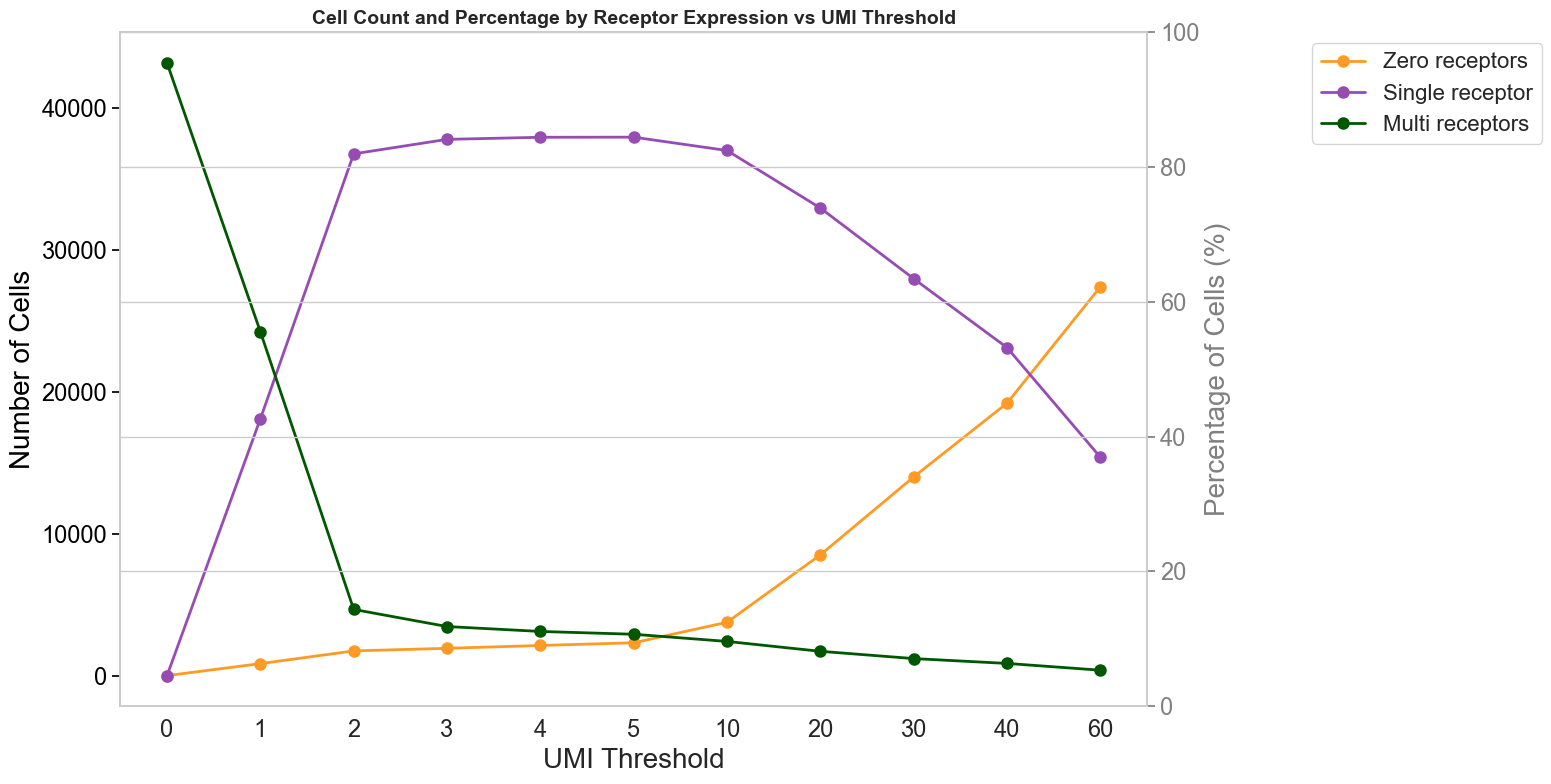

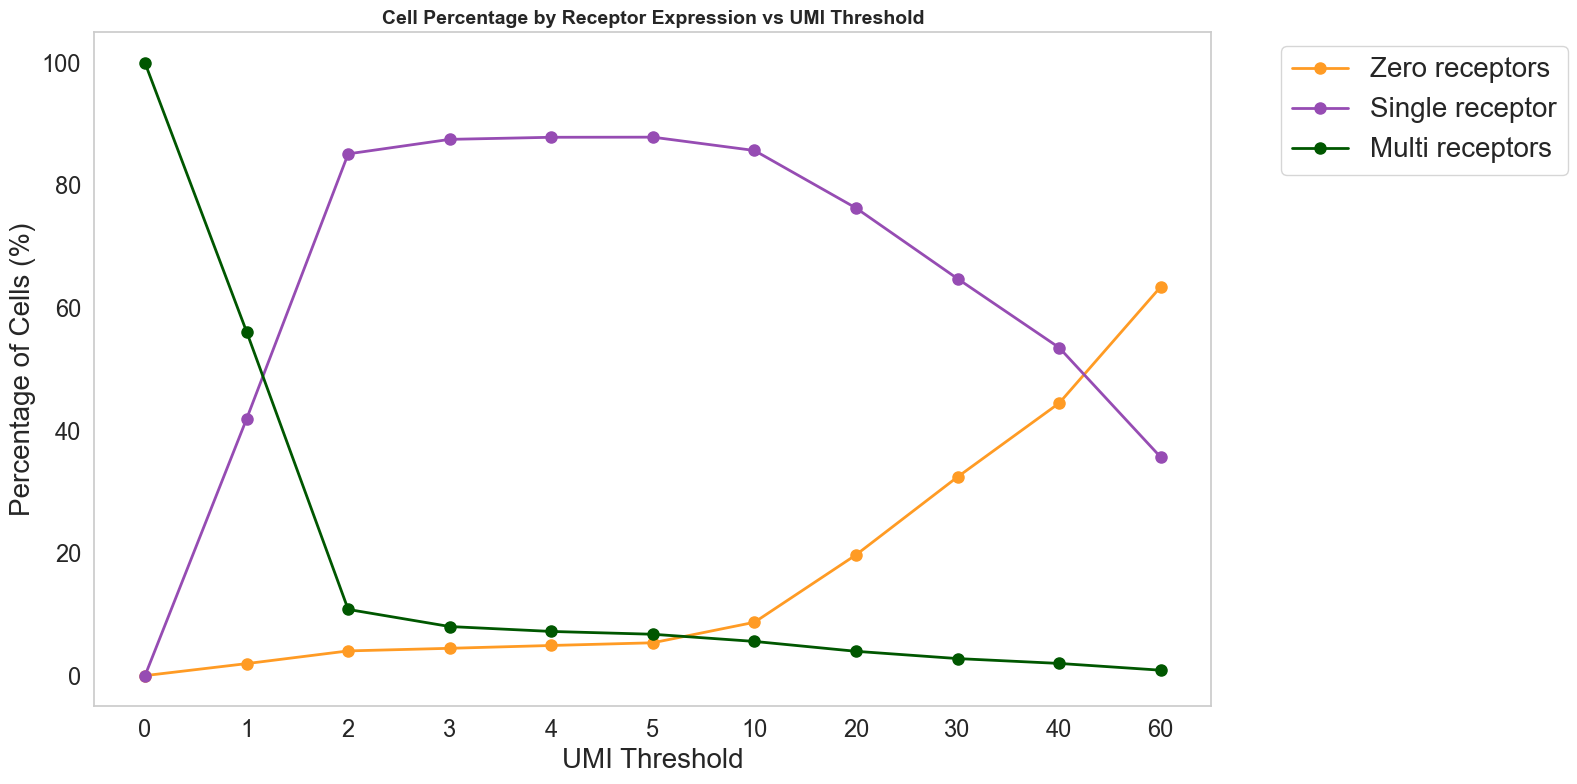

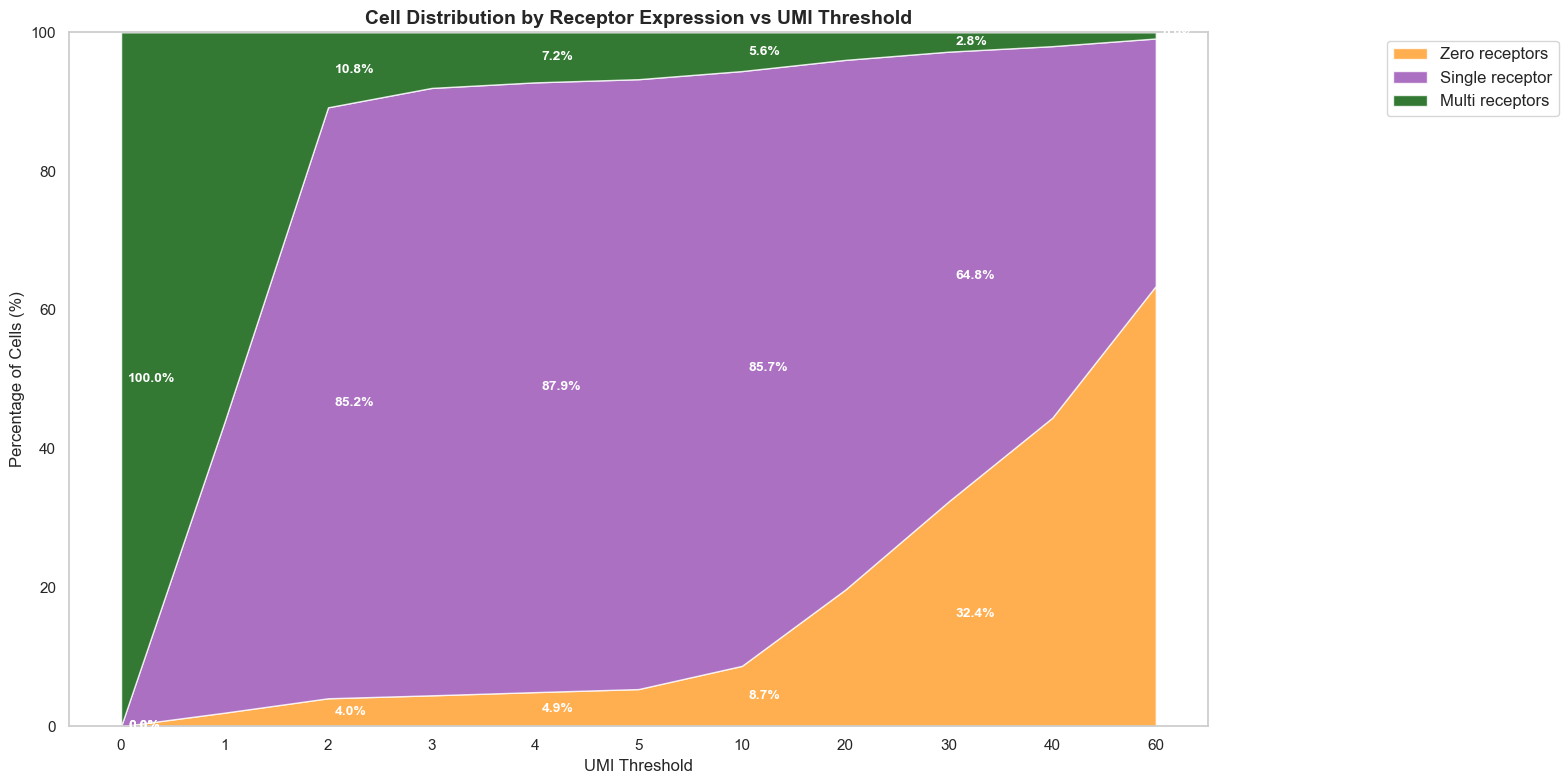


📊 SUMMARY STATISTICS:
Total mature cells analyzed: 43,177
UMI threshold range tested: 0 - 60
Maximum zero-receptor cells: 27,400 at threshold 60
Maximum single-receptor cells: 37,948 at threshold 5
Maximum multi-receptor cells: 43,177 at threshold 0

🎯 Using original UMI threshold of 5:

Receptor expression per cell:
0     2314
1    37948
2     2719
3      178
4       17
5        1
Name: count, dtype: int64

Cells with 0 receptors: 2,314 (5.4%)
Cells with exactly 1 receptor: 37,948 (87.9%)
Cells with 2+ receptors: 2,915 (6.8%)

✅ UMI threshold analysis complete with three-group classification!


In [90]:
# ============================================================================
# STEP 2: SINGLE-RECEPTOR CELL IDENTIFICATION WITH UMI THRESHOLD ANALYSIS
# ============================================================================
print("\n🔬 STEP 2: Identifying single-receptor cells with UMI threshold analysis")
print("-" * 70)

# Identify olfactory receptor genes ,,or g.startswith('Taar') or g.startswith('Vmn1r')or g.startswith('Vmn1r')
or_genes = [g for g in adata_mature.var_names if g.startswith('Olfr') ]
print(f"Found {len(or_genes)} olfactory receptor genes")

# Get raw counts matrix for OR genes
or_counts = adata_mature[:, or_genes].layers['counts'].toarray()
print("Using raw counts from 'counts' layer")

# Define thresholds - 1-10 and 20,30,40,50
umi_thresholds_full = list(range(0, 6)) + [10,20, 30, 40, 60]
# Create positions with more spacing between x-axis labels
positions = [i * 1.5 for i in range(len(umi_thresholds_full))]  # Increased spacing between positions
umi_thresholds_display = umi_thresholds_full  # Show all points

# Initialize lists for all three groups
zero_receptor_counts = []
single_receptor_counts = []
multi_receptor_counts = []

zero_receptor_percentages = []
single_receptor_percentages = []
multi_receptor_percentages = []

total_cells = adata_mature.n_obs

print("\nAnalyzing receptor groups at different UMI thresholds...")

# Calculate for all thresholds
for threshold in umi_thresholds_full:
    # Apply threshold to determine expressed receptors
    or_expressed = or_counts >= threshold
    receptors_per_cell = or_expressed.sum(axis=1)
    
    # Count all three groups
    n_zero = (receptors_per_cell == 0).sum()
    n_single = (receptors_per_cell == 1).sum()
    n_multi = (receptors_per_cell >= 2).sum()
    
    # Store counts
    zero_receptor_counts.append(n_zero)
    single_receptor_counts.append(n_single)
    multi_receptor_counts.append(n_multi)
    
    # Store percentages
    zero_receptor_percentages.append(n_zero / total_cells * 100)
    single_receptor_percentages.append(n_single / total_cells * 100)
    multi_receptor_percentages.append(n_multi / total_cells * 100)

# Print results for all thresholds
print("\nResults for all thresholds:")
print("Threshold | Zero-rec Cells | One-rec Cells | Multi-rec Cells | % Zero | % One | % Multi")
print("-" * 80)
for i, threshold in enumerate(umi_thresholds_display):
    print(f"{threshold:9d} | {zero_receptor_counts[i]:13,d} | {single_receptor_counts[i]:12,d} | {multi_receptor_counts[i]:14,d} | "
          f"{zero_receptor_percentages[i]:6.1f}% | {single_receptor_percentages[i]:5.1f}% | {multi_receptor_percentages[i]:6.1f}%")

# Create visualizations with dual y-axes
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))  # Increased width for better spacing
fig.patch.set_facecolor('white')

custom_colors = ['#ff9b24', '#964cb3', '#005700']
# Define colors for the three groups
colors = {'zero': '#ff9b24', 'single': '#964cb3', 'multi': '#005700'}

# Plot counts on left y-axis
ax1.plot(positions, zero_receptor_counts, '-o', color=colors['zero'], linewidth=2, markersize=8, label='Zero receptors')
ax1.plot(positions, single_receptor_counts, '-o', color=colors['single'], linewidth=2, markersize=8, label='Single receptor')
ax1.plot(positions, multi_receptor_counts, '-o', color=colors['multi'], linewidth=2, markersize=8, label='Multi receptors')

ax1.set_title('Cell Count and Percentage by Receptor Expression vs UMI Threshold', fontsize=14, fontweight='bold')
ax1.set_xlabel('UMI Threshold', fontsize=20)
ax1.set_ylabel('Number of Cells', fontsize=20, color='black')
ax1.grid(False)
ax1.set_facecolor('white')
ax1.set_xticks(positions)
ax1.set_xticklabels(umi_thresholds_full, fontsize=17)
ax1.tick_params(axis='y', labelsize=17, colors='black')

# Create second y-axis for percentages
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Cells (%)', fontsize=20, color='gray')
ax2.tick_params(axis='y', labelsize=17, colors='gray')

# Set percentage axis limits to match the data range
ax2.set_ylim(0, 100)

# Calculate percentage axis ticks to align with count values
# This creates a clean percentage scale on the right
percentage_ticks = [0, 20, 40, 60, 80, 100]
ax2.set_yticks(percentage_ticks)

# Add legend for both axes
ax1.legend(fontsize=16, bbox_to_anchor=(1.15, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create a second plot showing only percentages for clarity
fig, ax = plt.subplots(1, 1, figsize=(16, 8))  # Increased width for better spacing
fig.patch.set_facecolor('white')

ax.plot(positions, zero_receptor_percentages, '-o', color=colors['zero'], linewidth=2, markersize=8, label='Zero receptors')
ax.plot(positions, single_receptor_percentages, '-o', color=colors['single'], linewidth=2, markersize=8, label='Single receptor')
ax.plot(positions, multi_receptor_percentages, '-o', color=colors['multi'], linewidth=2, markersize=8, label='Multi receptors')

ax.set_title('Cell Percentage by Receptor Expression vs UMI Threshold', fontsize=14, fontweight='bold')
ax.set_xlabel('UMI Threshold', fontsize=20)
ax.set_ylabel('Percentage of Cells (%)', fontsize=20)
ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks(positions)
ax.set_xticklabels(umi_thresholds_full, fontsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.legend(fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Create a stacked area plot to show proportions
fig, ax = plt.subplots(figsize=(16, 8))  # Increased width for percentage labels
fig.patch.set_facecolor('white')

# Create stacked area plot
ax.stackplot(positions, 
             [zero_receptor_percentages, single_receptor_percentages, multi_receptor_percentages],
             colors=[colors['zero'], colors['single'], colors['multi']],
             labels=['Zero receptors', 'Single receptor', 'Multi receptors'],
             alpha=0.8)

# Add percentage labels on the right side for stacked plot
for i, pos in enumerate(positions):
    if i % 2 == 0 or i == len(positions) - 1:  # Show labels for even indices and last point
        # Calculate cumulative positions for stacked labels
        zero_y = zero_receptor_percentages[i] / 2
        single_y = zero_receptor_percentages[i] + single_receptor_percentages[i] / 2
        multi_y = zero_receptor_percentages[i] + single_receptor_percentages[i] + multi_receptor_percentages[i] / 2
        
        ax.text(pos + 0.1, zero_y, f'{zero_receptor_percentages[i]:.1f}%', 
                color='white', fontsize=10, va='center', weight='bold')
        ax.text(pos + 0.1, single_y, f'{single_receptor_percentages[i]:.1f}%', 
                color='white', fontsize=10, va='center', weight='bold')
        ax.text(pos + 0.1, multi_y, f'{multi_receptor_percentages[i]:.1f}%', 
                color='white', fontsize=10, va='center', weight='bold')

ax.set_title('Cell Distribution by Receptor Expression vs UMI Threshold', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('UMI Threshold', fontsize=12)
ax.set_ylabel('Percentage of Cells (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks(positions)
ax.set_xticklabels(umi_thresholds_full)
# Move legend outside
ax.legend(fontsize=12, bbox_to_anchor=(1.15, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
print(f"Total mature cells analyzed: {total_cells:,}")
print(f"UMI threshold range tested: {min(umi_thresholds_full)} - {max(umi_thresholds_full)}")

# Find peaks and transitions for each group
max_zero_idx = zero_receptor_counts.index(max(zero_receptor_counts))
max_single_idx = single_receptor_counts.index(max(single_receptor_counts))
max_multi_idx = multi_receptor_counts.index(max(multi_receptor_counts))

print(f"Maximum zero-receptor cells: {max(zero_receptor_counts):,} at threshold {umi_thresholds_full[max_zero_idx]}")
print(f"Maximum single-receptor cells: {max(single_receptor_counts):,} at threshold {umi_thresholds_full[max_single_idx]}")
print(f"Maximum multi-receptor cells: {max(multi_receptor_counts):,} at threshold {umi_thresholds_full[max_multi_idx]}")

# Continue with your original threshold analysis
print(f"\n🎯 Using original UMI threshold of {UMI_THRESHOLD}:")
or_expressed = or_counts >= UMI_THRESHOLD
receptors_per_cell = or_expressed.sum(axis=1)

print("\nReceptor expression per cell:")
receptor_distribution = pd.Series(receptors_per_cell).value_counts().sort_index()
print(receptor_distribution)

# Identify and report all three groups
zero_receptor_mask = receptors_per_cell == 0
single_receptor_mask = receptors_per_cell == 1
multi_receptor_mask = receptors_per_cell >= 2

n_zero = zero_receptor_mask.sum()
n_single = single_receptor_mask.sum()
n_multi = multi_receptor_mask.sum()

pct_zero = n_zero / adata_mature.n_obs * 100
pct_single = n_single / adata_mature.n_obs * 100
pct_multi = n_multi / adata_mature.n_obs * 100

print(f"\nCells with 0 receptors: {n_zero:,} ({pct_zero:.1f}%)")
print(f"Cells with exactly 1 receptor: {n_single:,} ({pct_single:.1f}%)")
print(f"Cells with 2+ receptors: {n_multi:,} ({pct_multi:.1f}%)")

if pct_single < 80:
    print("⚠️ Warning: Less than 80% of cells have exactly one receptor!")

print(f"\n✅ UMI threshold analysis complete with three-group classification!")



In [45]:
# Create new AnnData object
adata_single = adata_mature[single_receptor_mask].copy()

# Assign dominant receptor metadata
dominant_receptors = []
for i in range(adata_single.n_obs):
    expressed_idx = np.where(or_expressed[single_receptor_mask][i])[0]
    dominant_receptors.append(or_genes[expressed_idx[0]] if len(expressed_idx) > 0 else "None")
    if i %1000==0:
        print(f"Processed {dominant_receptors[i],"==>>>",i} cells")

adata_single.obs['dominant_receptor'] = dominant_receptors

print(f"\n✅ Created new AnnData with {adata_single.n_obs:,} single-receptor cells")

Processed ('Olfr870', '==>>>', 0) cells
Processed ('Olfr1364', '==>>>', 1000) cells
Processed ('Olfr1220', '==>>>', 2000) cells
Processed ('Olfr1018', '==>>>', 3000) cells
Processed ('Olfr764-ps1', '==>>>', 4000) cells
Processed ('Olfr131', '==>>>', 5000) cells
Processed ('Olfr1276', '==>>>', 6000) cells
Processed ('Olfr1226', '==>>>', 7000) cells
Processed ('Olfr1346', '==>>>', 8000) cells
Processed ('Olfr1057', '==>>>', 9000) cells
Processed ('Olfr1511', '==>>>', 10000) cells
Processed ('Olfr1513', '==>>>', 11000) cells
Processed ('Olfr961', '==>>>', 12000) cells
Processed ('Olfr933', '==>>>', 13000) cells
Processed ('Olfr279', '==>>>', 14000) cells
Processed ('Olfr354', '==>>>', 15000) cells
Processed ('Olfr169', '==>>>', 16000) cells
Processed ('Olfr1350', '==>>>', 17000) cells
Processed ('Olfr430', '==>>>', 18000) cells
Processed ('Olfr689', '==>>>', 19000) cells
Processed ('Olfr689', '==>>>', 20000) cells
Processed ('Olfr1254', '==>>>', 21000) cells
Processed ('Olfr469', '==>>>',


📊 Visualizing Step 2: Receptor Expression Analysis


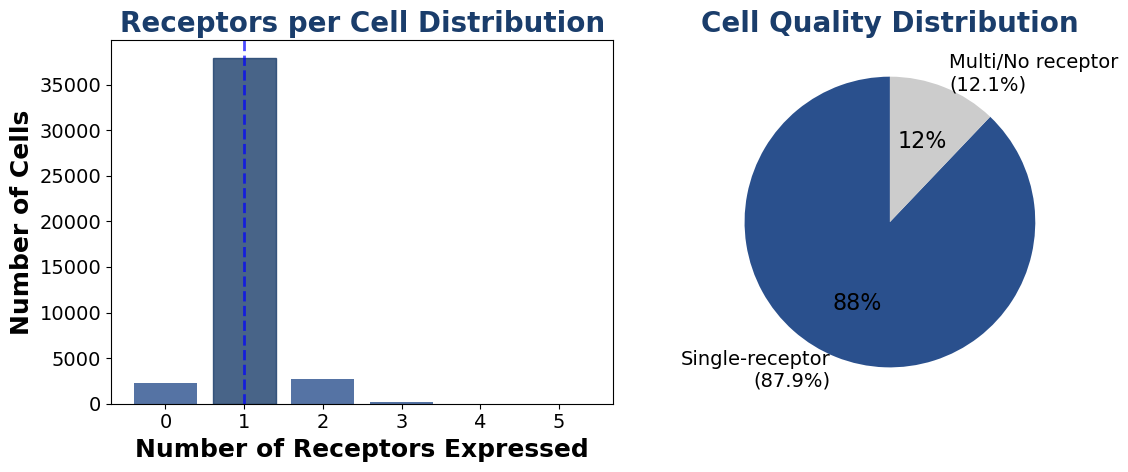

In [46]:
print("\n📊 Visualizing Step 2: Receptor Expression Analysis")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Receptors per cell distribution
receptor_dist = pd.Series(receptors_per_cell).value_counts().sort_index()
bars = ax1.bar(receptor_dist.index, receptor_dist.values, color='#2a508d', alpha=0.8)
ax1.set_title('Receptors per Cell Distribution', fontweight='bold', color='#1a3d6b')
ax1.set_xlabel('Number of Receptors Expressed', fontweight='bold')
ax1.set_ylabel('Number of Cells', fontweight='bold')
ax1.axvline(x=1, color='blue', linestyle='--', alpha=0.7, linewidth=2)

# Highlight single-receptor bar
if 1 in receptor_dist.index:
    single_idx = list(receptor_dist.index).index(1)
    bars[single_idx].set_color('#1a3d6b')

# Cell quality summary
ax2.pie([n_single, adata_mature.n_obs - n_single], 
        labels=[f'Single-receptor\n({pct_single:.1f}%)', f'Multi/No receptor\n({100-pct_single:.1f}%)'],
        colors=['#2a508d', '#cccccc'], autopct='%1.0f%%', startangle=90)
ax2.set_title('Cell Quality Distribution', fontweight='bold', color='#1a3d6b')

plt.tight_layout()
plt.show()

In [48]:
# Check how many cells actually express receptors
cells_with_receptors = (or_counts.sum(axis=1) > 0).sum()
print(f"Cells expressing at least 1 receptor: {cells_with_receptors:,} ({cells_with_receptors/len(adata_mature.obs)*100:.1f}%)")

# # Check how many receptors are expressed across the dataset
# receptors_expressed = (or_counts.sum(axis=0) > 0).sum()
# print(f"Receptors expressed in at least 1 cell: {receptors_expressed:,} ({receptors_expressed/len(adata_mature.var)*100:.1f}%)")

# Look at non-zero examples
non_zero_mask = or_counts > 0
if non_zero_mask.any():
    non_zero_indices = np.where(non_zero_mask)
    print(f"\nFirst 10 non-zero examples:")
    for i in range(min(10, len(non_zero_indices[0]))):
        cell_idx = non_zero_indices[0][i]
        gene_idx = non_zero_indices[1][i]
        count = or_counts[cell_idx, gene_idx]
        print(f"Cell {cell_idx}, Gene {or_genes[gene_idx]}: {count} UMIs")

Cells expressing at least 1 receptor: 42,331 (98.0%)

First 10 non-zero examples:
Cell 5, Gene Olfr923: 1.0 UMIs
Cell 9, Gene Olfr870: 14.0 UMIs
Cell 13, Gene Olfr798: 1.0 UMIs
Cell 17, Gene Olfr869: 47.0 UMIs
Cell 18, Gene Olfr1330: 26.0 UMIs
Cell 19, Gene Olfr1384: 70.0 UMIs
Cell 19, Gene Olfr332: 1.0 UMIs
Cell 20, Gene Olfr91: 19.0 UMIs
Cell 21, Gene Olfr1246: 3.0 UMIs
Cell 21, Gene Olfr592: 1.0 UMIs



📊 STEP 3: Filtering OSN subtypes with threshold analysis
----------------------------------------------------------------------
Testing MIN_CELLS_PER_TIMEPOINT thresholds: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Analyzing valid OSN subtypes at different cell count thresholds:
Threshold | Valid subtypes | Percentage
----------------------------------------
       0 |           996 |     100.0%
       1 |           698 |      70.1%
       2 |           524 |      52.6%
       3 |           390 |      39.2%
       4 |           297 |      29.8%
       5 |           218 |      21.9%
       6 |           180 |      18.1%
       7 |           146 |      14.7%
       8 |           121 |      12.1%
       9 |            88 |       8.8%
      10 |            69 |       6.9%


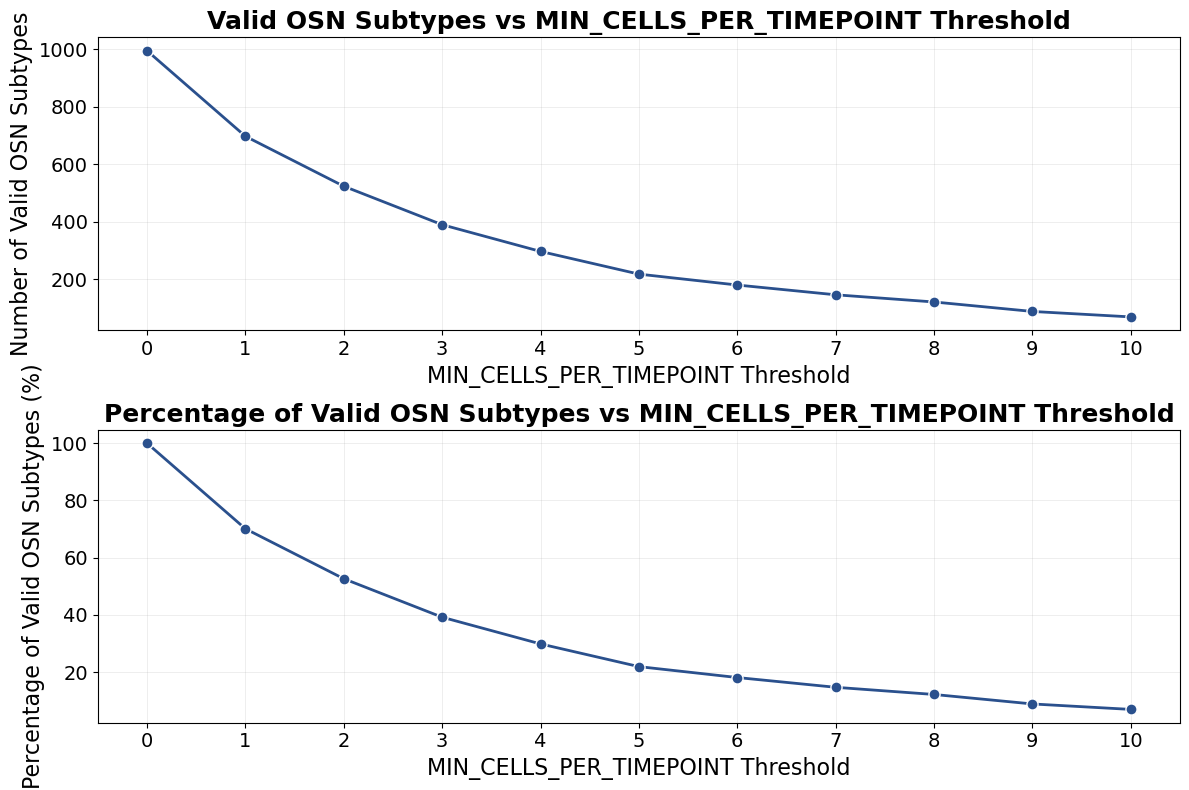

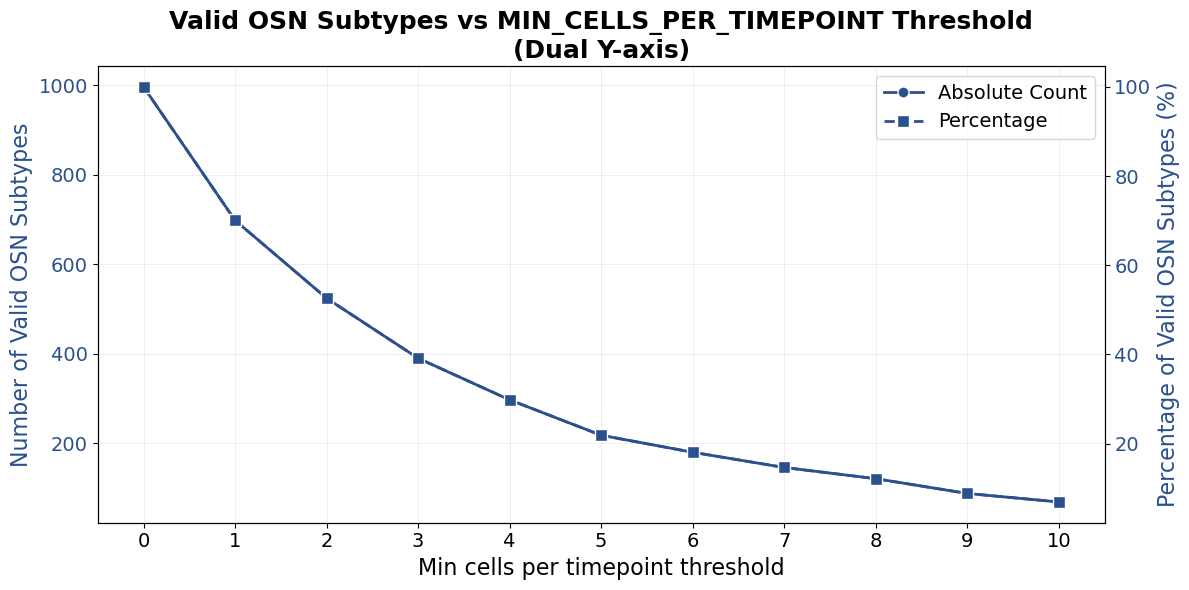


📊 SUMMARY STATISTICS:
Total OSN subtypes analyzed: 996
MIN_CELLS_PER_TIMEPOINT threshold range tested: 0 - 10
Maximum valid subtypes: 996 at threshold 0
Minimum valid subtypes: 69 at threshold 10

🎯 Using original MIN_CELLS_PER_TIMEPOINT threshold of 3:
Subtypes with ≥3 cells in all timepoints: 390/996 (39.2%)
Cells after filtering: 26,002
Average cells per subtype: 66.7

✅ Created final AnnData with 26,002 cells from 390 OSN subtypes


In [131]:
# ============================================================================
# STEP 3: OSN SUBTYPE FILTERING WITH THRESHOLD ANALYSIS
# ============================================================================
print("\n📊 STEP 3: Filtering OSN subtypes with threshold analysis")
print("-" * 70)

# Count cells per receptor per timepoint
receptor_time_counts = (
    adata_single.obs
    .groupby(['dominant_receptor', 'timepoint'])
    .size()
    .unstack(fill_value=0)
)

# Define thresholds to test (0 to 10)
min_cells_thresholds_full = list(range(0, 11, 1))  # 0, 1, 2, ..., 10
min_cells_thresholds_display = list(range(0, 11, 1))  # Display all since range is small
print(f"Testing MIN_CELLS_PER_TIMEPOINT thresholds: {min_cells_thresholds_display}")

# Initialize lists to store results
valid_subtypes_counts = []
valid_subtypes_percentages = []
total_subtypes = len(receptor_time_counts)

print("\nAnalyzing valid OSN subtypes at different cell count thresholds:")
print("Threshold | Valid subtypes | Percentage")
print("-" * 40)

# Test each threshold
for threshold in min_cells_thresholds_full:
    # Require minimum cells in ALL timepoints
    valid_receptors = receptor_time_counts[
        (receptor_time_counts >= threshold).all(axis=1)
    ].index
    
    n_valid = len(valid_receptors)
    pct_valid = n_valid / total_subtypes * 100
    
    # Store results
    valid_subtypes_counts.append(n_valid)
    valid_subtypes_percentages.append(pct_valid)
    
    print(f"{threshold:8d} | {n_valid:13d} | {pct_valid:9.1f}%")

# Create the visualization with clean design, markers, and larger fonts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.patch.set_facecolor('white')

# Plot 1: Absolute counts with markers and grid
ax1.plot(min_cells_thresholds_full, valid_subtypes_counts, '-o', color='#2a508d', 
         linewidth=2, markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)
ax1.set_title('Valid OSN Subtypes vs MIN_CELLS_PER_TIMEPOINT Threshold', fontsize=18, fontweight='bold')
ax1.set_xlabel('MIN_CELLS_PER_TIMEPOINT Threshold', fontsize=16)
ax1.set_ylabel('Number of Valid OSN Subtypes', fontsize=16)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')
ax1.set_xticks(min_cells_thresholds_display)
# Make tick labels larger
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plot 2: Percentages with markers and grid
ax2.plot(min_cells_thresholds_full, valid_subtypes_percentages, '-o', color='#2a508d', 
         linewidth=2, markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)
ax2.set_title('Percentage of Valid OSN Subtypes vs MIN_CELLS_PER_TIMEPOINT Threshold', fontsize=18, fontweight='bold')
ax2.set_xlabel('MIN_CELLS_PER_TIMEPOINT Threshold', fontsize=16)
ax2.set_ylabel('Percentage of Valid OSN Subtypes (%)', fontsize=16)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_facecolor('white')
ax2.set_xticks(min_cells_thresholds_display)
# Make tick labels larger
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

# Create a combined plot for better comparison with markers, grid, and larger fonts
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')

# Plot counts on primary y-axis with markers
ax1.set_xlabel('Min cells per timepoint threshold', fontsize=16)
ax1.set_ylabel('Number of Valid OSN Subtypes', color='#2a508d', fontsize=16)
line1 = ax1.plot(min_cells_thresholds_full, valid_subtypes_counts, '-o', color='#2a508d', 
                linewidth=2, markersize=8, markerfacecolor='#2a508d', 
                markeredgecolor='white', markeredgewidth=1, label='Absolute Count')
ax1.tick_params(axis='y', labelcolor='#2a508d', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')
ax1.set_xticks(min_cells_thresholds_display)

# Create secondary y-axis for percentages with markers
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Valid OSN Subtypes (%)', color='#2a508d', fontsize=16)
line2 = ax2.plot(min_cells_thresholds_full, valid_subtypes_percentages, '--s', color='#2a508d', 
                linewidth=2, markersize=8, markerfacecolor='#2a508d', 
                markeredgecolor='white', markeredgewidth=1, label='Percentage')
ax2.tick_params(axis='y', labelcolor='#2a508d', labelsize=14)

# Add title and legend with larger fonts
plt.title('Valid OSN Subtypes vs MIN_CELLS_PER_TIMEPOINT Threshold\n(Dual Y-axis)', 
          fontsize=18, fontweight='bold')

# Combine legends with larger font
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
print(f"Total OSN subtypes analyzed: {total_subtypes:,}")
print(f"MIN_CELLS_PER_TIMEPOINT threshold range tested: {min(min_cells_thresholds_full)} - {max(min_cells_thresholds_full)}")
print(f"Maximum valid subtypes: {max(valid_subtypes_counts):,} at threshold {min_cells_thresholds_full[valid_subtypes_counts.index(max(valid_subtypes_counts))]}")
print(f"Minimum valid subtypes: {min(valid_subtypes_counts):,} at threshold {min_cells_thresholds_full[valid_subtypes_counts.index(min(valid_subtypes_counts))]}")

# Continue with your original threshold analysis
print(f"\n🎯 Using original MIN_CELLS_PER_TIMEPOINT threshold of {MIN_CELLS_PER_TIMEPOINT}:")

# Require minimum cells in ALL timepoints
valid_receptors = receptor_time_counts[
    (receptor_time_counts >= MIN_CELLS_PER_TIMEPOINT).all(axis=1)
].index

n_valid = len(valid_receptors)
pct_valid = n_valid / len(receptor_time_counts) * 100

print(f"Subtypes with ≥{MIN_CELLS_PER_TIMEPOINT} cells in all timepoints: "
      f"{n_valid:,}/{len(receptor_time_counts):,} ({pct_valid:.1f}%)")

# Filter cells
valid_mask = adata_single.obs['dominant_receptor'].isin(valid_receptors)
adata_final = adata_single[valid_mask].copy()

print(f"Cells after filtering: {adata_final.n_obs:,}")
print(f"Average cells per subtype: {adata_final.n_obs / n_valid:.1f}")

print(f"\n✅ Created final AnnData with {adata_final.n_obs:,} cells from {n_valid:,} OSN subtypes")


📊 Visualizing Step 3: Subtype Filtering


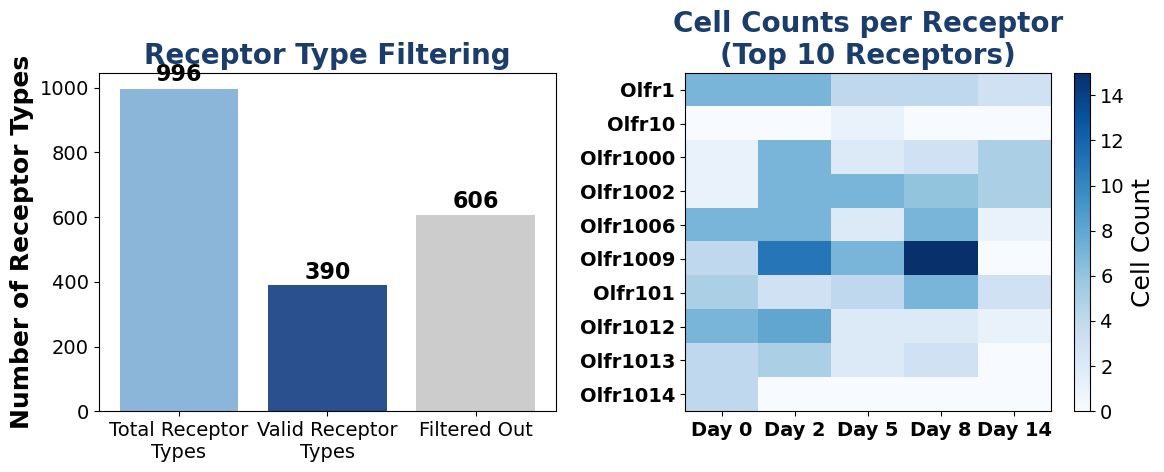

In [50]:
print("\n📊 Visualizing Step 3: Subtype Filtering")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Receptor filtering summary
categories = ['Total Receptor\nTypes', 'Valid Receptor\nTypes', 'Filtered Out']
values = [len(receptor_time_counts), n_valid, len(receptor_time_counts) - n_valid]
colors = ['#8bb5d9', '#2a508d', '#cccccc']
bars = ax1.bar(categories, values, color=colors)
ax1.set_title('Receptor Type Filtering', fontweight='bold', color='#1a3d6b')
ax1.set_ylabel('Number of Receptor Types', fontweight='bold')

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{val}', ha='center', va='bottom', fontweight='bold')

# Sample receptor-timepoint heatmap (top 10 receptors)
sample_receptors = receptor_time_counts.head(10)
im = ax2.imshow(sample_receptors.values, cmap='Blues', aspect='auto')
ax2.set_xticks(range(len(sample_receptors.columns)))
ax2.set_xticklabels(sample_receptors.columns, fontweight='bold')
ax2.set_yticks(range(len(sample_receptors.index)))
ax2.set_yticklabels(sample_receptors.index, fontweight='bold')
ax2.set_title('Cell Counts per Receptor\n(Top 10 Receptors)', fontweight='bold', color='#1a3d6b')
plt.colorbar(im, ax=ax2, label='Cell Count')

plt.tight_layout()
plt.show()


🧬 STEP 4: Filtering non-OR genes with threshold analysis
----------------------------------------------------------------------
Non-OR genes to analyze: 23,787
Calculating gene expression counts for threshold analysis...
Processed 5,000/23,787 genes...
Processed 10,000/23,787 genes...
Processed 15,000/23,787 genes...
Processed 20,000/23,787 genes...
Gene expression analysis complete!
Testing MIN_CELLS_EXPRESSING thresholds: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

Analyzing valid genes at different cell count thresholds:
Threshold | Valid genes | Percentage
--------------------------------------
       0 |      23787 |     100.0%
       5 |      18056 |      75.9%
      10 |      16725 |      70.3%
      15 |      15904 |      66.9%
      20 |      15363 |      64.6%
      25 |      14889 |      62.6%
      30 |      14547 |      61.2%
      35 |      14254 |      59.9%
      40 |      14005 |      58.9%
      45 |      13803 |      58.0%
      50 |      13615 |      57.2%


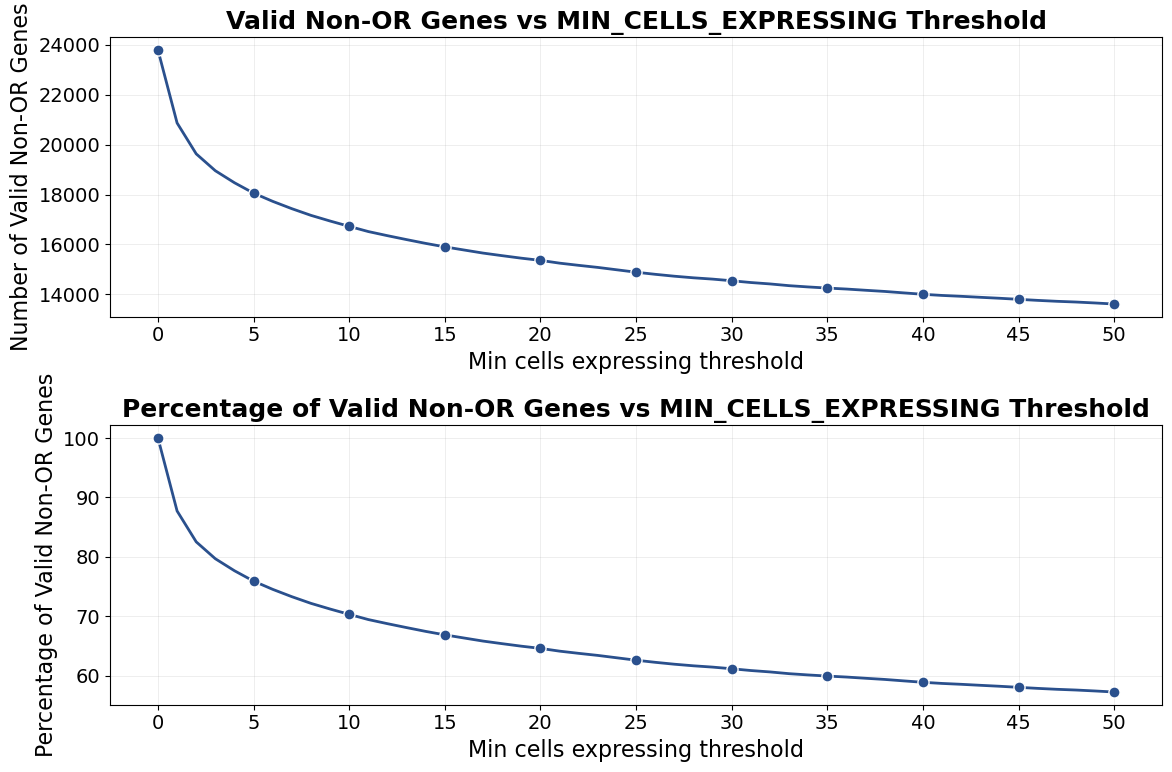

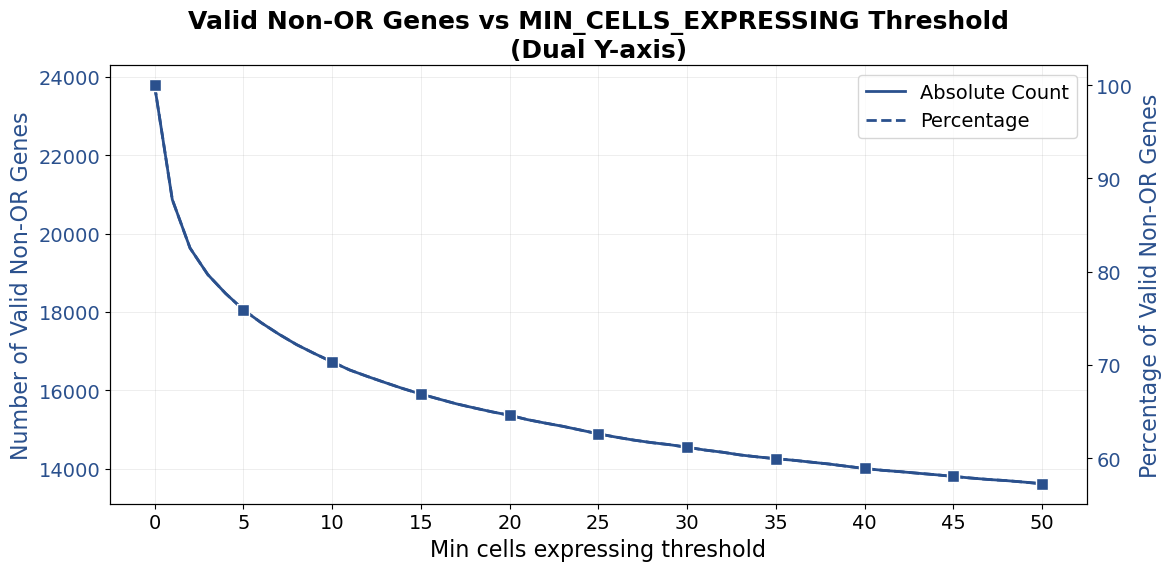


📊 SUMMARY STATISTICS:
Total non-OR genes analyzed: 23,787
MIN_CELLS_EXPRESSING threshold range tested: 0 - 50
Maximum valid genes: 23,787 at threshold 0
Minimum valid genes: 13,615 at threshold 50

🎯 Using MIN_CELLS_EXPRESSING threshold of 3:
Non-OR genes passing filter: 18,953
Non-OR genes filtered out: 4,834

Creating filtered AnnData object...
Final dataset:
  Cells: 26,002
  Genes: 19,993
    - Non-OR genes: 18,953
    - OR genes: 1,040

✅ Gene filtering with threshold analysis complete!


In [51]:
# ============================================================================
# STEP 4: GENE FILTERING WITH THRESHOLD ANALYSIS (MEMORY-OPTIMIZED)
# ============================================================================
print("\n🧬 STEP 4: Filtering non-OR genes with threshold analysis")
print("-" * 70)

# 1. Exclude OR genes first
non_or_genes = [
    g for g in adata_final.var_names 
    if not (g.startswith('Olfr') or g.startswith('Taar') or g.startswith('Vmn'))
]
print(f"Non-OR genes to analyze: {len(non_or_genes):,}")

# 2. Get indices of non-OR genes
non_or_indices = [i for i, gene in enumerate(adata_final.var_names) if gene in non_or_genes]

# 3. Calculate expression counts for all genes (for threshold analysis)
print("Calculating gene expression counts for threshold analysis...")
gene_cell_counts = []

chunk_size = 500  # Process 500 genes at a time
for i in range(0, len(non_or_indices), chunk_size):
    chunk_indices = non_or_indices[i:i+chunk_size]
    
    # Access gene expression for the chunk
    X_chunk = adata_final[:, chunk_indices].X
    
    # Convert to dense array only if sparse
    if hasattr(X_chunk, "toarray"):
        X_chunk = X_chunk.toarray()
    
    # Count expressing cells per gene
    for j in range(X_chunk.shape[1]):
        cells_expressing = (X_chunk[:, j] > 0).sum()
        gene_cell_counts.append(cells_expressing)
    
    # Progress update
    if (i // chunk_size + 1) % 10 == 0:
        print(f"Processed {i + chunk_size:,}/{len(non_or_indices):,} genes...")

print("Gene expression analysis complete!")

# 4. Threshold analysis
# Define thresholds to test (0 to 50)
min_cells_thresholds_full = list(range(0, 51, 1))  # 0, 1, 2, ..., 50
min_cells_thresholds_display = list(range(0, 51, 5))  # 0, 5, 10, 15, ..., 50
print(f"Testing MIN_CELLS_EXPRESSING thresholds: {min_cells_thresholds_display}")

# Initialize lists to store results
valid_genes_counts = []
valid_genes_percentages = []
total_genes = len(gene_cell_counts)

print("\nAnalyzing valid genes at different cell count thresholds:")
print("Threshold | Valid genes | Percentage")
print("-" * 38)

# Test each threshold
for threshold in min_cells_thresholds_full:
    n_valid = sum(1 for count in gene_cell_counts if count >= threshold)
    pct_valid = n_valid / total_genes * 100
    
    # Store results
    valid_genes_counts.append(n_valid)
    valid_genes_percentages.append(pct_valid)

# Print results for display thresholds
for threshold in min_cells_thresholds_display:
    idx = min_cells_thresholds_full.index(threshold)
    n_valid = valid_genes_counts[idx]
    pct_valid = valid_genes_percentages[idx]
    print(f"{threshold:8d} | {n_valid:10d} | {pct_valid:9.1f}%")

# 5. Create visualizations with markers only at display points, grid, and larger fonts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
fig.patch.set_facecolor('white')

# Plot 1: Absolute counts with smooth line and markers only at display points
ax1.plot(min_cells_thresholds_full, valid_genes_counts, '-', color='#2a508d', linewidth=2)
# Add markers only at display threshold points
for threshold in min_cells_thresholds_display:
    idx = min_cells_thresholds_full.index(threshold)
    ax1.plot(threshold, valid_genes_counts[idx], 'o', color='#2a508d', 
             markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)

ax1.set_title('Valid Non-OR Genes vs MIN_CELLS_EXPRESSING Threshold', fontsize=18, fontweight='bold')
ax1.set_xlabel('Min cells expressing threshold', fontsize=16)
ax1.set_ylabel('Number of Valid Non-OR Genes', fontsize=16)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')
ax1.set_xticks(min_cells_thresholds_display)
# Make tick labels larger
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)

# Plot 2: Percentages with smooth line and markers only at display points
ax2.plot(min_cells_thresholds_full, valid_genes_percentages, '-', color='#2a508d', linewidth=2)
# Add markers only at display threshold points
for threshold in min_cells_thresholds_display:
    idx = min_cells_thresholds_full.index(threshold)
    ax2.plot(threshold, valid_genes_percentages[idx], 'o', color='#2a508d', 
             markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)

ax2.set_title('Percentage of Valid Non-OR Genes vs MIN_CELLS_EXPRESSING Threshold', fontsize=18, fontweight='bold')
ax2.set_xlabel('Min cells expressing threshold', fontsize=16)
ax2.set_ylabel('Percentage of Valid Non-OR Genes', fontsize=16)
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.set_facecolor('white')
ax2.set_xticks(min_cells_thresholds_display)
# Make tick labels larger
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.show()

# Combined plot with markers only at display points, grid, and larger fonts
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')

# Plot counts on primary y-axis with smooth line
ax1.set_xlabel('Min cells expressing threshold', fontsize=16)
ax1.set_ylabel('Number of Valid Non-OR Genes', color='#2a508d', fontsize=16)
line1 = ax1.plot(min_cells_thresholds_full, valid_genes_counts, '-', color='#2a508d', 
                linewidth=2, label='Absolute Count')
# Add markers only at display threshold points
for threshold in min_cells_thresholds_display:
    idx = min_cells_thresholds_full.index(threshold)
    ax1.plot(threshold, valid_genes_counts[idx], 'o', color='#2a508d', 
             markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)

ax1.tick_params(axis='y', labelcolor='#2a508d', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')
ax1.set_xticks(min_cells_thresholds_display)

# Create secondary y-axis for percentages with smooth line
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage of Valid Non-OR Genes', color='#2a508d', fontsize=16)
line2 = ax2.plot(min_cells_thresholds_full, valid_genes_percentages, '--', color='#2a508d', 
                linewidth=2, label='Percentage')
# Add markers only at display threshold points
for threshold in min_cells_thresholds_display:
    idx = min_cells_thresholds_full.index(threshold)
    ax2.plot(threshold, valid_genes_percentages[idx], 's', color='#2a508d', 
             markersize=8, markerfacecolor='#2a508d', markeredgecolor='white', markeredgewidth=1)

ax2.tick_params(axis='y', labelcolor='#2a508d', labelsize=14)

# Add title and legend with larger fonts
plt.title('Valid Non-OR Genes vs MIN_CELLS_EXPRESSING Threshold\n(Dual Y-axis)', 
          fontsize=18, fontweight='bold')

# Combine legends with larger font
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n📊 SUMMARY STATISTICS:")
print(f"Total non-OR genes analyzed: {total_genes:,}")
print(f"MIN_CELLS_EXPRESSING threshold range tested: {min(min_cells_thresholds_full)} - {max(min_cells_thresholds_full)}")
max_idx = valid_genes_counts.index(max(valid_genes_counts))
min_idx = valid_genes_counts.index(min(valid_genes_counts))
print(f"Maximum valid genes: {max(valid_genes_counts):,} at threshold {min_cells_thresholds_full[max_idx]}")
print(f"Minimum valid genes: {min(valid_genes_counts):,} at threshold {min_cells_thresholds_full[min_idx]}")

# 6. Apply filtering with chosen threshold
MIN_CELLS_EXPRESSING = 3  # Adjust this value based on your threshold analysis
print(f"\n🎯 Using MIN_CELLS_EXPRESSING threshold of {MIN_CELLS_EXPRESSING}:")

# Filter genes based on threshold
filtered_genes = []
for i, gene_name in enumerate(non_or_genes):
    if gene_cell_counts[i] >= MIN_CELLS_EXPRESSING:
        filtered_genes.append(gene_name)

print(f"Non-OR genes passing filter: {len(filtered_genes):,}")
print(f"Non-OR genes filtered out: {len(non_or_genes) - len(filtered_genes):,}")

# Create filtered AnnData object
print("\nCreating filtered AnnData object...")
# Add OR genes back to the filtered gene list
or_genes = [g for g in adata_final.var_names if g.startswith('Olfr')]
all_filtered_genes = filtered_genes + or_genes

# Filter the AnnData object
adata_filtered = adata_final[:, all_filtered_genes].copy()

print(f"Final dataset:")
print(f"  Cells: {adata_filtered.n_obs:,}")
print(f"  Genes: {adata_filtered.n_vars:,}")
print(f"    - Non-OR genes: {len(filtered_genes):,}")
print(f"    - OR genes: {len(or_genes):,}")

print("\n✅ Gene filtering with threshold analysis complete!")


📊 Visualizing Step 4: Gene Filtering


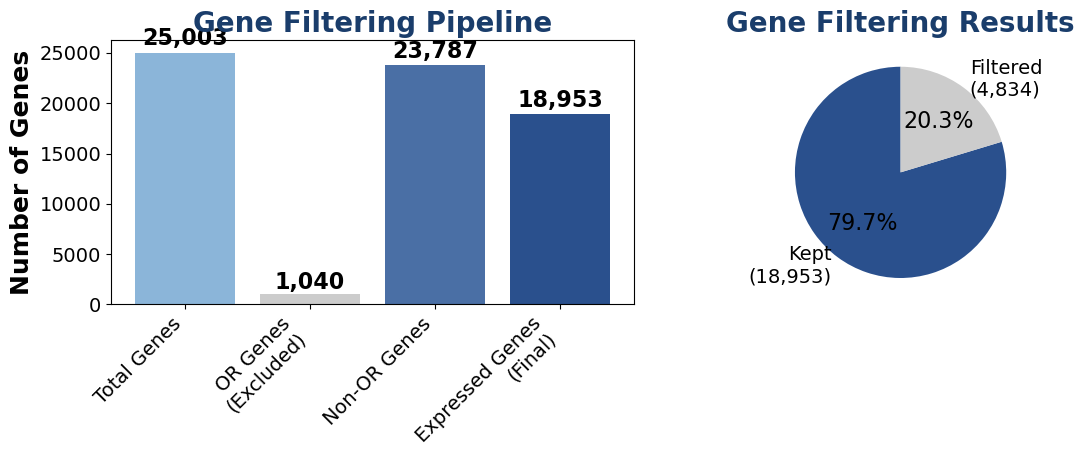

In [52]:
# ============================================================================
# AFTER STEP 4: GENE FILTERING
# ============================================================================
print("\n📊 Visualizing Step 4: Gene Filtering")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gene filtering pipeline
total_genes = len(adata_final.var_names)
or_genes_count = len([g for g in adata_final.var_names if g.startswith('Olfr')])
non_or_count = len(non_or_genes)
filtered_count = len(filtered_genes)

categories = ['Total Genes', 'OR Genes\n(Excluded)', 'Non-OR Genes', 'Expressed Genes\n(Final)']
values = [total_genes, or_genes_count, non_or_count, filtered_count]
colors = ['#8bb5d9', '#cccccc', '#4a6fa5', '#2a508d']

bars = ax1.bar(categories, values, color=colors)
ax1.set_title('Gene Filtering Pipeline', fontweight='bold', color='#1a3d6b')
ax1.set_ylabel('Number of Genes', fontweight='bold')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{val:,}', ha='center', va='bottom', fontweight='bold')

# Gene filtering efficiency
ax2.pie([filtered_count, non_or_count - filtered_count], 
        labels=[f'Kept\n({filtered_count:,})', f'Filtered\n({non_or_count - filtered_count:,})'],
        colors=['#2a508d', '#cccccc'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Gene Filtering Results', fontweight='bold', color='#1a3d6b')

plt.tight_layout()
plt.show()

In [57]:
# Get raw counts matrix for OR genes
or_counts = adata_final[:, or_genes].layers['counts'].toarray()
or_counts
print("Using raw counts from 'counts' layer")

print(or_counts.shape)  # (n_cells, n_or_genes) e.g., (5000, 1000)
print(type(or_counts))  # numpy.ndarray
print(or_counts.dtype)  # int32 or int64
#unique
print(np.unique(or_counts))
# Example values
print(or_counts[0, :200])  # First cell, first 5 OR genes: [0, 0, 23, 0, 1]
print(or_counts[1, :200])  # Second cell: [5, 0, 0, 0, 0]
print(or_counts[10, :200])  # Third cell: [0, 12, 0, 1, 0]

Using raw counts from 'counts' layer
(27992, 1040)
<class 'numpy.ndarray'>
float32
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180.

In [60]:
# ============================================================================
# STEP 5: CREATE EXPRESSION VECTORS WITH TPT NORMALIZATION - MULTI-TIMEPOINT
# ============================================================================
print("\n📈 STEP 5: Creating expression vectors with TPT normalization (Multi-timepoint)")
print("-" * 70)

# Get unique receptors and timepoints
receptors = adata_final.obs['dominant_receptor'].unique()
timepoints = ['Day 0', 'Day 2', 'Day 5', 'Day 8', 'Day 14']  # Updated timepoints

# Precompute indices for efficiency
print("Precomputing indices...")
timepoint_indices = {
    tp: np.where(adata_final.obs['timepoint'] == tp)[0] 
    for tp in timepoints
}

receptor_indices = {
    receptor: np.where(adata_final.obs['dominant_receptor'] == receptor)[0]
    for receptor in receptors
}

# Precompute TPT normalization
print("Computing TPT normalization...")
# Get raw counts matrix 
raw_counts = adata_final.layers['counts']

# Calculate total counts per cell (sum across genes for each cell)

if hasattr(raw_counts, 'toarray'):
    # For sparse matrices, sum along axis=1 returns a matrix, flatten it
    total_counts_per_cell = np.array(raw_counts.sum(axis=1)).flatten()
else:
    total_counts_per_cell = raw_counts.sum(axis=1)

print(f"TPT normalization setup completed. Matrix shape: {raw_counts.shape}")
print(f"Working with sparse matrix format: {type(raw_counts)}")

# Create expression vectors for all timepoints
expression_vectors_multi = {}
for i, gene in enumerate(filtered_genes):
    if i % 100 == 0:
        print(f"Processing gene {i}/{len(filtered_genes)}: {gene}")
    
    gene_idx = np.where(adata_final.var_names == gene)[0][0]
    vectors = {tp: [] for tp in timepoints}  # Initialize all timepoints

    for receptor in receptors:
        for tp in timepoints:
            # Find intersection of timepoint and receptor indices
            tp_cells = timepoint_indices[tp]
            receptor_cells = receptor_indices[receptor]
            cell_indices = np.intersect1d(tp_cells, receptor_cells)
            
            if len(cell_indices) > 0:
                # Extract raw counts for specific cells and gene (sparse-friendly)
                raw_expr_vals = raw_counts[cell_indices, gene_idx]
                
                # Convert to dense only for the small subset we need
                if hasattr(raw_expr_vals, 'toarray'):
                    raw_expr_vals = raw_expr_vals.toarray().flatten()
                
                # Get total counts for these specific cells
                cell_totals = total_counts_per_cell[cell_indices]
                
                # Apply TPT normalization: (raw counts / total counts) * 10,000
                # Handle division by zero
                tpt_expr_vals = np.where(cell_totals > 0, 
                                       (raw_expr_vals / cell_totals) * 10000, 
                                       0)
                
                mean_expr = tpt_expr_vals.mean()
            else:
                mean_expr = 0
                
            vectors[tp].append(mean_expr)
    
    expression_vectors_multi[gene] = vectors

print(f"Created TPT-normalized vectors for {len(expression_vectors_multi)} genes across {len(timepoints)} timepoints")






📈 STEP 5: Creating expression vectors with TPT normalization (Multi-timepoint)
----------------------------------------------------------------------
Precomputing indices...
Computing TPT normalization...
TPT normalization setup completed. Matrix shape: (26002, 25003)
Working with sparse matrix format: <class 'scipy.sparse._csc.csc_matrix'>
Processing gene 0/18953: Xkr4
Processing gene 100/18953: Fam168b
Processing gene 200/18953: Gm28826
Processing gene 300/18953: Mdh1b
Processing gene 400/18953: Farsb
Processing gene 500/18953: Hes6
Processing gene 600/18953: Actr3
Processing gene 700/18953: Timm17a
Processing gene 800/18953: Tor1aip1
Processing gene 900/18953: Rgs4
Processing gene 1000/18953: Kmo
Processing gene 1100/18953: Kctd3
Processing gene 1200/18953: Taf3
Processing gene 1300/18953: Clic3
Processing gene 1400/18953: Urm1
Processing gene 1500/18953: C79798
Processing gene 1600/18953: Dapl1
Processing gene 1700/18953: Ttc30a1
Processing gene 1800/18953: Chst1
Processing gene 1

In [91]:
# ============================================================================
# MULTI-TIMEPOINT STATISTICAL TESTING
# ============================================================================

def perform_timepoint_comparison(expression_vectors, day0_key, comparison_day_key, comparison_name):
    """
    Perform statistical comparison between Day 0 and a specific timepoint
    """
    print(f"\n📊 STATISTICAL TESTING: Day 0 vs {comparison_name}")
    print("-" * 50)
    
    from scipy.stats import mannwhitneyu
    import numpy as np
    
    results = []
    for gene, vectors in expression_vectors.items():
        day0_vec = np.array(vectors[day0_key])
        comparison_vec = np.array(vectors[comparison_day_key])
        
        # Remove subtypes with no expression in both timepoints
        valid_day0 = day0_vec > 0
        valid_comparison = comparison_vec > 0
        
        if valid_day0.sum() < 3 or valid_comparison.sum() < 3:
            continue
        
        try:
            # Use Mann-Whitney U test for independent samples
            stat, pval = mannwhitneyu(
                day0_vec[valid_day0], 
                comparison_vec[valid_comparison],
                alternative='two-sided'
            )
            
            # Calculate proper fold change
            day0_mean = day0_vec[valid_day0].mean()
            comparison_mean = comparison_vec[valid_comparison].mean()
            
            # Fold change with pseudocount
            pseudocount = 0.01
            fold_change = (comparison_mean + pseudocount) / (day0_mean + pseudocount)
            log2_fold_change = np.log2(fold_change)
            
            # Effect size (difference)
            difference = comparison_mean - day0_mean
            
            results.append({
                'gene': gene,
                'comparison': comparison_name,
                'statistic': stat,
                'p_value': pval,
                'day0_mean': day0_mean,
                f'{comparison_day_key.lower().replace(" ", "_")}_mean': comparison_mean,
                'fold_change': fold_change,
                'log2_fold_change': log2_fold_change,
                'difference': difference,
                'n_day0': valid_day0.sum(),
                f'n_{comparison_day_key.lower().replace(" ", "_")}': valid_comparison.sum()
            })
        except Exception as e:
            print(f"Failed for {gene}: {e}")
            continue
    
    print(f"✅ Tests completed for {len(results)} genes")
    return results
# Perform all timepoint comparisons
all_comparisons = {}
comparison_configs = [
    ('Day 0', 'Day 2', 'Day 0 vs Day 2'),
    ('Day 0', 'Day 5', 'Day 0 vs Day 5'),
    ('Day 0', 'Day 8', 'Day 0 vs Day 8'),
    ('Day 0', 'Day 14', 'Day 0 vs Day 14')
]

for day0_key, comp_day_key, comp_name in comparison_configs:
    results = perform_timepoint_comparison(expression_vectors_multi, day0_key, comp_day_key, comp_name)
    all_comparisons[comp_name] = results

# ============================================================================
# FDR CORRECTION AND SIGNIFICANCE ANALYSIS FOR ALL COMPARISONS
# ============================================================================

from statsmodels.stats.multitest import fdrcorrection
import pandas as pd

def process_comparison_results(results, comparison_name):
    """
    Process results for a single comparison with FDR correction
    """
    print(f"\n🔍 PROCESSING: {comparison_name}")
    print("-" * 40)
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    if len(results_df) == 0:
        print(f"⚠️ No results for {comparison_name}")
        return pd.DataFrame()
    
    # Apply FDR correction
    results_df['fdr'] = fdrcorrection(results_df['p_value'])[1]
    
    # Add regulation direction
    results_df['regulation'] = results_df['fold_change'].apply(
        lambda x: 'up' if x > 1 else 'down'
    )
    
    # Filter significant results (FDR < 0.05)
    sig_results = results_df[results_df['fdr'] < 0.005]
    
    # Bonferroni correction
    bonferroni_threshold = 0.05 / len(results_df)
    bonferroni_sig = results_df[results_df['p_value'] < bonferroni_threshold]
    
    print(f"📊 SIGNIFICANT RESULTS SUMMARY:")
    print(f"Total genes tested: {len(results_df)}")
    print(f"Significant genes (FDR < 0.05): {len(sig_results)}")
    print(f"  Up-regulated: {len(sig_results[sig_results['regulation'] == 'up'])}")
    print(f"  Down-regulated: {len(sig_results[sig_results['regulation'] == 'down'])}")
    print(f"Bonferroni significant (p < {bonferroni_threshold:.2e}): {len(bonferroni_sig)}")
    
    if len(sig_results) > 0:
        print(f"Top 10 significant genes:")
        print(sig_results.sort_values('fdr').head(10)[['gene', 'fdr', 'fold_change', 'regulation']])
    
    return results_df, sig_results

# Process all comparisons
processed_results = {}
significant_results = {}

for comp_name, results in all_comparisons.items():
    results_df, sig_results = process_comparison_results(results, comp_name)
    processed_results[comp_name] = results_df
    significant_results[comp_name] = sig_results

# ============================================================================
# VISUALIZATION FOR ALL COMPARISONS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

def create_volcano_plot(results_df, sig_results, comparison_name):
    """
    Create volcano plot for a specific comparison
    """
    if len(results_df) == 0:
        return None
    
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")
    
    # Create volcano plot data
    results_df['-log10_p'] = -np.log10(results_df['p_value'])
    results_df['log2_fc'] = np.log2(results_df['fold_change'])
    results_df['significance'] = results_df['fdr'] < 0.05
    
    # Plot
    ax = sns.scatterplot(
        x='log2_fc',
        y='-log10_p',
        hue='significance',
        palette={True: 'red', False: 'gray'},
        alpha=0.7,
        data=results_df
    )
    
    # Highlight top genes
    if len(sig_results) > 0:
        top_genes = sig_results.nsmallest(5, 'fdr')
        for _, row in top_genes.iterrows():
            ax.text(
                np.log2(row['fold_change']), 
                -np.log10(row['p_value']), 
                row['gene'],
                fontsize=9,
                ha='center'
            )
    
    # Formatting
    plt.axvline(0, color='black', linestyle='--', alpha=0.3)
    plt.title(f'Volcano Plot: {comparison_name}', fontsize=14)
    plt.xlabel('log2(Fold Change)', fontsize=12)
    plt.ylabel('-log10(p-value)', fontsize=12)
    plt.legend(title='FDR < 0.05', loc='upper right')
    plt.tight_layout()
    return plt.gcf()

def create_comparison_summary_plot():
    """
    Create summary plot comparing all timepoints
    """
    # Count significant genes for each comparison
    sig_counts = []
    up_counts = []
    down_counts = []
    timepoint_names = []
    
    for comp_name, sig_df in significant_results.items():
        if len(sig_df) > 0:
            timepoint_names.append(comp_name.split(' vs ')[-1])
            sig_counts.append(len(sig_df))
            up_counts.append(len(sig_df[sig_df['regulation'] == 'up']))
            down_counts.append(len(sig_df[sig_df['regulation'] == 'down']))
        else:
            timepoint_names.append(comp_name.split(' vs ')[-1])
            sig_counts.append(0)
            up_counts.append(0)
            down_counts.append(0)
    
    # Create stacked bar plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot 1: Total significant genes
    ax1.bar(timepoint_names, sig_counts, color='steelblue', alpha=0.7)
    ax1.set_title('Total Significant Genes by Timepoint')
    ax1.set_xlabel('Timepoint')
    ax1.set_ylabel('Number of Significant Genes')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Up vs Down regulation
    width = 0.35
    x = np.arange(len(timepoint_names))
    ax2.bar(x - width/2, up_counts, width, label='Up-regulated', color='red', alpha=0.7)
    ax2.bar(x + width/2, down_counts, width, label='Down-regulated', color='blue', alpha=0.7)
    ax2.set_title('Regulation Direction by Timepoint')
    ax2.set_xlabel('Timepoint')
    ax2.set_ylabel('Number of Genes')
    ax2.set_xticks(x)
    ax2.set_xticklabels(timepoint_names, rotation=45)
    ax2.legend()
    
    plt.tight_layout()
    return fig






📊 STATISTICAL TESTING: Day 0 vs Day 0 vs Day 2
--------------------------------------------------
✅ Tests completed for 14224 genes

📊 STATISTICAL TESTING: Day 0 vs Day 0 vs Day 5
--------------------------------------------------
✅ Tests completed for 14450 genes

📊 STATISTICAL TESTING: Day 0 vs Day 0 vs Day 8
--------------------------------------------------
✅ Tests completed for 13971 genes

📊 STATISTICAL TESTING: Day 0 vs Day 0 vs Day 14
--------------------------------------------------
✅ Tests completed for 13886 genes

🔍 PROCESSING: Day 0 vs Day 2
----------------------------------------
📊 SIGNIFICANT RESULTS SUMMARY:
Total genes tested: 14224
Significant genes (FDR < 0.05): 4341
  Up-regulated: 572
  Down-regulated: 3769
Bonferroni significant (p < 3.52e-06): 1351
Top 10 significant genes:
          gene           fdr  fold_change regulation
12555  Gm42418  4.053591e-97     2.181179         up
8711       Ubb  5.735059e-96     0.736604       down
14213  mt-Atp6  1.942558e-94  


ANALYZING MOST SIGNIFICANT GENES ACROSS TIMEPOINTS
🚀 Starting Most Significant Genes Analysis
🔍 Identifying most significant genes using UNION approach...
   Taking top 100 genes from each timepoint, then union
   Day 0 vs Day 2: 100 genes added to union
   Day 0 vs Day 5: 100 genes added to union
   Day 0 vs Day 8: 100 genes added to union
   Day 0 vs Day 14: 100 genes added to union

📊 UNION GENE SELECTION SUMMARY:
   Total unique genes in union: 218
   Genes by timepoint presence:
     4 timepoints: 218 genes

📊 TIMEPOINT CONTRIBUTIONS:
   Day 0 vs Day 2: 100 genes
   Day 0 vs Day 5: 100 genes
   Day 0 vs Day 8: 100 genes
   Day 0 vs Day 14: 100 genes

🎯 OVERLAP ANALYSIS:
   Genes in ALL timepoints: 14
   Genes unique to single timepoint: 111
   Total union genes: 218
✅ Union-based gene selection complete!
🔬 Creating comprehensive genes heatmap...

MOST SIGNIFICANT GENES DETAILED ANALYSIS

🧬 TOP 218 MOST SIGNIFICANT GENES:

📈 CONSISTENTLY UP-REGULATED (15):
   Lars2: 0.84 → 0.84 → 

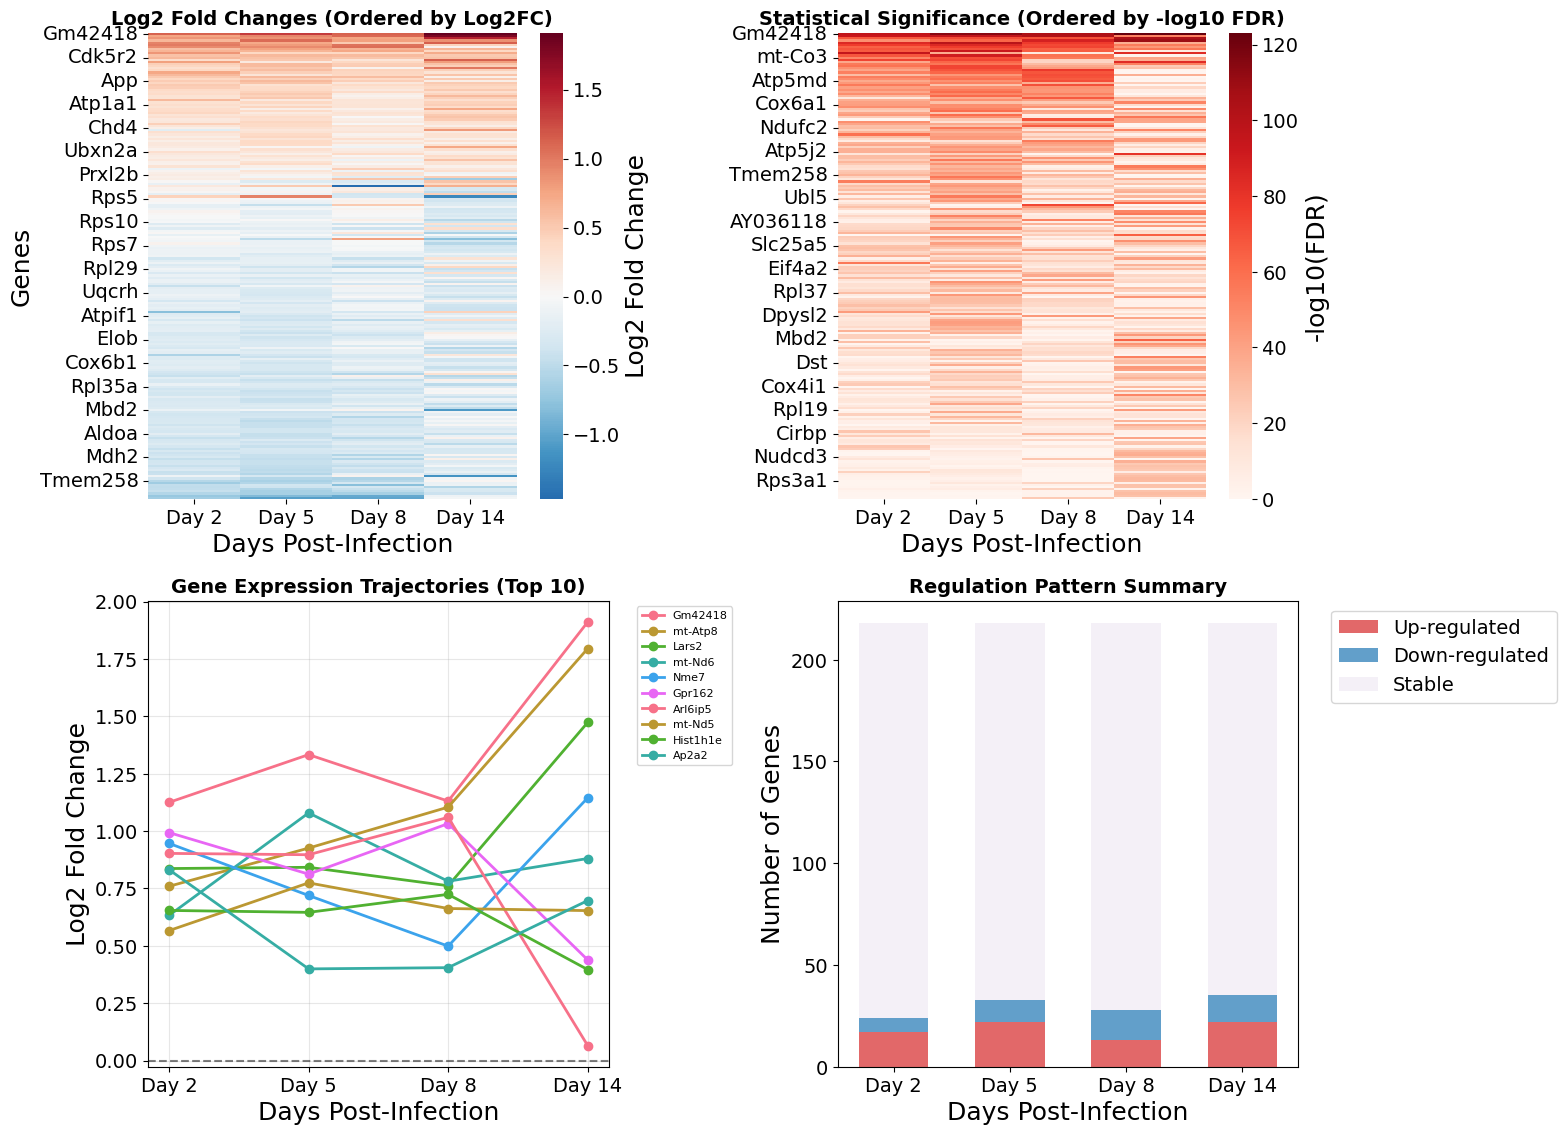


✅ Significant genes analysis complete!
📊 Key data structures created:
   - genes_analysis_results['top_genes']: List of most significant genes
   - genes_analysis_results['log2_fold_change_df']: Log2FC matrix for heatmap
   - genes_analysis_results['significance_df']: Significance scores matrix
   - genes_analysis_results['heatmap_figure']: Main visualization

💾 Log2 fold change data saved to 'top_significant_genes_log2fc.csv'


In [184]:
# ============================================================================
# MOST SIGNIFICANT GENES HEATMAP ANALYSIS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def identify_most_significant_genes(processed_results, top_n=20):
    """
    Identify the most significant genes across all timepoints
    """
    print("🔍 Identifying most significant genes across timepoints...")
    
    # Collect all significant genes with their significance scores
    gene_significance = {}
    
    for comp_name, results_df in processed_results.items():
        if len(results_df) == 0:
            continue
            
        # For each gene, store its -log10(FDR) as significance score
        for _, row in results_df.iterrows():
            gene = row['gene']
            significance = -np.log10(row['fdr'] + 1e-300)  # Add small value to avoid inf
            
            if gene not in gene_significance:
                gene_significance[gene] = {}
            
            gene_significance[gene][comp_name] = {
                'significance': significance,
                'fold_change': row['fold_change'],
                'log2_fold_change': np.log2(row['fold_change']),
                'regulation': row['regulation']
            }
    
    # Calculate average significance across timepoints
    gene_avg_significance = {}
    for gene, timepoints in gene_significance.items():
        # Only consider genes present in multiple timepoints
        if len(timepoints) >= 2:
            avg_sig = np.mean([tp['significance'] for tp in timepoints.values()])
            gene_avg_significance[gene] = avg_sig
    
    # Get top genes
    top_genes = sorted(gene_avg_significance.items(), key=lambda x: x[1], reverse=True)[:top_n]
    top_gene_names = [gene for gene, _ in top_genes]
    
    print(f"✅ Identified top {len(top_gene_names)} most significant genes")
    return top_gene_names, gene_significance

def identify_most_significant_genes_union(processed_results, top_n_per_timepoint=50):
    """
    Identify the most significant genes by taking UNION of top genes from each timepoint
    
    Parameters:
    -----------
    processed_results : dict
        Statistical results for each timepoint comparison
    top_n_per_timepoint : int
        Number of top genes to take from each timepoint before union
    
    Returns:
    --------
    tuple : (top_gene_names, gene_significance)
        - top_gene_names: list of unique genes from union
        - gene_significance: dict with gene data across timepoints
    """
    print(f"🔍 Identifying most significant genes using UNION approach...")
    print(f"   Taking top {top_n_per_timepoint} genes from each timepoint, then union")
    
    # Step 1: Get top N genes from each timepoint
    union_genes = set()
    timepoint_contributions = {}
    
    for comp_name, results_df in processed_results.items():
        if len(results_df) == 0:
            print(f"   ⚠️ No results for {comp_name}")
            continue
        
        # Sort by FDR (most significant first) and take top N
        top_genes_this_timepoint = results_df.nsmallest(top_n_per_timepoint, 'fdr')
        genes_this_timepoint = set(top_genes_this_timepoint['gene'].tolist())
        
        # Add to union
        union_genes.update(genes_this_timepoint)
        timepoint_contributions[comp_name] = genes_this_timepoint
        
        print(f"   {comp_name}: {len(genes_this_timepoint)} genes added to union")
    
    # Step 2: Collect significance data for all union genes
    gene_significance = {}
    
    for comp_name, results_df in processed_results.items():
        if len(results_df) == 0:
            continue
            
        # For each gene in union, get its data from this timepoint
        for gene in union_genes:
            gene_data = results_df[results_df['gene'] == gene]
            
            if len(gene_data) > 0:
                # Gene is significant in this timepoint
                row = gene_data.iloc[0]
                significance = -np.log10(row['fdr'] + 1e-300)
                
                if gene not in gene_significance:
                    gene_significance[gene] = {}
                
                gene_significance[gene][comp_name] = {
                    'significance': significance,
                    'fold_change': row['fold_change'],
                    'log2_fold_change': np.log2(row['fold_change']),
                    'regulation': row['regulation'],
                    'fdr': row['fdr']
                }
            # If gene not found in this timepoint, we don't add data for it
    
    # Step 3: Convert union set to list
    top_gene_names = list(union_genes)
    
    # Step 4: Print summary statistics
    print(f"\n📊 UNION GENE SELECTION SUMMARY:")
    print(f"   Total unique genes in union: {len(top_gene_names)}")
    
    # Count how many timepoints each gene appears in
    gene_timepoint_counts = {}
    for gene in top_gene_names:
        if gene in gene_significance:
            count = len(gene_significance[gene])
            gene_timepoint_counts[gene] = count
    
    # Distribution of genes by timepoint presence
    timepoint_distribution = {}
    for gene, count in gene_timepoint_counts.items():
        timepoint_distribution[count] = timepoint_distribution.get(count, 0) + 1
    
    print(f"   Genes by timepoint presence:")
    for timepoints, gene_count in sorted(timepoint_distribution.items(), reverse=True):
        print(f"     {timepoints} timepoints: {gene_count} genes")
    
    # Show timepoint contributions
    print(f"\n📊 TIMEPOINT CONTRIBUTIONS:")
    for comp_name, genes_set in timepoint_contributions.items():
        print(f"   {comp_name}: {len(genes_set)} genes")
    
    # Calculate overlap statistics
    if len(timepoint_contributions) > 1:
        all_timepoint_sets = list(timepoint_contributions.values())
        
        # Genes in ALL timepoints
        intersection_all = set.intersection(*all_timepoint_sets)
        print(f"\n🎯 OVERLAP ANALYSIS:")
        print(f"   Genes in ALL timepoints: {len(intersection_all)}")
        
        # Genes in only one timepoint
        union_all = set.union(*all_timepoint_sets)
        unique_genes = 0
        for tp_genes in all_timepoint_sets:
            others = [other for other in all_timepoint_sets if other != tp_genes]
            if others:
                others_union = set.union(*others)
                unique_to_this = tp_genes - others_union
                unique_genes += len(unique_to_this)
        
        print(f"   Genes unique to single timepoint: {unique_genes}")
        print(f"   Total union genes: {len(union_all)}")
    
    print(f"✅ Union-based gene selection complete!")
    return top_gene_names, gene_significance

def create_comprehensive_genes_heatmap(processed_results, top_gene_names, gene_significance):
    """
    Create comprehensive heatmap showing gene changes across timepoints
    """
    print("🔬 Creating comprehensive genes heatmap...")
    
    # Prepare data for heatmap
    timepoint_order = ['Day 0 vs Day 2', 'Day 0 vs Day 5', 'Day 0 vs Day 8', 'Day 0 vs Day 14']
    timepoint_labels = ['Day 2', 'Day 5', 'Day 8', 'Day 14']
    
    # Create matrices for different visualizations
    fold_change_matrix = []
    log2_fc_matrix = []
    significance_matrix = []
    
    for gene in top_gene_names:
        fc_row = []
        log2_row = []
        sig_row = []
        
        for comp_name in timepoint_order:
            if gene in gene_significance and comp_name in gene_significance[gene]:
                data = gene_significance[gene][comp_name]
                fc_row.append(data['fold_change'])
                log2_row.append(data['log2_fold_change'])
                sig_row.append(data['significance'])
            else:
                fc_row.append(1.0)  # No change
                log2_row.append(0.0)  # No change
                sig_row.append(0.0)  # Not significant
        
        fold_change_matrix.append(fc_row)
        log2_fc_matrix.append(log2_row)
        significance_matrix.append(sig_row)
    
    # Convert to DataFrames
    fc_df = pd.DataFrame(fold_change_matrix, index=top_gene_names, columns=timepoint_labels)
    log2_df = pd.DataFrame(log2_fc_matrix, index=top_gene_names, columns=timepoint_labels)
    sig_df = pd.DataFrame(significance_matrix, index=top_gene_names, columns=timepoint_labels)
    
    # ORDER GENES FOR EACH HEATMAP
    # For log2 fold change heatmap: order by average log2 fold change
    log2_avg = log2_df.mean(axis=1)
    log2_ordered_genes = log2_avg.sort_values(ascending=False).index.tolist()
    log2_df_ordered = log2_df.loc[log2_ordered_genes]
    
    # For significance heatmap: order by average significance
    sig_avg = sig_df.mean(axis=1)
    sig_ordered_genes = sig_avg.sort_values(ascending=False).index.tolist()
    sig_df_ordered = sig_df.loc[sig_ordered_genes]
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Log2 Fold Change Heatmap (ordered by log2 fold change)
    ax1 = axes[0, 0]
    sns.heatmap(log2_df_ordered, cmap='RdBu_r', center=0, 
                annot=False, fmt='.2f', 
                cbar_kws={'label': 'Log2 Fold Change'},
                ax=ax1)
    ax1.set_title('Log2 Fold Changes (Ordered by Log2FC)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Days Post-Infection')
    ax1.set_ylabel('Genes')
    
    # 2. Significance Heatmap (ordered by significance)
    ax2 = axes[0, 1]
    sns.heatmap(sig_df_ordered, cmap='Reds', 
                annot=False, fmt='.1f',
                cbar_kws={'label': '-log10(FDR)'},
                ax=ax2)
    ax2.set_title('Statistical Significance (Ordered by -log10 FDR)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Days Post-Infection')
    ax2.set_ylabel('')
    
    # 3. Gene trajectory plot (using log2 ordered genes for top 10)
    ax3 = axes[1, 0]
    for i, gene in enumerate(log2_ordered_genes[:10]):  # Top 10 for clarity
        log2_values = log2_df.loc[gene].values
        ax3.plot(range(len(timepoint_labels)), log2_values, 'o-', 
                label=gene, linewidth=2, markersize=6)
    
    ax3.set_xlabel('Days Post-Infection')
    ax3.set_ylabel('Log2 Fold Change')
    ax3.set_title('Gene Expression Trajectories (Top 10)', fontsize=14, fontweight='bold')
    ax3.set_xticks(range(len(timepoint_labels)))
    ax3.set_xticklabels(timepoint_labels)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax3.grid(True, alpha=0.3)
    
    # 4. Regulation pattern summary (using original ordering)
    ax4 = axes[1, 1]
    
    # Count up/down regulation per timepoint
    regulation_counts = {'Up': [], 'Down': [], 'Stable': []}
    
    for col in timepoint_labels:
        up_count = len(log2_df[log2_df[col] > 0.5])  # >1.4 fold change
        down_count = len(log2_df[log2_df[col] < -0.5])  # <0.7 fold change
        
        stable_count = len(log2_df[(log2_df[col] >= -0.5) & (log2_df[col] <= 0.5)])
        
        regulation_counts['Up'].append(up_count)
        regulation_counts['Down'].append(down_count)
        regulation_counts['Stable'].append(stable_count)
    
    x = np.arange(len(timepoint_labels))
    width = 0.6
    
    ax4.bar(x, regulation_counts['Up'], width, label='Up-regulated', color='#d62829', alpha=0.7)
    ax4.bar(x, regulation_counts['Down'], width, bottom=regulation_counts['Up'], 
            label='Down-regulated', color='#1f77b4', alpha=0.7)
    ax4.bar(x, regulation_counts['Stable'], width, 
            bottom=np.array(regulation_counts['Up']) + np.array(regulation_counts['Down']),
            label='Stable', color='#f0ebf4', alpha=0.7)
    
    ax4.set_xlabel('Days Post-Infection')
    ax4.set_ylabel('Number of Genes')
    ax4.set_title('Regulation Pattern Summary', fontsize=14, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(timepoint_labels)
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    
    return fig, fc_df, log2_df, sig_df

def print_gene_analysis_summary(top_gene_names, gene_significance, log2_df):
    """
    Print detailed analysis of top genes
    """
    print("\n" + "="*80)
    print("MOST SIGNIFICANT GENES DETAILED ANALYSIS")
    print("="*80)
    
    print(f"\n🧬 TOP {len(top_gene_names)} MOST SIGNIFICANT GENES:")
    
    # Group genes by pattern
    upregulated_genes = []
    downregulated_genes = []
    mixed_pattern_genes = []
    
    for gene in top_gene_names:
        trajectory = log2_df.loc[gene].values
        
        if np.mean(trajectory) > 0.5:
            upregulated_genes.append(gene)
        elif np.mean(trajectory) < -0.5:
            downregulated_genes.append(gene)
        else:
            mixed_pattern_genes.append(gene)
    
    print(f"\n📈 CONSISTENTLY UP-REGULATED ({len(upregulated_genes)}):")
    for gene in upregulated_genes[:10]:  # Top 10
        trajectory = log2_df.loc[gene].values
        print(f"   {gene}: {trajectory[0]:.2f} → {trajectory[1]:.2f} → {trajectory[2]:.2f} → {trajectory[3]:.2f}")
    
    print(f"\n📉 CONSISTENTLY DOWN-REGULATED ({len(downregulated_genes)}):")
    for gene in downregulated_genes[:10]:  # Top 10
        trajectory = log2_df.loc[gene].values
        print(f"   {gene}: {trajectory[0]:.2f} → {trajectory[1]:.2f} → {trajectory[2]:.2f} → {trajectory[3]:.2f}")
    
    print(f"\n🔄 MIXED PATTERNS ({len(mixed_pattern_genes)}):")
    for gene in mixed_pattern_genes[:10]:  # Top 10
        trajectory = log2_df.loc[gene].values
        print(f"   {gene}: {trajectory[0]:.2f} → {trajectory[1]:.2f} → {trajectory[2]:.2f} → {trajectory[3]:.2f}")
    
    # Identify key patterns
    print(f"\n🎯 KEY PATTERNS IDENTIFIED:")
    
    # Find genes with strongest Day 14 response
    day14_responders = log2_df.sort_values('Day 14', ascending=False).head(5)
    print(f"\n   STRONGEST DAY 14 UP-REGULATION:")
    for gene in day14_responders.index:
        day14_fc = day14_responders.loc[gene, 'Day 14']
        print(f"     {gene}: {day14_fc:.2f} log2FC (Day 14)")
    
    # Find genes with early response
    day2_responders = log2_df.sort_values('Day 2', key=abs, ascending=False).head(5)
    print(f"\n   STRONGEST DAY 2 RESPONSE:")
    for gene in day2_responders.index:
        day2_fc = day2_responders.loc[gene, 'Day 2']
        print(f"     {gene}: {day2_fc:.2f} log2FC (Day 2)")
    
    # Progressive genes (increasing over time)
    progressive_genes = []
    for gene in top_gene_names:
        trajectory = log2_df.loc[gene].values
        if len(trajectory) >= 4:
            # Check if generally increasing
            trend = np.polyfit(range(len(trajectory)), trajectory, 1)[0]
            if trend > 0.2:  # Positive trend
                progressive_genes.append((gene, trend))
    
    progressive_genes.sort(key=lambda x: x[1], reverse=True)
    print(f"\n   PROGRESSIVE GENES (Increasing Over Time):")
    for gene, trend in progressive_genes[:5]:
        print(f"     {gene}: trend = {trend:.3f}")

# ============================================================================
# EXECUTE ANALYSIS
# ============================================================================

def run_significant_genes_analysis(processed_results):
    """
    Main function to run the complete significant genes analysis
    """
    print("🚀 Starting Most Significant Genes Analysis")
    print("="*60)
    
    # Step 1: Identify most significant genes
    top_gene_names, gene_significance = identify_most_significant_genes_union(processed_results, top_n_per_timepoint=100)
    
    # Step 2: Create comprehensive heatmap
    heatmap_fig, fc_df, log2_df, sig_df = create_comprehensive_genes_heatmap(
        processed_results, top_gene_names, gene_significance
    )
    
    # Step 3: Print detailed analysis
    print_gene_analysis_summary(top_gene_names, gene_significance, log2_df)
    
    return {
        'top_genes': top_gene_names,
        'gene_significance': gene_significance,
        'fold_change_df': fc_df,
        'log2_fold_change_df': log2_df,
        'significance_df': sig_df,
        'heatmap_figure': heatmap_fig
    }

# Add this to your existing code after the summary section:

# ============================================================================
# MOST SIGNIFICANT GENES ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("ANALYZING MOST SIGNIFICANT GENES ACROSS TIMEPOINTS")
print("="*80)

# Run the significant genes analysis

genes_analysis_results = run_significant_genes_analysis(processed_results)

# Display the heatmap
plt.show()

# Save the results for further analysis
print(f"\n✅ Significant genes analysis complete!")
print(f"📊 Key data structures created:")
print(f"   - genes_analysis_results['top_genes']: List of most significant genes")
print(f"   - genes_analysis_results['log2_fold_change_df']: Log2FC matrix for heatmap")
print(f"   - genes_analysis_results['significance_df']: Significance scores matrix")
print(f"   - genes_analysis_results['heatmap_figure']: Main visualization")

# Optional: Save the fold change data to CSV for further analysis
log2_fc_df = genes_analysis_results['log2_fold_change_df']
log2_fc_df.to_csv('top_significant_genes_log2fc.csv')
print(f"\n💾 Log2 fold change data saved to 'top_significant_genes_log2fc.csv'")



# for gene in multi_timepoint_genes:
#     if gene in log2_fc_df.index:
#         trajectory = log2_fc_df.loc[gene].values
#         print(f"   {gene}: Day2={trajectory[0]:.2f} | Day5={trajectory[1]:.2f} | Day8={trajectory[2]:.2f} | Day14={trajectory[3]:.2f}")
#     else:
#         print(f"   {gene}: Not in top significant genes list")


FOLD CHANGE BASED HEATMAP - NON-HIERARCHICAL!
📋 Analysis approach:
   ✓ Use fold changes directly (not log2 for sorting)
   ✓ Sort genes by magnitude of change
   ✓ No hierarchical clustering
   ✓ Chronological timepoint order
🚀 Starting Fold Change Heatmap Analysis
📋 Strategy: Non-hierarchical heatmap based on fold changes
🔍 Getting union of top 100 genes from each timepoint...
   Day 0 vs Day 2: 100 genes added
   Day 0 vs Day 5: 100 genes added
   Day 0 vs Day 8: 100 genes added
   Day 0 vs Day 14: 100 genes added
✅ Total union of top genes: 218 unique genes
🔬 Creating fold change matrix...
✅ Fold change matrix created: 218 genes × 4 timepoints
🎨 Creating fold change heatmap...
📊 Sorting genes by fold change patterns...
✅ Genes sorted by fold change magnitude
📈 Creating summary statistics plots...

FOLD CHANGE ANALYSIS SUMMARY

📊 DATASET SUMMARY:
   Total genes analyzed: 218
   Timepoints: Day 2, Day 5, Day 8, Day 14, mean_abs_fc

📈 FOLD CHANGE STATISTICS:

   Day 2:
     • Mean fo

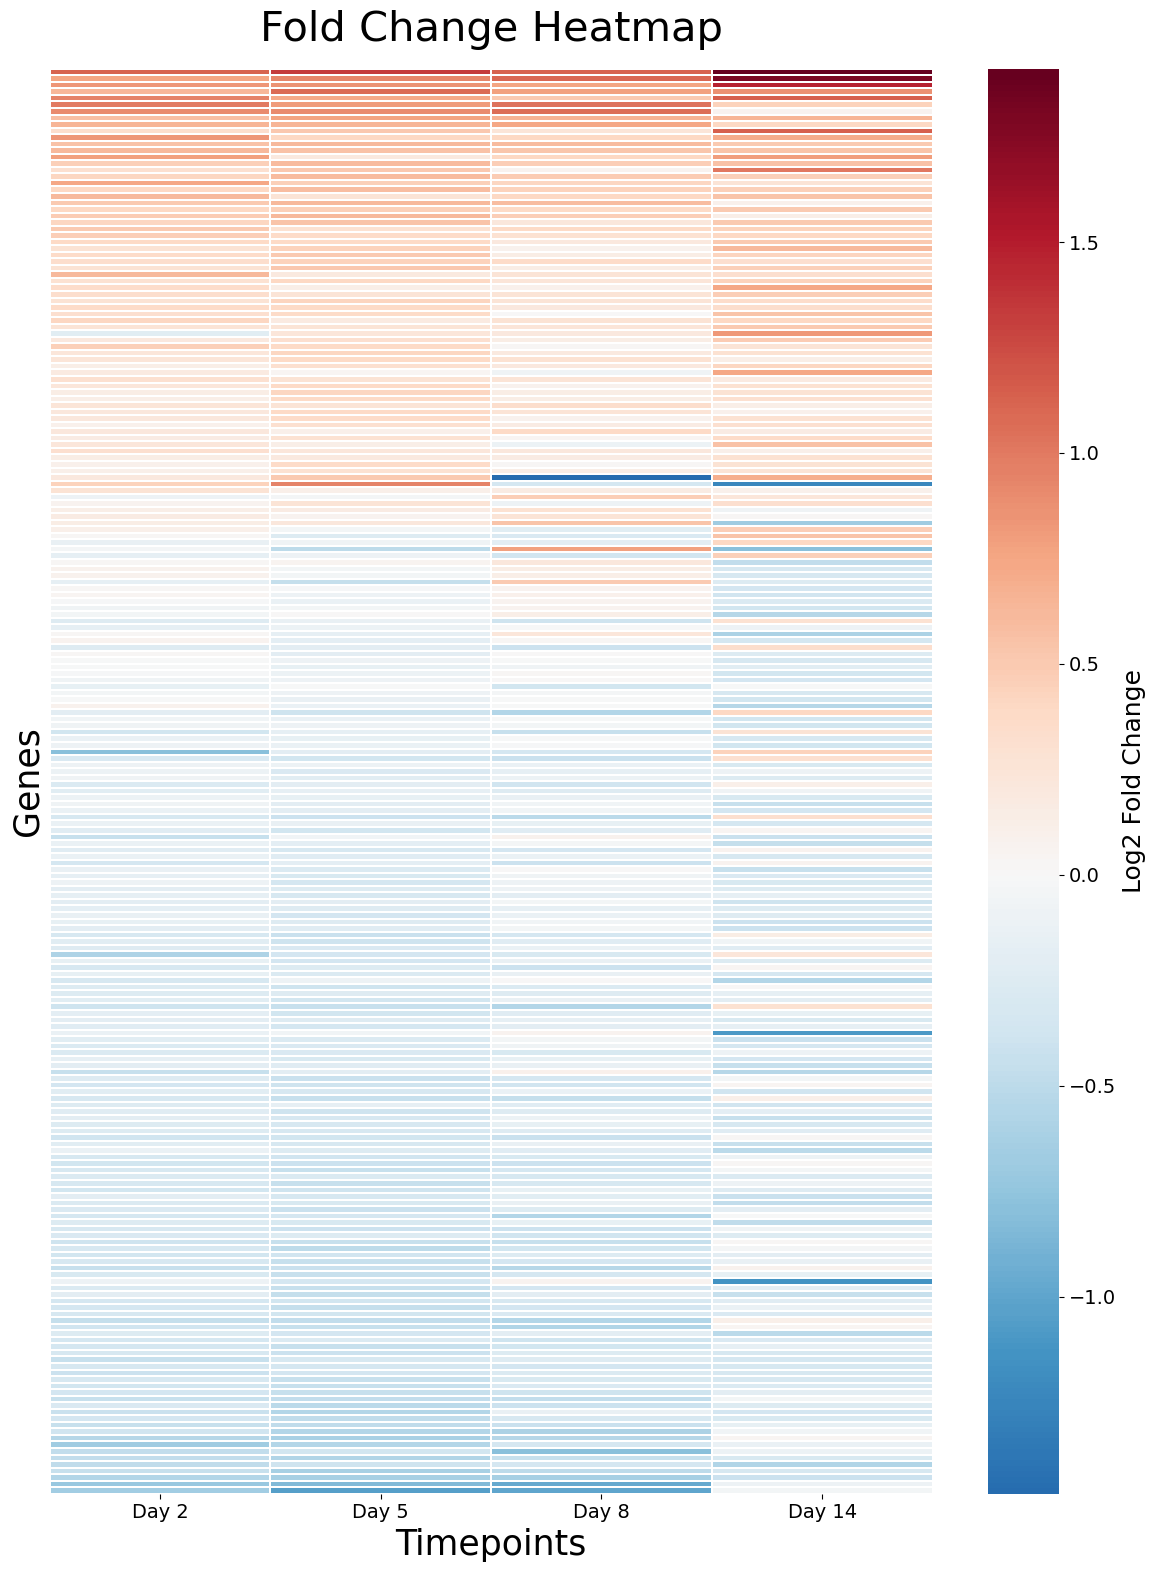

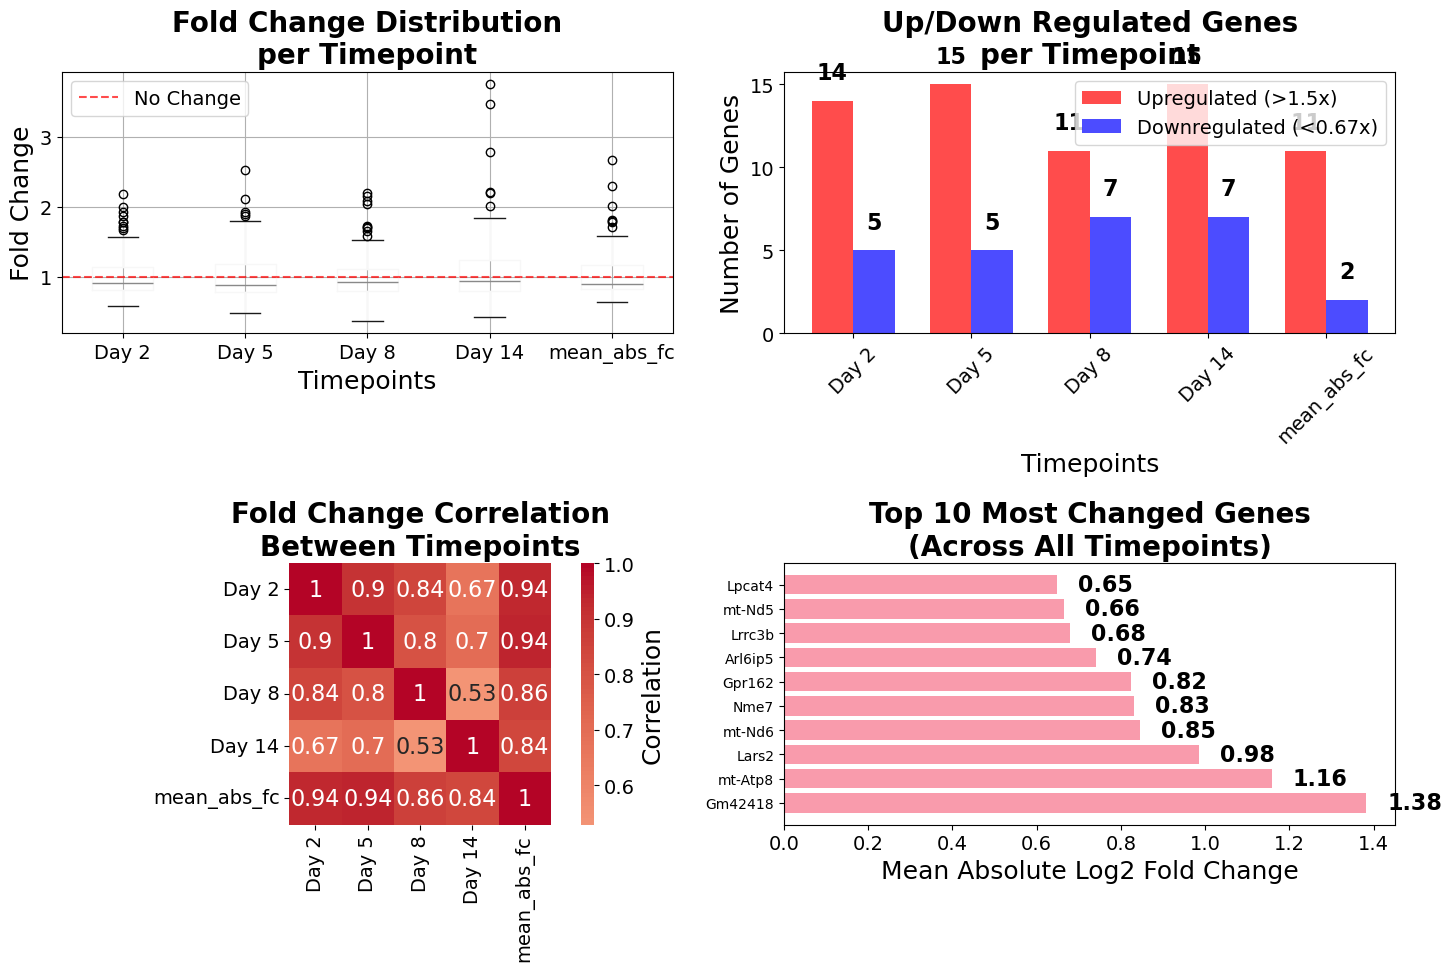


💾 Results available:
   • fold_change_results['heatmap_figure']: Main fold change heatmap
   • fold_change_results['summary_figure']: Summary statistics
   • fold_change_results['fold_change_matrix']: Raw fold change data
   • fold_change_results['sorted_matrix']: Genes sorted by change magnitude


In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def get_union_of_top_genes(significant_results, top_n_per_timepoint=50):
    """
    Get union of top significant genes from each timepoint comparison
    """
    print(f"🔍 Getting union of top {top_n_per_timepoint} genes from each timepoint...")
    
    all_top_genes = set()
    
    for comp_name, sig_df in significant_results.items():
        if len(sig_df) > 0:
            top_genes_this_timepoint = sig_df.nsmallest(top_n_per_timepoint, 'fdr')['gene'].tolist()
            all_top_genes.update(top_genes_this_timepoint)
            print(f"   {comp_name}: {len(top_genes_this_timepoint)} genes added")
    
    union_genes = list(all_top_genes)
    print(f"✅ Total union of top genes: {len(union_genes)} unique genes")
    return union_genes

def create_fold_change_matrix(processed_results, union_genes):
    """
    Create fold change matrix for the union of top genes
    """
    print("🔬 Creating fold change matrix...")
    
    timepoint_order = ['Day 0 vs Day 2', 'Day 0 vs Day 5', 'Day 0 vs Day 8', 'Day 0 vs Day 14']
    timepoint_labels = ['Day 2', 'Day 5', 'Day 8', 'Day 14']
    
    fold_change_data = []
    genes_found = []
    
    for gene in union_genes:
        gene_fold_changes = []
        gene_found = False
        
        for comp_name in timepoint_order:
            if comp_name in processed_results and len(processed_results[comp_name]) > 0:
                gene_data = processed_results[comp_name][processed_results[comp_name]['gene'] == gene]
                
                if len(gene_data) > 0:
                    fold_change = gene_data['fold_change'].iloc[0]
                    gene_fold_changes.append(fold_change)
                    gene_found = True
                else:
                    gene_fold_changes.append(1.0)  # No change if not found
            else:
                gene_fold_changes.append(1.0)
        
        if gene_found:
            fold_change_data.append(gene_fold_changes)
            genes_found.append(gene)
    
    fold_change_matrix = pd.DataFrame(
        fold_change_data,
        index=genes_found,
        columns=timepoint_labels
    )
    
    print(f"✅ Fold change matrix created: {fold_change_matrix.shape[0]} genes × {fold_change_matrix.shape[1]} timepoints")
    return fold_change_matrix

def sort_genes_by_fold_change_pattern(fold_change_matrix):
    """
    Sort genes based on fold change patterns (highest to lowest overall change)
    """
    print("📊 Sorting genes by fold change patterns...")
    
    # Calculate mean absolute fold change for sorting
    fold_change_matrix['mean_abs_fc'] = fold_change_matrix.abs().mean(axis=1)
    
    # Sort by mean absolute fold change (descending)
    sorted_matrix = fold_change_matrix.sort_values('mean_abs_fc', ascending=False)
    
    # Remove the temporary sorting column
    sorted_matrix = sorted_matrix.drop('mean_abs_fc', axis=1)
    
    print(f"✅ Genes sorted by fold change magnitude")
    return sorted_matrix

def create_fold_change_heatmap(fold_change_matrix, figsize=(12, 16)):
    """
    Create fold change heatmap without hierarchical clustering
    """
    print("🎨 Creating fold change heatmap...")
    
    # Sort genes by fold change pattern
    sorted_matrix = sort_genes_by_fold_change_pattern(fold_change_matrix)
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)
    
    # Convert fold changes to log2 scale for better visualization
    log2_matrix = np.log2(sorted_matrix)
    
    # Create heatmap
    im = sns.heatmap(
        log2_matrix,
        cmap='RdBu_r',
        center=0,
        cbar_kws={'label': 'Log2 Fold Change'},
        linewidths=0.1,
        annot_kws={
            'fontsize': 30,            # Make numbers larger
            'fontweight': 'bold',      # Make numbers bold
            'color': 'black'           # Ensure numbers are visible
        },
        ax=ax,
        xticklabels=True,
        yticklabels=True if len(sorted_matrix) <= 50 else False  # Show gene names only if <= 50 genes
    )
    
    # Customize the plot
    ax.set_title('Fold Change Heatmap', 
                fontsize=30, pad=20)
    ax.set_xlabel('Timepoints', fontsize=25,)
    ax.set_ylabel('Genes', fontsize=25,)
    
    
    # Adjust layout
    plt.tight_layout()
    
    return fig, sorted_matrix

def create_summary_statistics_plot(fold_change_matrix, figsize=(15, 10)):
    """
    Create summary statistics plots for fold changes
    """
    print("📈 Creating summary statistics plots...")
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    # Plot 1: Distribution of fold changes per timepoint
    ax1 = axes[0, 0]
    fold_change_matrix.boxplot(ax=ax1)
    ax1.set_title('Fold Change Distribution\nper Timepoint', fontweight='bold')
    ax1.set_ylabel('Fold Change')
    ax1.set_xlabel('Timepoints')
    ax1.tick_params(axis='x')
    ax1.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No Change')
    ax1.legend()
    
    # Plot 2: Number of up/down regulated genes per timepoint
    ax2 = axes[0, 1]
    up_counts = []
    down_counts = []
    
    for col in fold_change_matrix.columns:
        up_count = (fold_change_matrix[col] > 1.5).sum()  # 1.5-fold increase
        down_count = (fold_change_matrix[col] < 0.67).sum()  # 1.5-fold decrease
        up_counts.append(up_count)
        down_counts.append(down_count)
    
    x_pos = np.arange(len(fold_change_matrix.columns))
    width = 0.35
    
    ax2.bar(x_pos - width/2, up_counts, width, label='Upregulated (>1.5x)', color='red', alpha=0.7)
    ax2.bar(x_pos + width/2, down_counts, width, label='Downregulated (<0.67x)', color='blue', alpha=0.7)
    
    ax2.set_title('Up/Down Regulated Genes\nper Timepoint', fontweight='bold')
    ax2.set_ylabel('Number of Genes')
    ax2.set_xlabel('Timepoints')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(fold_change_matrix.columns, rotation=45)
    ax2.legend()
    
    # Add value labels on bars
    for i, (up, down) in enumerate(zip(up_counts, down_counts)):
        ax2.text(i - width/2, up + 1, str(up), ha='center', va='bottom', fontweight='bold')
        ax2.text(i + width/2, down + 1, str(down), ha='center', va='bottom', fontweight='bold')
    
    # Plot 3: Correlation between timepoints
    ax3 = axes[1, 0]
    corr_matrix = fold_change_matrix.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=ax3, cbar_kws={'label': 'Correlation'})
    ax3.set_title('Fold Change Correlation\nBetween Timepoints', fontweight='bold')
    
    # Plot 4: Top changed genes across all timepoints
    ax4 = axes[1, 1]
    
    # Calculate mean absolute log2 fold change
    log2_matrix = np.log2(fold_change_matrix)
    mean_abs_log2_fc = log2_matrix.abs().mean(axis=1).sort_values(ascending=False)
    top_10_genes = mean_abs_log2_fc.head(10)
    
    bars = ax4.barh(range(len(top_10_genes)), top_10_genes.values, alpha=0.7)
    ax4.set_yticks(range(len(top_10_genes)))
    ax4.set_yticklabels(top_10_genes.index, fontsize=10)
    ax4.set_xlabel('Mean Absolute Log2 Fold Change')
    ax4.set_title('Top 10 Most Changed Genes\n(Across All Timepoints)', fontweight='bold')
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, top_10_genes.values)):
        ax4.text(value + 0.05, i, f'{value:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    return fig

def print_fold_change_summary(fold_change_matrix):
    """
    Print summary of fold change analysis
    """
    print("\n" + "="*80)
    print("FOLD CHANGE ANALYSIS SUMMARY")
    print("="*80)
    
    print(f"\n📊 DATASET SUMMARY:")
    print(f"   Total genes analyzed: {len(fold_change_matrix)}")
    print(f"   Timepoints: {', '.join(fold_change_matrix.columns)}")
    
    print(f"\n📈 FOLD CHANGE STATISTICS:")
    
    for col in fold_change_matrix.columns:
        data = fold_change_matrix[col]
        log2_data = np.log2(data)
        
        up_regulated = (data > 1.5).sum()
        down_regulated = (data < 0.67).sum()
        unchanged = ((data >= 0.67) & (data <= 1.5)).sum()
        
        print(f"\n   {col}:")
        print(f"     • Mean fold change: {data.mean():.3f}")
        print(f"     • Median fold change: {data.median():.3f}")
        print(f"     • Range: {data.min():.3f} - {data.max():.3f}")
        print(f"     • Upregulated (>1.5x): {up_regulated} genes ({up_regulated/len(data)*100:.1f}%)")
        print(f"     • Downregulated (<0.67x): {down_regulated} genes ({down_regulated/len(data)*100:.1f}%)")
        print(f"     • Unchanged (0.67-1.5x): {unchanged} genes ({unchanged/len(data)*100:.1f}%)")
    
    print(f"\n🔝 TOP CHANGED GENES (Overall):")
    log2_matrix = np.log2(fold_change_matrix)
    mean_abs_log2_fc = log2_matrix.abs().mean(axis=1).sort_values(ascending=False)
    
    for i, (gene, change) in enumerate(mean_abs_log2_fc.head(10).items()):
        print(f"   {i+1:2d}. {gene}: {change:.3f} (mean absolute log2 FC)")

def main_fold_change_heatmap_analysis(processed_results, significant_results, top_n_per_timepoint=100):
    """
    Main function to create fold change based heatmap analysis
    """
    print("🚀 Starting Fold Change Heatmap Analysis")
    print("="*60)
    print("📋 Strategy: Non-hierarchical heatmap based on fold changes")
    
    # Step 1: Get union of top genes
    union_genes = get_union_of_top_genes(significant_results, top_n_per_timepoint)
    
    # Step 2: Create fold change matrix
    fold_change_matrix = create_fold_change_matrix(processed_results, union_genes)
    
    # Step 3: Create fold change heatmap
    heatmap_fig, sorted_matrix = create_fold_change_heatmap(fold_change_matrix, figsize=(12, 16))
    
    # Step 4: Create summary statistics plots
    summary_fig = create_summary_statistics_plot(fold_change_matrix, figsize=(15, 10))
    
    # Step 5: Print summary
    print_fold_change_summary(fold_change_matrix)
    
    # Compile results
    results = {
        'union_genes': union_genes,
        'fold_change_matrix': fold_change_matrix,
        'sorted_matrix': sorted_matrix,
        'heatmap_figure': heatmap_fig,
        'summary_figure': summary_fig
    }
    
    print(f"\n✅ Fold change heatmap analysis complete!")
    print(f"🧬 {len(union_genes)} genes analyzed")
    print(f"📊 Genes sorted by fold change magnitude")
    
    return results

# ============================================================================
# EXECUTE THE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FOLD CHANGE BASED HEATMAP - NON-HIERARCHICAL!")
print("="*80)
print("📋 Analysis approach:")
print("   ✓ Use fold changes directly (not log2 for sorting)")
print("   ✓ Sort genes by magnitude of change")
print("   ✓ No hierarchical clustering")
print("   ✓ Chronological timepoint order")

# Run the analysis
fold_change_results = main_fold_change_heatmap_analysis(
    processed_results=processed_results,
    significant_results=significant_results,
    top_n_per_timepoint=100  # Adjust as needed
)

# Display the results
plt.show()  # Show heatmap
plt.show()  # Show summary plots

print(f"\n💾 Results available:")
print(f"   • fold_change_results['heatmap_figure']: Main fold change heatmap")
print(f"   • fold_change_results['summary_figure']: Summary statistics")
print(f"   • fold_change_results['fold_change_matrix']: Raw fold change data")
print(f"   • fold_change_results['sorted_matrix']: Genes sorted by change magnitude")


ADVANCED GENE RESPONSE PATTERN CATEGORIZATION
📋 Using slope analysis and multiple criteria for better classification
🚀 Starting Advanced Gene Response Categorization
📋 Using advanced criteria:
   • Min change threshold: 0.3 log2FC
   • Trend threshold: 0.1 slope
   • Slope analysis for trend detection
   • Multiple intensity levels (strong/moderate)
📊 Advanced gene response categorization...
   Min change threshold: 0.3 log2FC
   Trend threshold: 0.1 slope

ADVANCED GENE RESPONSE PATTERN CATEGORIZATION

📊 SUMMARY STATISTICS:
   Total genes analyzed: 218
   Strongly Increasing: 7 genes (3.2%)
   Moderately Increasing: 30 genes (13.8%)
   Strongly Decreasing: 3 genes (1.4%)
   Moderately Decreasing: 16 genes (7.3%)
   Mixed Pattern: 145 genes (66.5%)
   Stable: 17 genes (7.8%)


🔸 STRONGLY INCREASING (7 genes):
--------------------------------------------------
   Gene            Day2    Day5    Day8    Day14   Slope     
   --------------------------------------------------------------

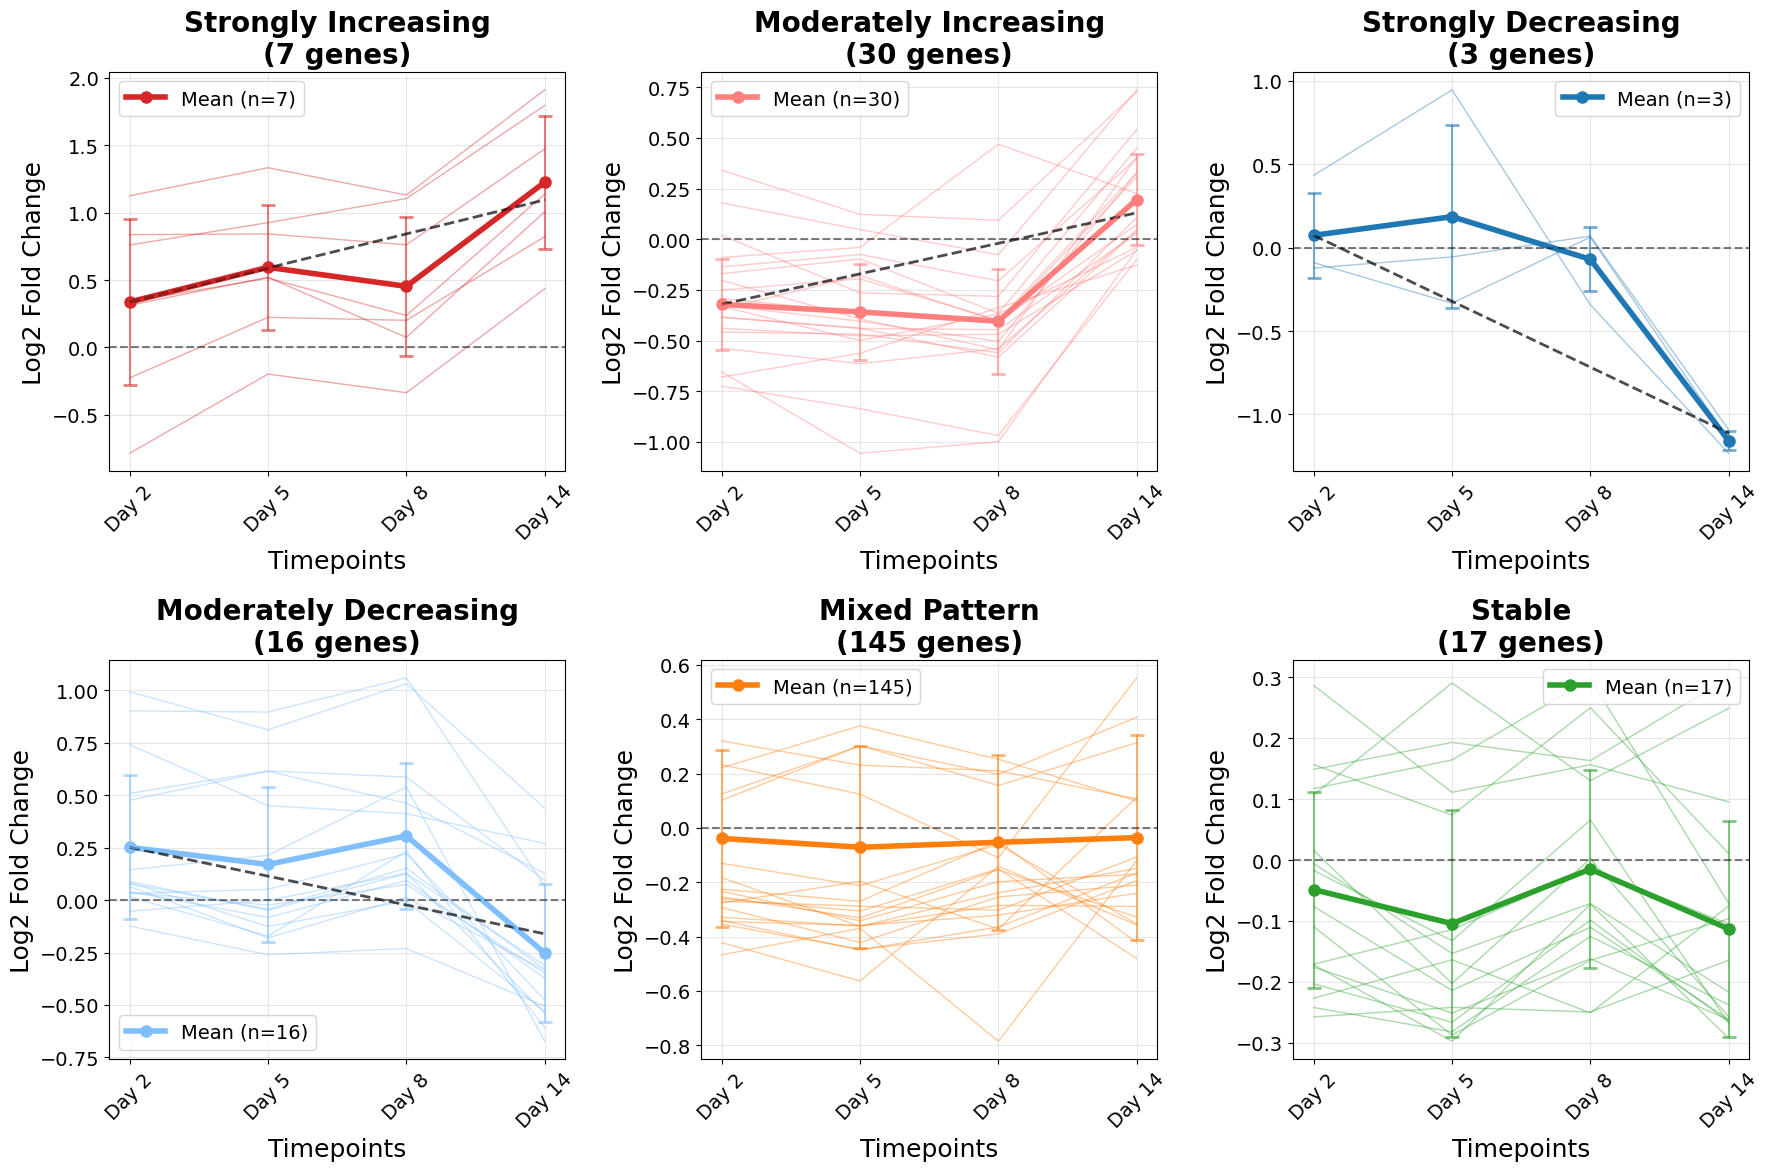

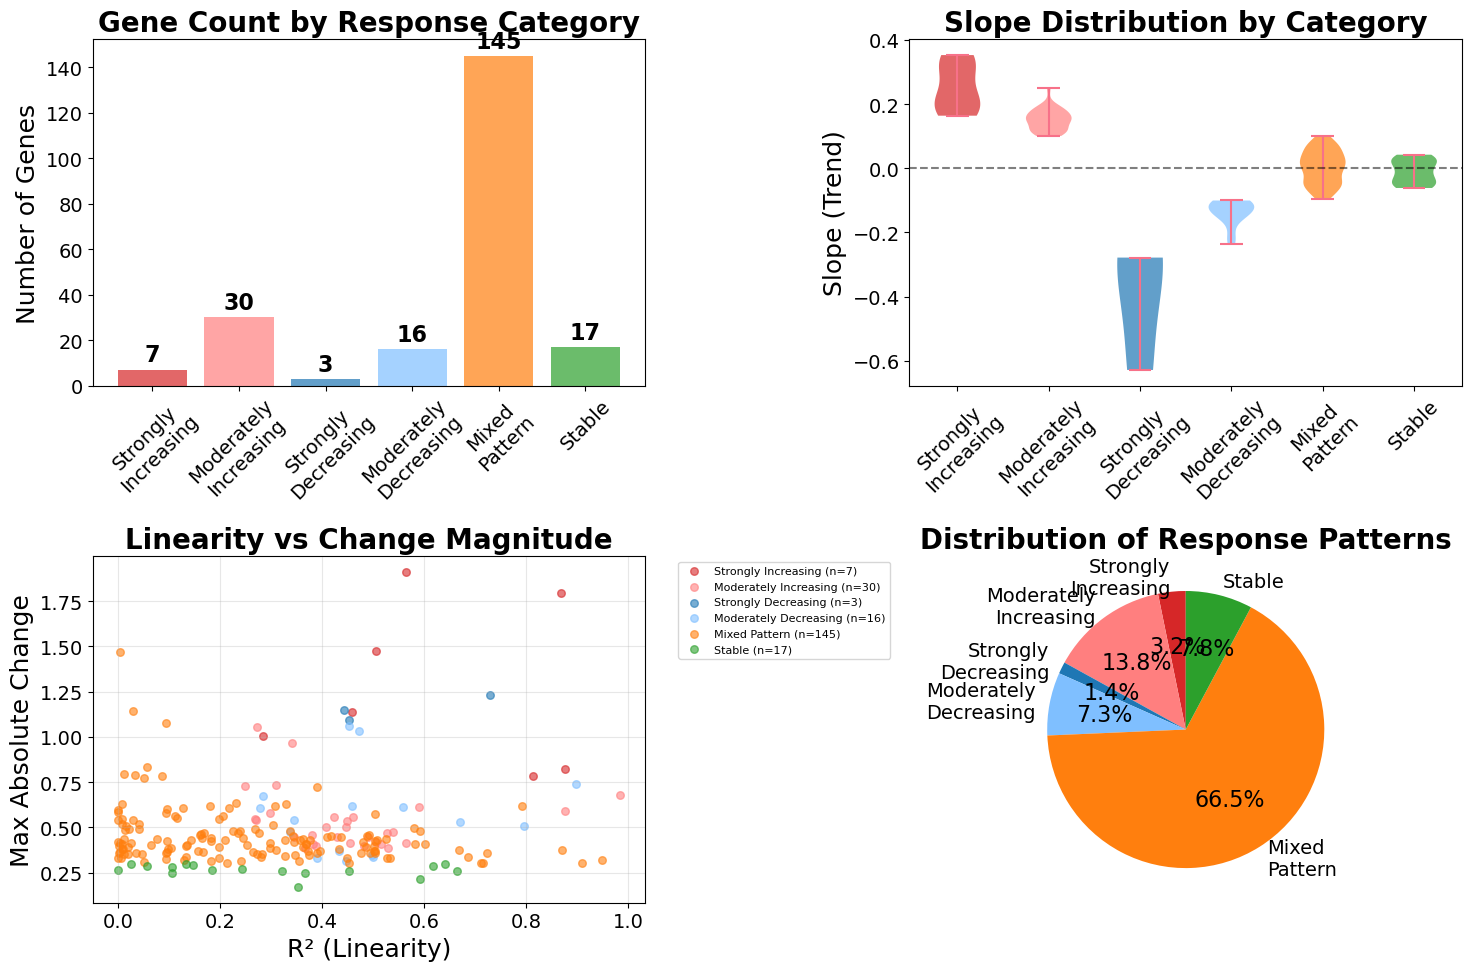


💾 Advanced results available:
   • advanced_results['categories']: 6 category gene lists
   • advanced_results['trajectory_figure']: Individual category plots
   • advanced_results['summary_figure']: Statistical summaries
   • advanced_results['detailed_stats']: Per-gene statistics
   • Strongly_Increasing genes saved to 'strongly_increasing_genes_detailed.csv'
   • Moderately_Increasing genes saved to 'moderately_increasing_genes_detailed.csv'
   • Strongly_Decreasing genes saved to 'strongly_decreasing_genes_detailed.csv'
   • Moderately_Decreasing genes saved to 'moderately_decreasing_genes_detailed.csv'
   • Mixed_Pattern genes saved to 'mixed_pattern_genes_detailed.csv'
   • Stable genes saved to 'stable_genes_detailed.csv'


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

def categorize_gene_responses_advanced(log2_df, min_change=0.3, trend_threshold=0.1):
    """
    Advanced gene categorization using multiple criteria:
    1. Overall trend analysis (slope)
    2. Maximum absolute change
    3. Consistent direction of change
    
    Parameters:
    -----------
    log2_df : pd.DataFrame
        Log2 fold change matrix (genes × timepoints)
    min_change : float
        Minimum absolute change required (default: 0.3 log2FC)
    trend_threshold : float
        Minimum slope for trend detection (default: 0.1)
    
    Returns:
    --------
    dict : Categorized genes with detailed statistics
    """
    print(f"📊 Advanced gene response categorization...")
    print(f"   Min change threshold: {min_change} log2FC")
    print(f"   Trend threshold: {trend_threshold} slope")
    
    categories = {
        'Strongly_Increasing': [],
        'Moderately_Increasing': [],
        'Strongly_Decreasing': [],
        'Moderately_Decreasing': [],
        'Mixed_Pattern': [],
        'Stable': []
    }
    
    detailed_stats = {}
    timepoints = np.arange(len(log2_df.columns))  # 0, 1, 2, 3 for Day 2, 5, 8, 14
    
    for gene in log2_df.index:
        trajectory = log2_df.loc[gene].values
        
        # Calculate trend (slope)
        slope, intercept, r_value, p_value, std_err = stats.linregress(timepoints, trajectory)
        
        # Calculate other metrics
        max_value = np.max(trajectory)
        min_value = np.min(trajectory)
        max_abs_change = np.max(np.abs(trajectory))
        mean_value = np.mean(trajectory)
        
        # Count positive and negative changes
        positive_changes = np.sum(trajectory > min_change)
        negative_changes = np.sum(trajectory < -min_change)
        
        # Decision logic
        gene_stats = {
            'trajectory': trajectory,
            'slope': slope,
            'r_squared': r_value**2,
            'max_value': max_value,
            'min_value': min_value,
            'max_abs_change': max_abs_change,
            'mean_value': mean_value,
            'positive_changes': positive_changes,
            'negative_changes': negative_changes
        }
        
        # Categorization logic
        if slope > trend_threshold and max_abs_change > min_change:
            if max_value > 1.0 or slope > 0.3:  # Strong increase
                categories['Strongly_Increasing'].append(gene)
                gene_stats['category'] = 'Strongly_Increasing'
            else:  # Moderate increase
                categories['Moderately_Increasing'].append(gene)
                gene_stats['category'] = 'Moderately_Increasing'
                
        elif slope < -trend_threshold and max_abs_change > min_change:
            if min_value < -1.0 or slope < -0.3:  # Strong decrease
                categories['Strongly_Decreasing'].append(gene)
                gene_stats['category'] = 'Strongly_Decreasing'
            else:  # Moderate decrease
                categories['Moderately_Decreasing'].append(gene)
                gene_stats['category'] = 'Moderately_Decreasing'
                
        elif max_abs_change > min_change:
            # Has significant changes but no clear trend
            categories['Mixed_Pattern'].append(gene)
            gene_stats['category'] = 'Mixed_Pattern'
            
        else:
            # Stable genes
            categories['Stable'].append(gene)
            gene_stats['category'] = 'Stable'
        
        detailed_stats[gene] = gene_stats
    
    return categories, detailed_stats

def print_advanced_categorization_results(categories, detailed_stats, log2_df):
    """
    Print detailed results of advanced gene categorization
    """
    print("\n" + "="*80)
    print("ADVANCED GENE RESPONSE PATTERN CATEGORIZATION")
    print("="*80)
    
    total_genes = len(log2_df)
    
    print(f"\n📊 SUMMARY STATISTICS:")
    print(f"   Total genes analyzed: {total_genes}")
    
    # Reorder categories for better presentation
    category_order = ['Strongly_Increasing', 'Moderately_Increasing', 
                     'Strongly_Decreasing', 'Moderately_Decreasing', 
                     'Mixed_Pattern', 'Stable']
    
    for category in category_order:
        count = len(categories[category])
        percentage = (count / total_genes) * 100
        print(f"   {category.replace('_', ' ')}: {count} genes ({percentage:.1f}%)")
    
    print(f"\n" + "="*50)
    
    # Detailed analysis for each category
    for category in category_order:
        genes = categories[category]
        if not genes:
            continue
            
        print(f"\n🔸 {category.replace('_', ' ').upper()} ({len(genes)} genes):")
        print("-" * 50)
        
        # Sort genes by appropriate metric
        if 'Increasing' in category:
            # Sort by slope (highest first)
            sorted_genes = sorted(genes, key=lambda g: detailed_stats[g]['slope'], reverse=True)
            metric_label = "Slope"
        elif 'Decreasing' in category:
            # Sort by slope (most negative first)
            sorted_genes = sorted(genes, key=lambda g: detailed_stats[g]['slope'])
            metric_label = "Slope"
        elif category == 'Mixed_Pattern':
            # Sort by R-squared (least linear first)
            sorted_genes = sorted(genes, key=lambda g: detailed_stats[g]['r_squared'])
            metric_label = "R²"
        else:  # Stable
            # Sort by maximum absolute change (smallest first)
            sorted_genes = sorted(genes, key=lambda g: detailed_stats[g]['max_abs_change'])
            metric_label = "Max|Change|"
        
        # Print header
        print(f"   {'Gene':<15} {'Day2':<7} {'Day5':<7} {'Day8':<7} {'Day14':<7} {metric_label:<10}")
        print(f"   {'-'*65}")
        
        # Print top 15 genes
        for gene in sorted_genes[:15]:
            trajectory = detailed_stats[gene]['trajectory']
            if metric_label == "Slope":
                metric_value = detailed_stats[gene]['slope']
            elif metric_label == "R²":
                metric_value = detailed_stats[gene]['r_squared']
            else:
                metric_value = detailed_stats[gene]['max_abs_change']
            
            trajectory_str = f"{trajectory[0]:6.2f} {trajectory[1]:6.2f} {trajectory[2]:6.2f} {trajectory[3]:6.2f}"
            print(f"   {gene:<15} {trajectory_str} {metric_value:8.3f}")
        
        if len(genes) > 15:
            print(f"   ... and {len(genes) - 15} more genes")
        
        # Category statistics
        all_slopes = [detailed_stats[gene]['slope'] for gene in genes]
        all_r_squared = [detailed_stats[gene]['r_squared'] for gene in genes]
        
        print(f"\n   Category statistics:")
        print(f"     Mean slope: {np.mean(all_slopes):6.3f} ± {np.std(all_slopes):6.3f}")
        print(f"     Mean R²: {np.mean(all_r_squared):6.3f} ± {np.std(all_r_squared):6.3f}")

def plot_advanced_gene_trajectories(categories, detailed_stats, log2_df, figsize=(18, 12)):
    """
    Plot gene expression trajectories for advanced categorization
    """
    print("🎨 Creating advanced gene trajectory plots...")
    
    timepoints = log2_df.columns
    timepoint_numeric = range(len(timepoints))
    
    # Create figure with more subplots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    axes = axes.flatten()
    
    # Colors for categories
    colors = {
        'Strongly_Increasing': '#d62728',      # Red
        'Moderately_Increasing': '#ff7f7f',   # Light red
        'Strongly_Decreasing': '#1f77b4',     # Blue
        'Moderately_Decreasing': '#7fbfff',   # Light blue
        'Mixed_Pattern': '#ff7f0e',           # Orange
        'Stable': '#2ca02c'                   # Green
    }
    
    category_titles = [
        'Strongly Increasing', 'Moderately Increasing',
        'Strongly Decreasing', 'Moderately Decreasing', 
        'Mixed Pattern', 'Stable'
    ]
    
    category_keys = ['Strongly_Increasing', 'Moderately_Increasing',
                    'Strongly_Decreasing', 'Moderately_Decreasing',
                    'Mixed_Pattern', 'Stable']
    
    for idx, (category_key, title) in enumerate(zip(category_keys, category_titles)):
        ax = axes[idx]
        genes = categories[category_key]
        
        if not genes:
            ax.text(0.5, 0.5, f'No {title} Genes', ha='center', va='center', 
                   transform=ax.transAxes, fontsize=12)
            ax.set_title(f'{title}\n(0 genes)', fontweight='bold')
            continue
        
        # Plot individual trajectories (limit to 20 for visibility)
        plot_genes = genes[:20] if len(genes) > 20 else genes
        
        for gene in plot_genes:
            trajectory = detailed_stats[gene]['trajectory']
            ax.plot(timepoint_numeric, trajectory, color=colors[category_key], 
                   alpha=0.4, linewidth=1)
        
        # Plot mean trajectory
        all_trajectories = [detailed_stats[gene]['trajectory'] for gene in genes]
        mean_trajectory = np.mean(all_trajectories, axis=0)
        std_trajectory = np.std(all_trajectories, axis=0)
        
        ax.plot(timepoint_numeric, mean_trajectory, color=colors[category_key], 
               linewidth=4, marker='o', markersize=8, 
               label=f'Mean (n={len(genes)})')
        
        # Add error bars
        ax.errorbar(timepoint_numeric, mean_trajectory, yerr=std_trajectory,
                   color=colors[category_key], alpha=0.6, capsize=5, capthick=2)
        
        # Formatting
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax.set_xlabel('Timepoints')
        ax.set_ylabel('Log2 Fold Change')
        ax.set_title(f'{title}\n({len(genes)} genes)', fontweight='bold')
        ax.set_xticks(timepoint_numeric)
        ax.set_xticklabels(timepoints, rotation=45)
        ax.grid(True, alpha=0.3)
        ax.legend()
        
        # Add trend line for increasing/decreasing categories
        if 'Increasing' in category_key or 'Decreasing' in category_key:
            # Calculate and plot trend line
            slope = np.mean([detailed_stats[gene]['slope'] for gene in genes])
            intercept = np.mean([detailed_stats[gene]['trajectory'][0] - slope * 0 for gene in genes])
            trend_line = [intercept + slope * t for t in timepoint_numeric]
            ax.plot(timepoint_numeric, trend_line, '--', color='black', alpha=0.7, 
                   linewidth=2, label=f'Trend (slope={slope:.3f})')
    
    plt.tight_layout()
    return fig

def create_summary_statistics_plot(categories, detailed_stats, figsize=(15, 10)):
    """
    Create summary statistics plots for advanced categorization
    """
    print("📈 Creating summary statistics plots...")
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    # Prepare data
    category_names = []
    category_counts = []
    category_colors = []
    
    colors = {
        'Strongly_Increasing': '#d62728',
        'Moderately_Increasing': '#ff7f7f',
        'Strongly_Decreasing': '#1f77b4',
        'Moderately_Decreasing': '#7fbfff',
        'Mixed_Pattern': '#ff7f0e',
        'Stable': '#2ca02c'
    }
    
    for category, genes in categories.items():
        if genes:
            category_names.append(category.replace('_', '\n'))
            category_counts.append(len(genes))
            category_colors.append(colors[category])
    
    # Plot 1: Category counts
    ax1 = axes[0, 0]
    bars = ax1.bar(category_names, category_counts, color=category_colors, alpha=0.7)
    
    for bar, count in zip(bars, category_counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(category_counts)*0.01,
                str(count), ha='center', va='bottom', fontweight='bold')
    
    ax1.set_ylabel('Number of Genes')
    ax1.set_title('Gene Count by Response Category', fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot 2: Slope distribution
    ax2 = axes[0, 1]
    all_slopes = []
    slope_labels = []
    slope_colors = []
    
    for category, genes in categories.items():
        if genes:
            slopes = [detailed_stats[gene]['slope'] for gene in genes]
            all_slopes.extend(slopes)
            slope_labels.extend([category.replace('_', ' ')] * len(slopes))
            slope_colors.extend([colors[category]] * len(slopes))
    
    # Create violin plot for slopes
    slope_data = []
    slope_categories = []
    for category, genes in categories.items():
        if genes:
            slopes = [detailed_stats[gene]['slope'] for gene in genes]
            slope_data.append(slopes)
            slope_categories.append(category.replace('_', '\n'))
    
    if slope_data:
        parts = ax2.violinplot(slope_data, positions=range(len(slope_categories)))
        
        for i, (part, color) in enumerate(zip(parts['bodies'], 
                                            [colors[cat.replace('\n', '_')] for cat in slope_categories])):
            part.set_facecolor(color)
            part.set_alpha(0.7)
    
    ax2.set_xticks(range(len(slope_categories)))
    ax2.set_xticklabels(slope_categories, rotation=45)
    ax2.set_ylabel('Slope (Trend)')
    ax2.set_title('Slope Distribution by Category', fontweight='bold')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 3: R-squared vs Max Change scatter
    ax3 = axes[1, 0]
    
    for category, genes in categories.items():
        if genes:
            r_squared_vals = [detailed_stats[gene]['r_squared'] for gene in genes]
            max_changes = [detailed_stats[gene]['max_abs_change'] for gene in genes]
            
            ax3.scatter(r_squared_vals, max_changes, 
                       color=colors[category], alpha=0.6, s=30,
                       label=f"{category.replace('_', ' ')} (n={len(genes)})")
    
    ax3.set_xlabel('R² (Linearity)')
    ax3.set_ylabel('Max Absolute Change')
    ax3.set_title('Linearity vs Change Magnitude', fontweight='bold')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Percentage pie chart
    ax4 = axes[1, 1]
    
    if category_counts:
        wedges, texts, autotexts = ax4.pie(category_counts, labels=category_names, 
                                          colors=category_colors, autopct='%1.1f%%',
                                          startangle=90)
        ax4.set_title('Distribution of Response Patterns', fontweight='bold')
    
    plt.tight_layout()
    return fig

def run_advanced_gene_categorization(log2_df, min_change=0.3, trend_threshold=0.1):
    """
    Main function to run advanced gene response categorization
    """
    print("🚀 Starting Advanced Gene Response Categorization")
    print("="*60)
    print(f"📋 Using advanced criteria:")
    print(f"   • Min change threshold: {min_change} log2FC")
    print(f"   • Trend threshold: {trend_threshold} slope")
    print(f"   • Slope analysis for trend detection")
    print(f"   • Multiple intensity levels (strong/moderate)")
    
    # Step 1: Advanced categorization
    categories, detailed_stats = categorize_gene_responses_advanced(log2_df, min_change, trend_threshold)
    
    # Step 2: Print results
    print_advanced_categorization_results(categories, detailed_stats, log2_df)
    
    # Step 3: Create trajectory plots
    trajectory_fig = plot_advanced_gene_trajectories(categories, detailed_stats, log2_df)
    
    # Step 4: Create summary plots
    summary_fig = create_summary_statistics_plot(categories, detailed_stats)
    
    # Step 5: Return results
    results = {
        'categories': categories,
        'detailed_stats': detailed_stats,
        'trajectory_figure': trajectory_fig,
        'summary_figure': summary_fig,
        'parameters': {
            'min_change': min_change,
            'trend_threshold': trend_threshold
        }
    }
    
    print(f"\n✅ Advanced gene categorization complete!")
    print(f"📊 Results summary:")
    for category, genes in categories.items():
        print(f"   {category.replace('_', ' ')}: {len(genes)} genes")
    
    return results

# ============================================================================
# EXECUTE THE ADVANCED CATEGORIZATION
# ============================================================================

print("\n" + "="*80)
print("ADVANCED GENE RESPONSE PATTERN CATEGORIZATION")
print("="*80)
print("📋 Using slope analysis and multiple criteria for better classification")

# Run the advanced categorization
advanced_results = run_advanced_gene_categorization(
    log2_df=log2_fc_df,  # Your log2 fold change dataframe
    min_change=0.3,      # Lower threshold for detecting changes
    trend_threshold=0.1  # Slope threshold for trend detection
)

# Display the plots
plt.show()  # Trajectory plots
plt.show()  # Summary plots

# Access results
categories = advanced_results['categories']
print(f"\n💾 Advanced results available:")
print(f"   • advanced_results['categories']: 6 category gene lists")
print(f"   • advanced_results['trajectory_figure']: Individual category plots")
print(f"   • advanced_results['summary_figure']: Statistical summaries")
print(f"   • advanced_results['detailed_stats']: Per-gene statistics")

# Save results
for category, genes in categories.items():
    if genes:
        gene_df = pd.DataFrame({
            'gene': genes,
            'slope': [advanced_results['detailed_stats'][g]['slope'] for g in genes],
            'r_squared': [advanced_results['detailed_stats'][g]['r_squared'] for g in genes],
            'max_abs_change': [advanced_results['detailed_stats'][g]['max_abs_change'] for g in genes]
        })
        filename = f'{category.lower()}_genes_detailed.csv'
        gene_df.to_csv(filename, index=False)
        print(f"   • {category} genes saved to '{filename}'")